# CNN Experiments on CINIC-10 Dataset

## 1) CINIC10 - Dataset overview

In [2]:
import kagglehub #allows users to access various Kaggle resources
import tensorflow as tf
import numpy as np
import os
import shutil
import random
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(20) # SEED

### 1.1) Implementing function to create new directories

In [3]:
def create_clean_dir(directory):
    """Creates a directory after removing any existing one."""
    shutil.rmtree(directory, ignore_errors=True)
    os.makedirs(directory, exist_ok=True)

# Download the dataset
dataset_name = "mengcius/cinic10"
path = kagglehub.dataset_download(dataset_name)

# Define paths for training, validation, and testing
train_dir = os.path.join(path, "train")
valid_dir = os.path.join(path, "valid")
test_dir = os.path.join(path, "test")

# Define small dataset directories
maly_zbior = os.path.join("/kaggle/working", "maly_zbior")
maly_zbior_test = os.path.join("/kaggle/working", "maly_zbior_test")

# Create or reset directories
create_clean_dir(maly_zbior)
create_clean_dir(maly_zbior_test)

# Print dataset paths
print(f"Downloaded dataset from Kaggle: {dataset_name}")
print(f"Path to dataset: {path}")
print(f"Path to small dataset (maly_zbior): {maly_zbior}")
print(f"Path to small test dataset (maly_zbior_test): {maly_zbior_test}")


Downloaded dataset from Kaggle: mengcius/cinic10
Path to dataset: /kaggle/input/cinic10
Path to small dataset (maly_zbior): /kaggle/working/maly_zbior
Path to small test dataset (maly_zbior_test): /kaggle/working/maly_zbior_test


### 1.2) Wypisanie podfolderów w CINIC10 i ilość obrazów (klasy: test, train, valid)

In [ ]:
def print_folder_structure_and_image_count(path, indent_level=0):
    indent = " " * 2 * indent_level
    folder_name = os.path.basename(path) or os.path.basename(os.path.dirname(path))
    files = os.listdir(path)
    image_count = sum(
        1 for f in files
        if os.path.isfile(os.path.join(path, f))
        and f.lower().endswith(('.png', '.jpg', '.jpeg'))
    )
    print(f"{indent}{folder_name}/ - {image_count} images")

    # Przechodzimy rekurencyjnie przez podfoldery
    for item in sorted(files):
        item_path = os.path.join(path, item)
        if os.path.isdir(item_path):
            print_folder_structure_and_image_count(item_path, indent_level + 1)

### 1.3) Implementing function to create subsets

In [ ]:
# Function to randomly sample images and copy them
def create_subset(source_dir, dest_dir, sample_size=100):
    """Randomly selects `sample_size` images from `source_dir` and copies them to `dest_dir`."""
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)

    classes = os.listdir(source_dir)  # Get all class folders
    for class_name in classes:
        class_path = os.path.join(source_dir, class_name)
        if os.path.isdir(class_path):  # Ensure it's a directory
            images = os.listdir(class_path)
            selected_images = random.sample(images, min(sample_size, len(images)))  # Pick random images

            class_dest = os.path.join(dest_dir, class_name)
            os.makedirs(class_dest, exist_ok=True)  # Create class folder

            for image in selected_images:
                shutil.copy(os.path.join(class_path, image), os.path.join(class_dest, image))  # Copy image

### 1.4) Creating small dataset (2000 images, 200 in each class)

In [ ]:
for class_name in os.listdir(train_dir):
    class_source = os.path.join(train_dir, class_name)

    if not os.path.isdir(class_source): continue

    class_target = os.path.join(maly_zbior, class_name)
    os.makedirs(class_target, exist_ok=True)
    images = sorted([f for f in os.listdir(class_source)
                     if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

    selected = images[::45] # just 200 images
    # copying to new folder
    for file in selected:
        shutil.copy(os.path.join(class_source, file), os.path.join(class_target, file))

    print(f"{len(selected)} obrazów skopiowanych do {class_target}")

print("\n___________________________ Mały zbiór jak wygląda:")
print("\nNowe podzbiory i ilość obrazów:")
print_folder_structure_and_image_count(maly_zbior)

200 obrazów skopiowanych do /kaggle/working/maly_zbior/airplane
200 obrazów skopiowanych do /kaggle/working/maly_zbior/horse
200 obrazów skopiowanych do /kaggle/working/maly_zbior/truck
200 obrazów skopiowanych do /kaggle/working/maly_zbior/automobile
200 obrazów skopiowanych do /kaggle/working/maly_zbior/ship
200 obrazów skopiowanych do /kaggle/working/maly_zbior/dog
200 obrazów skopiowanych do /kaggle/working/maly_zbior/bird
200 obrazów skopiowanych do /kaggle/working/maly_zbior/frog
200 obrazów skopiowanych do /kaggle/working/maly_zbior/cat
200 obrazów skopiowanych do /kaggle/working/maly_zbior/deer

___________________________ Mały zbiór jak wygląda:

Nowe podzbiory i ilość obrazów:
maly_zbior/ - 0 images
  airplane/ - 200 images
  automobile/ - 200 images
  bird/ - 200 images
  cat/ - 200 images
  deer/ - 200 images
  dog/ - 200 images
  frog/ - 200 images
  horse/ - 200 images
  ship/ - 200 images
  truck/ - 200 images


### 1.4) Creating small test dataset (200 images, 20 in each class)

In [ ]:
for class_name in os.listdir(test_dir):
    class_source = os.path.join(test_dir, class_name)

    if not os.path.isdir(class_source): continue

    class_target = os.path.join(maly_zbior_test, class_name)
    os.makedirs(class_target, exist_ok=True)
    images = sorted([f for f in os.listdir(class_source)
                     if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

    selected = images[::450] # just 20 images
    for file in selected:
        shutil.copy(os.path.join(class_source, file), os.path.join(class_target, file))

    print(f"{len(selected)} obrazów skopiowanych do {class_target}")

print("\n___________________________ Mały zbiór jak wygląda:")
print("\nNowe podzbiory i ilość obrazów:")
print_folder_structure_and_image_count(maly_zbior_test)

20 obrazów skopiowanych do /kaggle/working/maly_zbior_test/airplane
20 obrazów skopiowanych do /kaggle/working/maly_zbior_test/horse
20 obrazów skopiowanych do /kaggle/working/maly_zbior_test/truck
20 obrazów skopiowanych do /kaggle/working/maly_zbior_test/automobile
20 obrazów skopiowanych do /kaggle/working/maly_zbior_test/ship
20 obrazów skopiowanych do /kaggle/working/maly_zbior_test/dog
20 obrazów skopiowanych do /kaggle/working/maly_zbior_test/bird
20 obrazów skopiowanych do /kaggle/working/maly_zbior_test/frog
20 obrazów skopiowanych do /kaggle/working/maly_zbior_test/cat
20 obrazów skopiowanych do /kaggle/working/maly_zbior_test/deer

___________________________ Mały zbiór jak wygląda:

Nowe podzbiory i ilość obrazów:
maly_zbior_test/ - 0 images
  airplane/ - 20 images
  automobile/ - 20 images
  bird/ - 20 images
  cat/ - 20 images
  deer/ - 20 images
  dog/ - 20 images
  frog/ - 20 images
  horse/ - 20 images
  ship/ - 20 images
  truck/ - 20 images


In [ ]:
class_mapping = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

### 1.5) Image preprocessing

In [ ]:
# image scale
IMG_SIZE = (32, 32)

datagen = ImageDataGenerator(rescale=1.0/255,
    validation_split=0.2  # 80% for train, 20% for validation
)

### 1.6) Creating train generator and valid generator

In [ ]:
train_generator = datagen.flow_from_directory( # Train generator - choses 16000 images
    maly_zbior,
    target_size=IMG_SIZE,
    batch_size=8,
    class_mode="sparse",
    subset="training",
    shuffle=True
)

# Validation generator - choses 400 images
valid_generator = datagen.flow_from_directory(
    maly_zbior,
    target_size=IMG_SIZE,
    batch_size=8,
    class_mode="sparse",
    subset="validation",
    shuffle=True
)

print(f"Train set: {train_generator.samples} images")
print(f"Validation set: {valid_generator.samples} images")

Found 1600 images belonging to 10 classes.
Found 400 images belonging to 10 classes.
Train set: 1600 images
Validation set: 400 images


### 1.7) Visual part for showing images

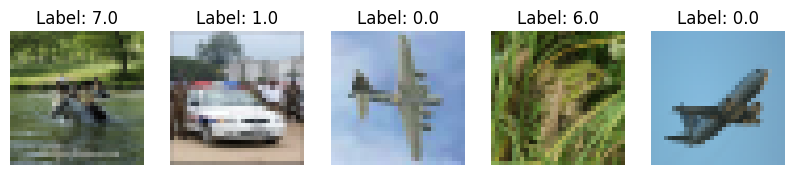

Vector - first pixels in vertival 
 [[0.34509805 0.4039216  0.19607845]
 [0.3529412  0.40784317 0.21176472]
 [0.37647063 0.43137258 0.23529413]
 [0.30588236 0.37254903 0.18823531]
 [0.2901961  0.34901962 0.1764706 ]
 [0.28235295 0.32941177 0.16862746]
 [0.27058825 0.3372549  0.16862746]
 [0.32941177 0.4039216  0.19215688]
 [0.3372549  0.40784317 0.21176472]
 [0.2901961  0.36078432 0.1764706 ]
 [0.24705884 0.30980393 0.16470589]
 [0.27058825 0.33333334 0.1764706 ]
 [0.28627452 0.3372549  0.16862746]
 [0.24705884 0.3019608  0.1254902 ]
 [0.2509804  0.31764707 0.14509805]
 [0.25490198 0.3254902  0.13725491]
 [0.3372549  0.4156863  0.18823531]
 [0.36078432 0.44705886 0.15294118]
 [0.26666668 0.34509805 0.1254902 ]
 [0.25490198 0.3254902  0.1254902 ]
 [0.23137257 0.29803923 0.10196079]
 [0.24313727 0.28627452 0.12156864]
 [0.24705884 0.30588236 0.10980393]
 [0.227451   0.28627452 0.10196079]
 [0.22352943 0.27450982 0.1137255 ]
 [0.13333334 0.15294118 0.08627451]
 [0.32941177 0.38431376 0.20

In [ ]:
import matplotlib.pyplot as plt

images, labels = next(train_generator)

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i])
    plt.axis("off")
    plt.title(f"Label: {labels[i]}")

plt.show()
print("Vector - first pixels in vertival \n", images[0,0])
print("\Image size:", images[0].shape)
print("\nVector size:", len(images[0]))

### 1.8) Unique classes

Found 90000 images belonging to 10 classes.


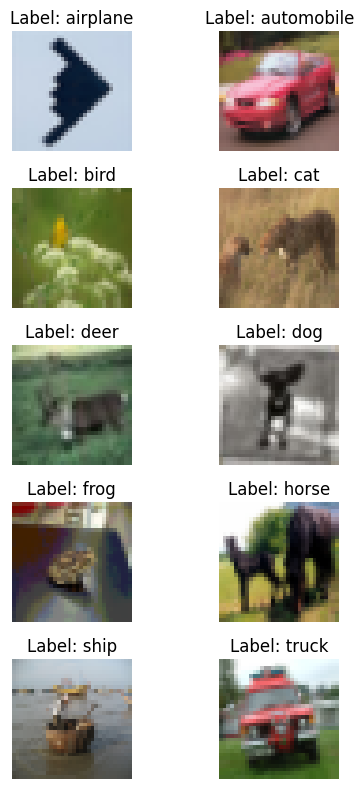

In [ ]:
import matplotlib.pyplot as plt
visual = datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=64,
    class_mode="sparse",
    shuffle=True
)
images, labels = next(visual)
unique_classes = np.unique(labels)

plt.figure(figsize=(5, 8))
for i, class_label in enumerate(unique_classes[:10]):
    class_indices = np.where(labels == class_label)[0]
    image_idx = class_indices[0]  # Taking first image from each class

    plt.subplot(5, 2, i + 1)
    plt.imshow(images[image_idx])
    plt.axis("off")
    plt.title(f"Label: {class_mapping[int(class_label)]}")

plt.tight_layout()
plt.show()


## 2). Architectures of basic CNNs

### 2.1) Basic CNNs

#### 2.2) Description
## 1) Input Shape
- The input images are **32×32 pixels** with **3 color channels** (RGB).

## 2) First Convolutional Layer
- **32 filters** are applied, meaning the model learns 32 different sets of weights to extract basic features like edges and textures.
- **Kernel size: (3, 3)**  
  A 3×3 kernel is standard in CNNs as it captures local patterns while remaining computationally efficient.
- **Padding: "same"**  
  This ensures that the output has the same spatial dimensions as the input (**32×32**).

## 3) First Pooling Layer (Dimensionality Reduction)
- **Max Pooling (2×2)** is used to reduce the spatial dimensions by half.
- This reduces the feature map size from **32×32** to **16×16** (with 32 filters).
- It helps lower computational cost and adds robustness to small shifts in the image.

## 4) Second Convolutional Layer
- The number of filters is increased to **64** to capture more complex and abstract features.
- **Kernel size: (3, 3)** and **padding: "same"**
- Similar to the first convolutional layer, this setup enables the network to detect higher-level patterns while keeping the spatial size constant (**16×16**).

## 5) Second Pooling Layer
- Another **Max Pooling (2×2)** is applied after the second convolution.
- This reduces the feature map size from **16×16** to **8×8** (with 64 filters).

## 6) Flatten Layer
- The 3D output of the last pooling layer (**8×8×64**) is flattened into a **1D vector of size 4096**.
- This vector can now be passed to the fully connected (Dense) layer.

## 7) Dense Layer (Fully Connected)
- A Dense layer with **128 neurons** processes the extracted features and learns to combine them to make classification decisions.

## 8) Output Layer
- Final layer contains **10 neurons** (for 10 classes) and uses the **softmax activation function**.
- Softmax outputs a probability distribution over the classes (summing to 1), indicating the model’s prediction.

---

### Activation Function
- Throughout the network, we use the **ReLU activation function** to introduce non-linearity, enabling the model to learn complex relationships in the data.


In [ ]:
def create_basic_cnn(input_shape=(32, 32, 3), num_classes=10):

    najprostszy_cnn = keras.Sequential([ # jedna konwolucja

        layers.Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),

          layers.Flatten(),
          layers.Dense(128, activation="relu"),
          layers.Dense(num_classes, activation="softmax")
    ])

    troche_lepszy_cnn = keras.Sequential([ # dwie konwolucje

        layers.Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D((2, 2)),

          layers.Flatten(),
          layers.Dense(128, activation="relu"),
          layers.Dense(num_classes, activation="softmax")
    ])

    return najprostszy_cnn, troche_lepszy_cnn

model, troche_lepszy_cnn = create_basic_cnn()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) # the best optimizer
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,050,890 (4.01 MB)

 Trainable params: 1,050,890 (4.01 MB)

 Non-trainable params: 0 (0.00 B)

### 2.3) Deep CNN

#### 2.4) Description

## 1. Input Layer
- **Input shape:** (32, 32, 3)  
  The images from the CINIC-10 dataset have a resolution of **32×32 pixels** and **3 color channels (RGB)**.

---

## 2. Convolutional Layers

### 2.1) First Convolution Block:
- `Conv2D`: 32 filters, kernel size **(3, 3)**, activation: **ReLU**, padding: `"same"`.
- `BatchNormalization`: Applied after the convolution to stabilize training.
- `MaxPooling2D`: Pool size **(2, 2)** — reduces spatial dimensions.
- `Dropout`: Rate **0.25** — helps prevent overfitting.

### 2.2) Second Convolution Block:
- `Conv2D`: 64 filters, kernel size **(3, 3)**, activation: **ReLU**, padding: `"same"`.
- `BatchNormalization`
- `MaxPooling2D`: Pool size **(2, 2)**
- `Dropout`: Rate **0.25**

### 2.3) Third Convolution Block:
- `Conv2D`: 128 filters, kernel size **(3, 3)**, activation: **ReLU**, padding: `"same"`.
- `BatchNormalization`
- `MaxPooling2D`: Pool size **(2, 2)**
- `Dropout`: Rate **0.25**

---

## 3. Fully Connected Layers

- `Flatten`: Converts the 3D tensor into a 1D vector.
- `Dense`: **512 neurons**, activation: **ReLU**
- `BatchNormalization`
- `Dropout`: Rate **0.5**

- `Dense`: **256 neurons**, activation: **ReLU**
- `BatchNormalization`
- `Dropout`: Rate **0.5**

---

## 4. Output Layer

- `Dense`: **10 neurons** (corresponding to the 10 classes in CINIC-10), activation: **softmax**  
  → Converts outputs into class probabilities.



In [ ]:
armata = keras.Sequential([

      layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
      layers.BatchNormalization(),
      layers.MaxPooling2D((2, 2)),
      layers.Dropout(0.25),

      layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
      layers.BatchNormalization(),
      layers.MaxPooling2D((2, 2)),
      layers.Dropout(0.25),

      layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
      layers.BatchNormalization(),
      layers.MaxPooling2D((2, 2)),
      layers.Dropout(0.25),

      layers.Flatten(),
      layers.Dense(512, activation='relu'),
      layers.BatchNormalization(),
      layers.Dropout(0.5),

      layers.Dense(256, activation='relu'),
      layers.BatchNormalization(),
      layers.Dropout(0.5),

      layers.Dense(10, activation='softmax')
  ])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
armata.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
armata.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 256)                 │              

 Total params: 1,280,202 (4.88 MB)

 Trainable params: 1,278,218 (4.88 MB)

 Non-trainable params: 1,984 (7.75 KB)

## 3) Performance of basic CNNs' architectures

In [ ]:
EPOCHS = 15

history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=EPOCHS
)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.1613 - loss: 2.3196 - val_accuracy: 0.2975 - val_loss: 1.9455
Epoch 2/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.3559 - loss: 1.8260 - val_accuracy: 0.3300 - val_loss: 1.8042
Epoch 3/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.4924 - loss: 1.5179 - val_accuracy: 0.3325 - val_loss: 1.7678
Epoch 4/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.5661 - loss: 1.3165 - val_accuracy: 0.3425 - val_loss: 1.7224
Epoch 5/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.6851 - loss: 1.0439 - val_accuracy: 0.3450 - val_loss: 1.7981
Epoch 6/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.7382 - loss: 0.8246 - val_accuracy: 0.3225 - val_loss: 1.8568
Epoch 7/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.8112 - loss: 0.6439 - val_accuracy: 0.3175 - val_loss: 2.0485
Epoch 8/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.8603 - loss: 0.5094 - val_accuracy: 0.345

### 3.1) basic CNNs' learning process

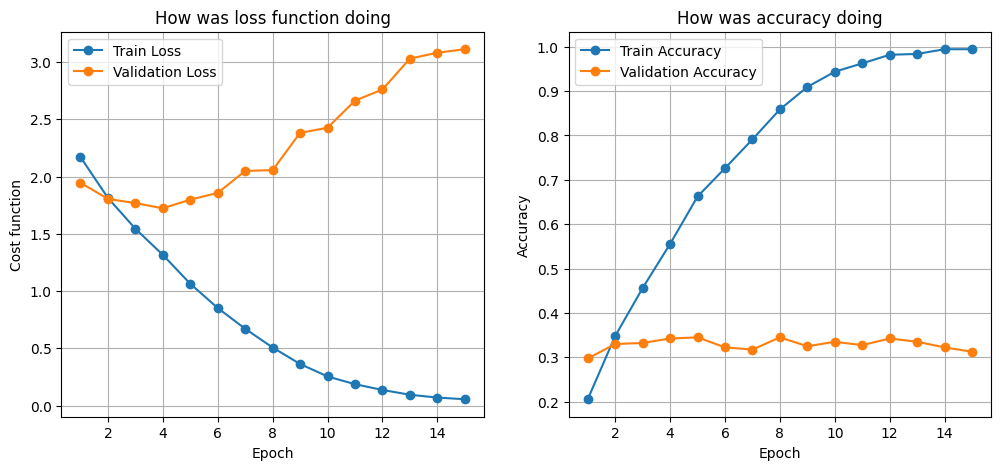

In [ ]:
# Pobranie historii uczenia
loss = history.history["loss"]
val_loss = history.history["val_loss"]
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
epochs_range = range(1, len(loss) + 1)

# Wykres funkcji kosztu
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, label="Train Loss", marker="o")
plt.plot(epochs_range, val_loss, label="Validation Loss", marker="o")
plt.xlabel("Epoch")
plt.ylabel("Cost function")
plt.title("How was loss function doing")
plt.legend()
plt.grid(True)

# Wykres dokładności
plt.subplot(1, 2, 2)
plt.plot(epochs_range, accuracy, label="Train Accuracy", marker="o")
plt.plot(epochs_range, val_accuracy, label="Validation Accuracy", marker="o")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("How was accuracy doing")
plt.legend()
plt.grid(True)
plt.show()

### 3.2) Learning process overview
### 1. Loss Function:
- The training loss curve (blue) steadily decreases – this indicates that the model is learning well from the training data.

- The validation loss curve (orange) initially decreases but later starts to increase – this is a clear sign of overfitting.

- The model is performing well on the training set, but its performance on the validation set stops improving and even begins to worsen.

### 2. Accuracy:
- Training accuracy increases rapidly and nearly reaches 100%.

- Validation accuracy remains low and doesn’t improve significantly – suggesting that the model does not generalize well to unseen data.

###  What does this mean?
- Overfitting – The model memorized the training data instead of learning general patterns.

- Too small training dataset – The dataset might be too limited (e.g., 1000 images is often insufficient for CNNs).

- Model too complex – A model with too many parameters can easily overfit on a small dataset.

- Lack of regularization – The model may benefit from techniques such as Dropout or L2 regularization.

### What can be improved?
- Increase dataset size – More images help the model generalize better.

- Apply Data Augmentation – Artificially increase dataset size by rotating, zooming, changing colors, etc.

- Add Dropout – Regularization with Dropout layers helps prevent overfitting.

- Use Early Stopping – Stop training when validation loss stops decreasing.

- Reduce model size – If the model is too complex, reduce the number of layers or neurons.

### 3.3) Performance on the test Dataset

In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow_from_directory(
    maly_zbior_test,
    target_size=IMG_SIZE,
    batch_size=10,
    class_mode="sparse",
    shuffle=False  # Ustawiamy shuffle=False, aby kolejność etykiet była poprawna
)
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Found 200 images belonging to 10 classes.
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4012 - loss: 2.9180
Test Loss: 3.0364
Test Accuracy: 0.3650


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


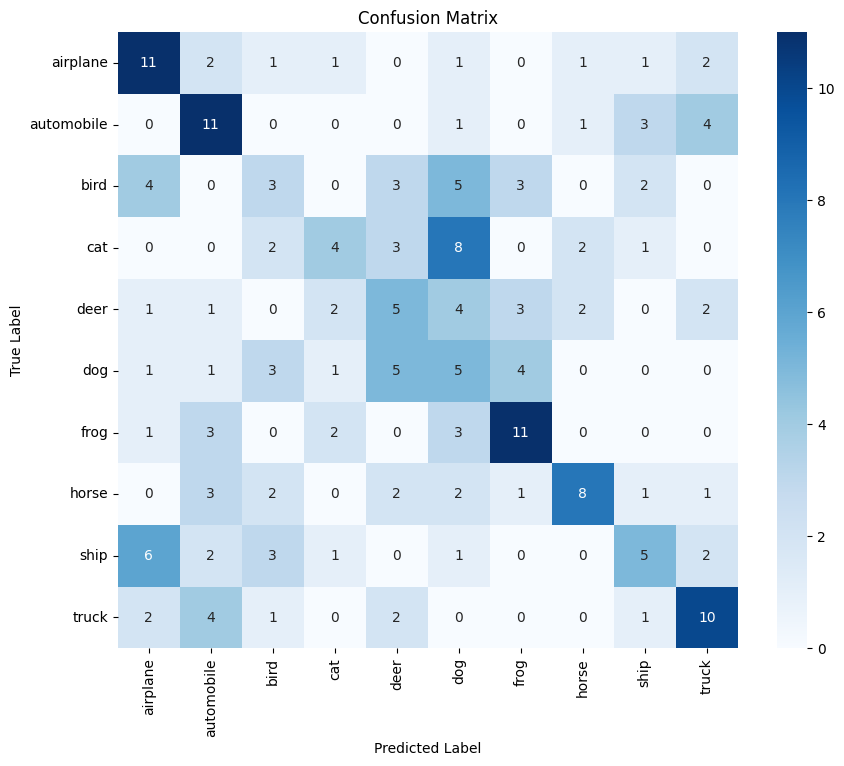

Classification Report:
              precision    recall  f1-score   support

    airplane       0.42      0.55      0.48        20
  automobile       0.41      0.55      0.47        20
        bird       0.20      0.15      0.17        20
         cat       0.36      0.20      0.26        20
        deer       0.25      0.25      0.25        20
         dog       0.17      0.25      0.20        20
        frog       0.50      0.55      0.52        20
       horse       0.57      0.40      0.47        20
        ship       0.36      0.25      0.29        20
       truck       0.48      0.50      0.49        20

    accuracy                           0.36       200
   macro avg       0.37      0.37      0.36       200
weighted avg       0.37      0.36      0.36       200



In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Generowanie predykcji
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Macierz pomyłek (Confusion Matrix)
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Klasyfikacyjny raport
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

- Najlepiej rozpoznał samolot, kota i ciężarówkę
- Wyniki są do dupy

Próba z trochę większym zbiorem:

### 3.4) Bigger dataset creation as to improve learning process

In [ ]:
shutil.rmtree(os.path.join(os.path.dirname(path), "troche_wiekszy_zbior"), ignore_errors=True)
troche_wiekszy_zbior = os.path.join(os.path.dirname(path), "troche_wiekszy_zbior")
os.makedirs(troche_wiekszy_zbior, exist_ok=True)
shutil.rmtree(os.path.join(os.path.dirname(path), "troche_wiekszy_zbior_test"), ignore_errors=True)
troche_wiekszy_zbior_test = os.path.join(os.path.dirname(path), "troche_wiekszy_zbior_test")
os.makedirs(troche_wiekszy_zbior_test, exist_ok=True)
print("Path to troche_wiekszy_zbior files:", troche_wiekszy_zbior)
print("Path to troche_wiekszy_zbior_test files:", troche_wiekszy_zbior_test)

Path to troche_wiekszy_zbior files: /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/troche_wiekszy_zbior
Path to troche_wiekszy_zbior_test files: /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/troche_wiekszy_zbior_test


In [ ]:
for class_name in os.listdir(train_dir):
    class_source = os.path.join(train_dir, class_name)

    if not os.path.isdir(class_source): continue

    class_target = os.path.join(troche_wiekszy_zbior, class_name)
    os.makedirs(class_target, exist_ok=True)
    images = sorted([f for f in os.listdir(class_source)
                     if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

    selected = images[::10] # tylko co 10 - bedzie 9000 obrazow
    # Kopiujemy wybrane obrazki do nowego folderu
    for file in selected:
        shutil.copy(os.path.join(class_source, file), os.path.join(class_target, file))

    print(f"{len(selected)} obrazów skopiowanych do {class_target}")


for class_name in os.listdir(test_dir):
    class_source = os.path.join(test_dir, class_name)

    if not os.path.isdir(class_source): continue

    class_target = os.path.join(troche_wiekszy_zbior_test, class_name)
    os.makedirs(class_target, exist_ok=True)
    images = sorted([f for f in os.listdir(class_source)
                     if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

    selected = images[::100] # tylko co 100 - bedzie 900 obrazow
    # Kopiujemy wybrane obrazki do nowego folderu
    for file in selected:
        shutil.copy(os.path.join(class_source, file), os.path.join(class_target, file))

    print(f"{len(selected)} obrazów skopiowanych do {class_target}")


900 obrazów skopiowanych do /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/troche_wiekszy_zbior/frog
900 obrazów skopiowanych do /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/troche_wiekszy_zbior/automobile
900 obrazów skopiowanych do /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/troche_wiekszy_zbior/truck
900 obrazów skopiowanych do /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/troche_wiekszy_zbior/dog
900 obrazów skopiowanych do /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/troche_wiekszy_zbior/bird
900 obrazów skopiowanych do /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/troche_wiekszy_zbior/ship
900 obrazów skopiowanych do /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/troche_wiekszy_zbior/airplane
900 obrazów skopiowanych do /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/troche_wiekszy_zbior/deer
900 obrazów skopiowanych do /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/troche_w

In [ ]:
train_generator2 = datagen.flow_from_directory(
    troche_wiekszy_zbior,
    target_size=IMG_SIZE,
    batch_size=32, # wieksze batche
    class_mode="sparse",
    subset="training",
    shuffle=True
)

valid_generator2 = datagen.flow_from_directory(
    troche_wiekszy_zbior,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode="sparse",
    subset="validation",
    shuffle=True
)

print(f"Train set: {train_generator2.samples} images")
print(f"Validation set: {valid_generator2.samples} images")

Found 7200 images belonging to 10 classes.
Found 1800 images belonging to 10 classes.
Train set: 7200 images
Validation set: 1800 images


In [ ]:
EPOCHS = 20

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(0.001, decay_steps=10000, decay_rate=0.9) # troche opoznienia w uczeniu
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
troche_lepszy_cnn.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = troche_lepszy_cnn.fit(
    train_generator2,
    validation_data=valid_generator2,
    epochs=EPOCHS
)

Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.2118 - loss: 2.1192 - val_accuracy: 0.3261 - val_loss: 1.7990
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.3674 - loss: 1.7057 - val_accuracy: 0.4183 - val_loss: 1.6102
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.4181 - loss: 1.6093 - val_accuracy: 0.4361 - val_loss: 1.5141
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.4834 - loss: 1.4517 - val_accuracy: 0.4567 - val_loss: 1.5067
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.5124 - loss: 1.3565 - val_accuracy: 0.4611 - val_loss: 1.4957
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.5559 - loss: 1.2349 - val_accuracy: 0.4706 - val_loss: 1.4769
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.6010 - loss: 1.1290 - val_accuracy: 0.5028 - val_loss: 1.3841
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.6494 - loss: 1.0135 - 

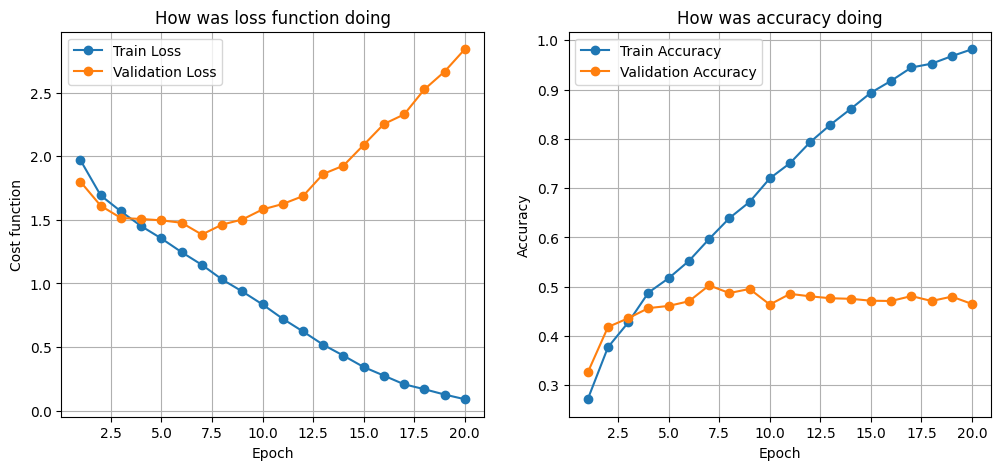

In [ ]:
# Pobranie historii uczenia
loss = history.history["loss"]
val_loss = history.history["val_loss"]
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
epochs_range = range(1, len(loss) + 1)

# Wykres funkcji kosztu
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, label="Train Loss", marker="o")
plt.plot(epochs_range, val_loss, label="Validation Loss", marker="o")
plt.xlabel("Epoch")
plt.ylabel("Cost function")
plt.title("How was loss function doing")
plt.legend()
plt.grid(True)

# Wykres dokładności
plt.subplot(1, 2, 2)
plt.plot(epochs_range, accuracy, label="Train Accuracy", marker="o")
plt.plot(epochs_range, val_accuracy, label="Validation Accuracy", marker="o")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("How was accuracy doing")
plt.legend()
plt.grid(True)
plt.show()

### 3.5) Performance of the test sample of the bigger dataset

In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator2 = test_datagen.flow_from_directory(
    troche_wiekszy_zbior_test,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode="sparse",
    shuffle=False  # Ustawiamy shuffle=False, aby kolejność etykiet była poprawna
)
test_loss, test_accuracy = troche_lepszy_cnn.evaluate(test_generator2)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Found 900 images belonging to 10 classes.
 4/29 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4993 - loss: 2.3726

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4585 - loss: 3.0856
Test Loss: 3.2328
Test Accuracy: 0.4344


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


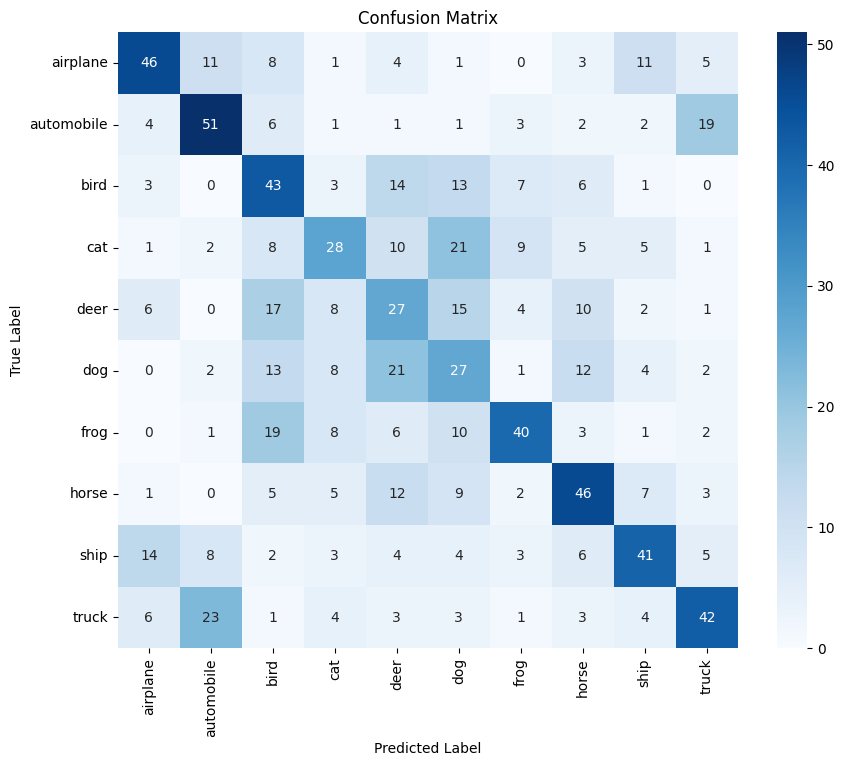

Classification Report:
              precision    recall  f1-score   support

    airplane       0.57      0.51      0.54        90
  automobile       0.52      0.57      0.54        90
        bird       0.35      0.48      0.41        90
         cat       0.41      0.31      0.35        90
        deer       0.26      0.30      0.28        90
         dog       0.26      0.30      0.28        90
        frog       0.57      0.44      0.50        90
       horse       0.48      0.51      0.49        90
        ship       0.53      0.46      0.49        90
       truck       0.53      0.47      0.49        90

    accuracy                           0.43       900
   macro avg       0.45      0.43      0.44       900
weighted avg       0.45      0.43      0.44       900



In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Generowanie predykcji
predictions = troche_lepszy_cnn.predict(test_generator2)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator2.classes
class_labels = list(test_generator2.class_indices.keys())

# Macierz pomyłek (Confusion Matrix)
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Klasyfikacyjny raport
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

### 3.6) Performance on the full dataset

In [ ]:
datagen = ImageDataGenerator(rescale=1.0/255.0)
train_generator_50_50 = datagen.flow_from_directory( # wybiera 7200 obrazów
    train_dir,
    target_size=(32,32),
    batch_size=32, # wieksze batche
    class_mode="sparse",
    shuffle=True
)

# Validation generator - wybiera 1800 obrazów
valid_generator_50_50 = datagen.flow_from_directory(
    valid_dir,
    target_size=(32,32),
    batch_size=32,
    class_mode="sparse",
    shuffle=True
)

print(f"Train set: {train_generator_50_50.samples} images")
print(f"Validation set: {valid_generator_50_50.samples} images")

Found 90000 images belonging to 10 classes.
Found 90000 images belonging to 10 classes.
Train set: 90000 images
Validation set: 90000 images


In [ ]:
EPOCHS = 20 # malo narazie

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(0.001, decay_steps=10000, decay_rate=0.9) # troche opoznienia w uczeniu
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
troche_lepszy_cnn.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = troche_lepszy_cnn.fit(
    train_generator_50_50,
    validation_data=valid_generator_50_50,
    epochs=EPOCHS
)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2813/2813 ━━━━━━━━━━━━━━━━━━━━ 258s 91ms/step - accuracy: 0.3880 - loss: 1.6647 - val_accuracy: 0.5300 - val_loss: 1.2968
Epoch 2/20
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 247s 88ms/step - accuracy: 0.5522 - loss: 1.2435 - val_accuracy: 0.5499 - val_loss: 1.2426
Epoch 3/20
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 251s 89ms/step - accuracy: 0.5996 - loss: 1.1148 - val_accuracy: 0.5816 - val_loss: 1.1704
Epoch 4/20
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 266s 94ms/step - accuracy: 0.6362 - loss: 1.0120 - val_accuracy: 0.5963 - val_loss: 1.1478
Epoch 5/20
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 309s 90ms/step - accuracy: 0.6700 - loss: 0.9321 - val_accuracy: 0.5905 - val_loss: 1.1626
Epoch 6/20
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 262s 93ms/step - accuracy: 0.6951 - loss: 0.8521 - val_accuracy: 0.6044 - val_loss: 1.1402
Epoch 7/20
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 246s 87ms/step - accuracy: 0.7261 - loss: 0.7677 - val_accuracy: 0.5951 - val_loss: 1.1943
Epoch 8/20
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 246s 87ms/step - accuracy: 0.7501 - lo

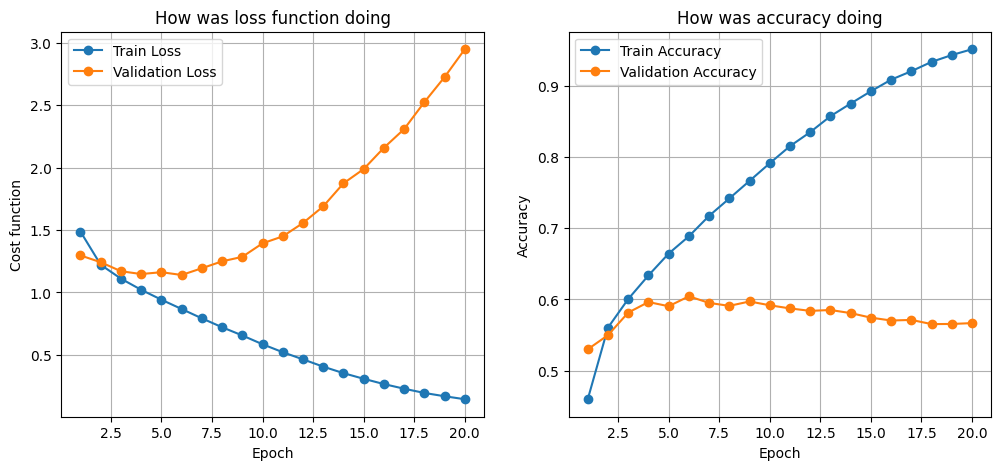

In [ ]:
import matplotlib.pyplot as plt
# Pobranie historii uczenia
loss = history.history["loss"]
val_loss = history.history["val_loss"]
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
epochs_range = range(1, len(loss) + 1)

# Wykres funkcji kosztu
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, label="Train Loss", marker="o")
plt.plot(epochs_range, val_loss, label="Validation Loss", marker="o")
plt.xlabel("Epoch")
plt.ylabel("Cost function")
plt.title("How was loss function doing")
plt.legend()
plt.grid(True)

# Wykres dokładności
plt.subplot(1, 2, 2)
plt.plot(epochs_range, accuracy, label="Train Accuracy", marker="o")
plt.plot(epochs_range, val_accuracy, label="Validation Accuracy", marker="o")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("How was accuracy doing")
plt.legend()
plt.grid(True)
plt.show()

### 3.7) Results for the test sample of the full dataset

Found 90000 images belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2813/2813 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.5981 - loss: 2.6839
Test Loss: 2.9570
Test Accuracy: 0.5659
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 69s 24ms/step


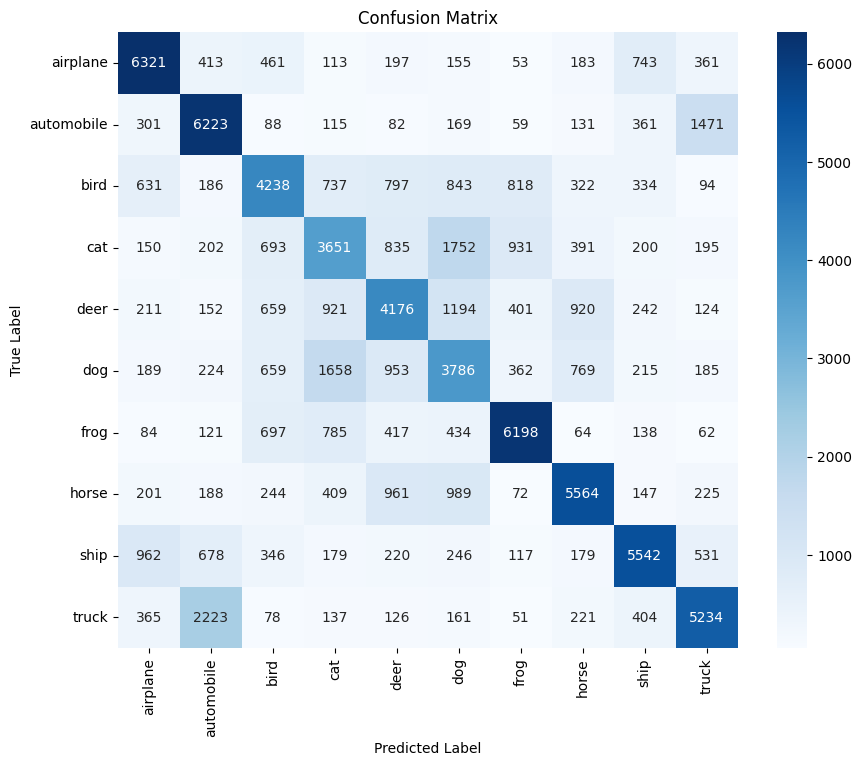

Classification Report:
              precision    recall  f1-score   support

    airplane       0.67      0.70      0.69      9000
  automobile       0.59      0.69      0.63      9000
        bird       0.52      0.47      0.49      9000
         cat       0.42      0.41      0.41      9000
        deer       0.48      0.46      0.47      9000
         dog       0.39      0.42      0.40      9000
        frog       0.68      0.69      0.69      9000
       horse       0.64      0.62      0.63      9000
        ship       0.67      0.62      0.64      9000
       truck       0.62      0.58      0.60      9000

    accuracy                           0.57     90000
   macro avg       0.57      0.57      0.57     90000
weighted avg       0.57      0.57      0.57     90000



In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator_full = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode="sparse",
    shuffle=False  # Ustawiamy shuffle=False, aby kolejność etykiet była poprawna
)
test_loss, test_accuracy = troche_lepszy_cnn.evaluate(test_generator_full)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generowanie predykcji
predictions = troche_lepszy_cnn.predict(test_generator_full)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator_full.classes
class_labels = list(test_generator_full.class_indices.keys())

# Macierz pomyłek (Confusion Matrix)
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Klasyfikacyjny raport
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

## 4) Performance of the Deep CNN

### 4.1) Training the Deep CNN on the full dataset (90k/90k/90k)

In [ ]:
datagen = ImageDataGenerator(rescale=1.0/255.0)
train_generator_50_50 = datagen.flow_from_directory(
    train_dir,
    target_size=(32,32),
    batch_size=32, # wieksze batche
    class_mode="sparse",
    shuffle=True
)

valid_generator_50_50 = datagen.flow_from_directory(
    valid_dir,
    target_size=(32,32),
    batch_size=32,
    class_mode="sparse",
    shuffle=True
)

print(f"Train set: {train_generator_50_50.samples} images")
print(f"Validation set: {valid_generator_50_50.samples} images")

Found 90000 images belonging to 10 classes.
Found 90000 images belonging to 10 classes.
Train set: 90000 images
Validation set: 90000 images


In [ ]:
EPOCHS = 10 # malo narazie

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(0.001, decay_steps=10000, decay_rate=0.9) # troche opoznienia w uczeniu
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
armata.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = armata.fit(
    train_generator_50_50,
    validation_data=valid_generator_50_50,
    epochs=EPOCHS
)

Epoch 1/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 471s 164ms/step - accuracy: 0.6326 - loss: 1.0332 - val_accuracy: 0.6231 - val_loss: 1.0438
Epoch 2/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 453s 161ms/step - accuracy: 0.6395 - loss: 1.0128 - val_accuracy: 0.6392 - val_loss: 1.0037
Epoch 3/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 449s 160ms/step - accuracy: 0.6471 - loss: 0.9927 - val_accuracy: 0.6281 - val_loss: 1.0401
Epoch 4/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 448s 159ms/step - accuracy: 0.6500 - loss: 0.9829 - val_accuracy: 0.6501 - val_loss: 0.9776
Epoch 5/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 500s 158ms/step - accuracy: 0.6604 - loss: 0.9554 - val_accuracy: 0.6623 - val_loss: 0.9425
Epoch 6/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 491s 175ms/step - accuracy: 0.6680 - loss: 0.9467 - val_accuracy: 0.6497 - val_loss: 0.9800
Epoch 7/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 442s 157ms/step - accuracy: 0.6659 - loss: 0.9363 - val_accuracy: 0.6767 - val_loss: 0.9077
Epoch 8/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 443s 157ms/step - ac

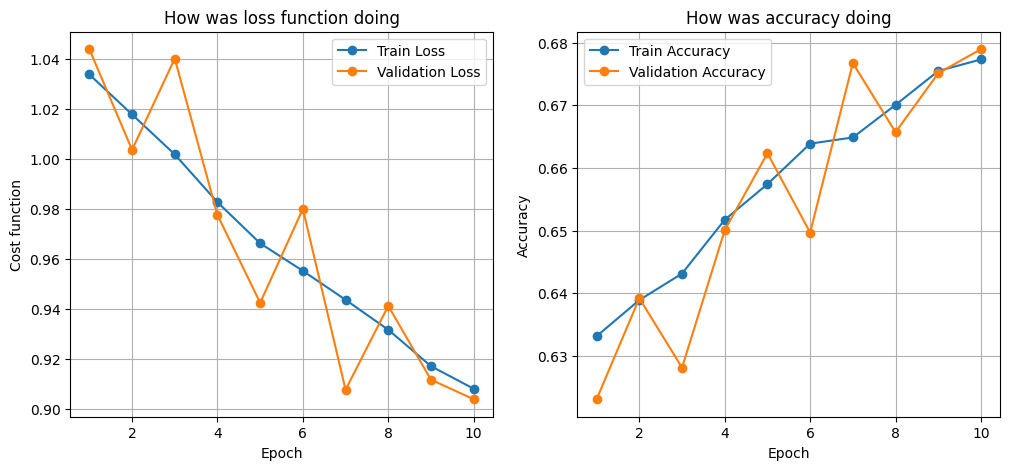

In [ ]:
import matplotlib.pyplot as plt
# Pobranie historii uczenia
loss = history.history["loss"]
val_loss = history.history["val_loss"]
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
epochs_range = range(1, len(loss) + 1)

# Wykres funkcji kosztu
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, label="Train Loss", marker="o")
plt.plot(epochs_range, val_loss, label="Validation Loss", marker="o")
plt.xlabel("Epoch")
plt.ylabel("Cost function")
plt.title("How was loss function doing")
plt.legend()
plt.grid(True)

# Wykres dokładności
plt.subplot(1, 2, 2)
plt.plot(epochs_range, accuracy, label="Train Accuracy", marker="o")
plt.plot(epochs_range, val_accuracy, label="Validation Accuracy", marker="o")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("How was accuracy doing")
plt.legend()
plt.grid(True)
plt.show()

Found 90000 images belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2813/2813 ━━━━━━━━━━━━━━━━━━━━ 108s 38ms/step - accuracy: 0.6797 - loss: 0.9017
Test Loss: 0.9122
Test Accuracy: 0.6770
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 103s 37ms/step


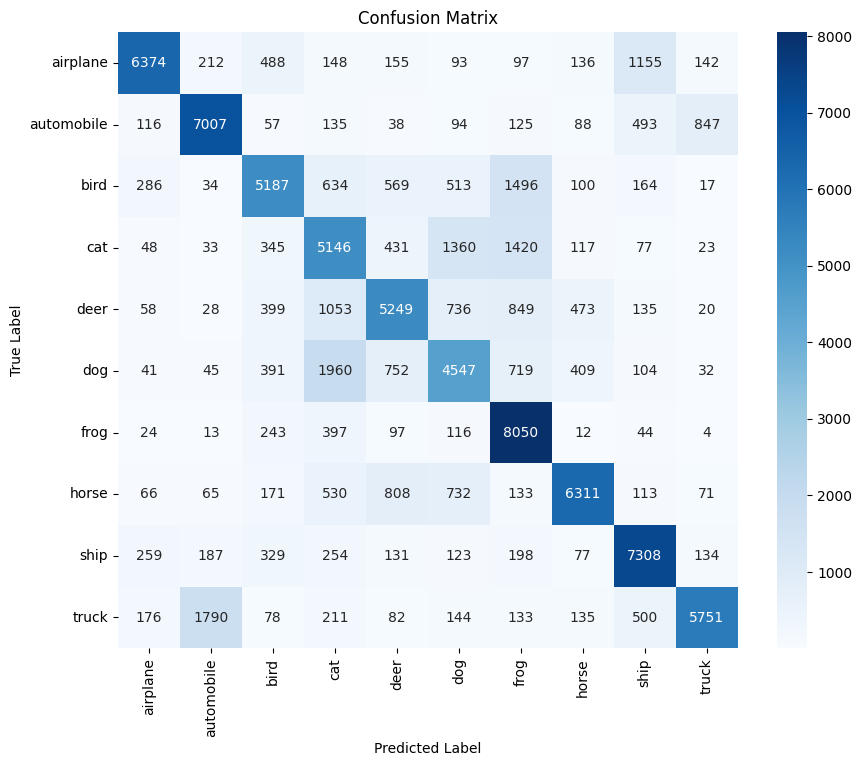

Classification Report:
              precision    recall  f1-score   support

    airplane       0.86      0.71      0.78      9000
  automobile       0.74      0.78      0.76      9000
        bird       0.67      0.58      0.62      9000
         cat       0.49      0.57      0.53      9000
        deer       0.63      0.58      0.61      9000
         dog       0.54      0.51      0.52      9000
        frog       0.61      0.89      0.72      9000
       horse       0.80      0.70      0.75      9000
        ship       0.72      0.81      0.77      9000
       truck       0.82      0.64      0.72      9000

    accuracy                           0.68     90000
   macro avg       0.69      0.68      0.68     90000
weighted avg       0.69      0.68      0.68     90000



In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator_full = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode="sparse",
    shuffle=False  # Ustawiamy shuffle=False, aby kolejność etykiet była poprawna
)
test_loss, test_accuracy = armata.evaluate(test_generator_full)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generowanie predykcji
predictions = armata.predict(test_generator_full)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator_full.classes
class_labels = list(test_generator_full.class_indices.keys())

# Macierz pomyłek (Confusion Matrix)
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Klasyfikacyjny raport
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

### 4.1) Training the Deep CNN on the full dataset (144k/36k/90k)

In [ ]:
train_ratio = 0.8  # 80% dla training144k
valid_ratio = 0.2  # 20% dla valid36k

for class_name in os.listdir(full_180k):
    class_dir = os.path.join(full_180k, class_name)
    if not os.path.isdir(class_dir):
        continue

    # Utwórz katalogi dla klasy w nowych zbiorach
    training_class_dir = os.path.join(train_144k, class_name)
    valid_class_dir = os.path.join(valid_36k, class_name)
    os.makedirs(training_class_dir, exist_ok=True)
    os.makedirs(valid_class_dir, exist_ok=True)
    files = os.listdir(class_dir)
    random.shuffle(files)  # Wymieszaj pliki, aby podział był losowy - dobra nie jestem pewien czy nie powoduje to duplikatow w zbiorze train i valid

    # Oblicz liczbę plików dla każdego zbioru
    n_train = int(len(files) * train_ratio)
    n_valid = len(files) - n_train

    # Podziel pliki na dwa zbiory
    train_files = files[:n_train]
    valid_files = files[n_train:]

    # Skopiuj pliki do odpowiednich katalogów
    for file in train_files:
        src = os.path.join(class_dir, file)
        dst = os.path.join(training_class_dir, file)
        shutil.copy(src, dst)

    for file in valid_files:
        src = os.path.join(class_dir, file)
        dst = os.path.join(valid_class_dir, file)
        shutil.copy(src, dst)

    print(f"Class {class_name}: {len(train_files)} files -> training144k, {len(valid_files)} files -> valid36k")

print("\n___________________________ Train 144k jak wygląda:")
print("\nNowe podzbiory i ilość obrazów:")
print_folder_structure_and_image_count(train_144k)

Class frog: 14400 files -> training144k, 3600 files -> valid36k
Class automobile: 14400 files -> training144k, 3600 files -> valid36k
Class deer: 14400 files -> training144k, 3600 files -> valid36k
Class horse: 14400 files -> training144k, 3600 files -> valid36k
Class truck: 14400 files -> training144k, 3600 files -> valid36k
Class cat: 14400 files -> training144k, 3600 files -> valid36k
Class airplane: 14400 files -> training144k, 3600 files -> valid36k
Class dog: 14400 files -> training144k, 3600 files -> valid36k
Class bird: 14400 files -> training144k, 3600 files -> valid36k
Class ship: 14400 files -> training144k, 3600 files -> valid36k

___________________________ Train 144k jak wygląda:

Nowe podzbiory i ilość obrazów:
train_144k/ - 0 images
  airplane/ - 14400 images
  automobile/ - 14400 images
  bird/ - 14400 images
  cat/ - 14400 images
  deer/ - 14400 images
  dog/ - 14400 images
  frog/ - 14400 images
  horse/ - 14400 images
  ship/ - 14400 images
  truck/ - 14400 images


In [ ]:
datagen = ImageDataGenerator(rescale=1.0/255.0)
train_generator_144k = datagen.flow_from_directory(
    train_144k,
    target_size=(32,32),
    batch_size=32,
    class_mode="sparse",
    shuffle=True
)

valid_generator_36k = datagen.flow_from_directory(
    valid_36k,
    target_size=(32,32),
    batch_size=32,
    class_mode="sparse",
    shuffle=True
)

print(f"Train set: {train_generator_144k.samples} images")
print(f"Validation set: {valid_generator_36k.samples} images")

Found 144000 images belonging to 10 classes.
Found 36000 images belonging to 10 classes.
Train set: 144000 images
Validation set: 36000 images


In [ ]:
EPOCHS = 20 # malo narazie

# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(0.001, decay_steps=10000, decay_rate=0.9) # narazie bez decay, bo poprzednio uczyło się zbyt wolno
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
armata.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = armata.fit(
    train_generator_144k,
    validation_data=valid_generator_36k,
    epochs=EPOCHS
)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4500/4500 ━━━━━━━━━━━━━━━━━━━━ 569s 125ms/step - accuracy: 0.3437 - loss: 1.9353 - val_accuracy: 0.3954 - val_loss: 1.7568
Epoch 2/20
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 558s 124ms/step - accuracy: 0.5158 - loss: 1.3439 - val_accuracy: 0.5275 - val_loss: 1.3172
Epoch 3/20
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 554s 123ms/step - accuracy: 0.5585 - loss: 1.2266 - val_accuracy: 0.5028 - val_loss: 1.4319
Epoch 4/20
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 561s 123ms/step - accuracy: 0.5872 - loss: 1.1586 - val_accuracy: 0.5897 - val_loss: 1.1383
Epoch 5/20
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 570s 125ms/step - accuracy: 0.6061 - loss: 1.1123 - val_accuracy: 0.5849 - val_loss: 1.1103
Epoch 6/20
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 555s 123ms/step - accuracy: 0.6206 - loss: 1.0694 - val_accuracy: 0.6229 - val_loss: 1.0366
Epoch 7/20
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 554s 123ms/step - accuracy: 0.6278 - loss: 1.0486 - val_accuracy: 0.6444 - val_loss: 0.9992
Epoch 8/20
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 555s 123ms/step - accuracy: 0.6

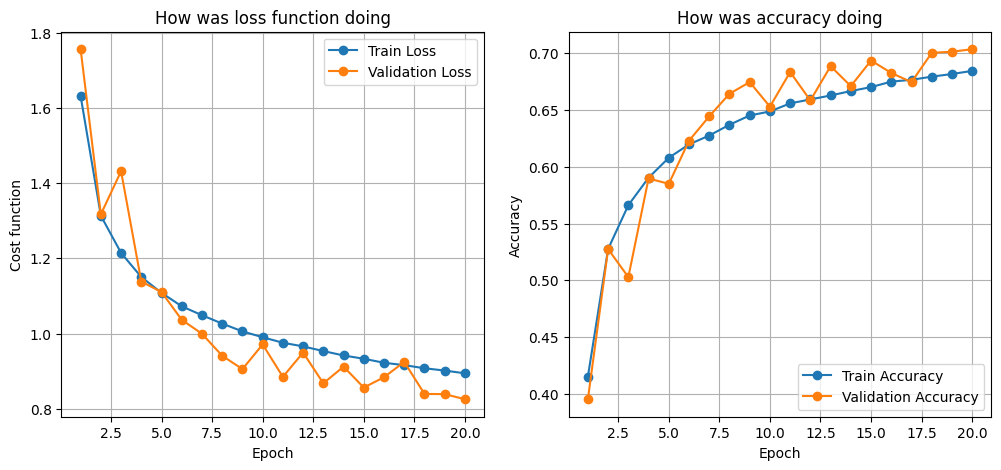

Found 90000 images belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2813/2813 ━━━━━━━━━━━━━━━━━━━━ 98s 35ms/step - accuracy: 0.7281 - loss: 0.7633
Test Loss: 0.8382
Test Accuracy: 0.7041
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 92s 33ms/step


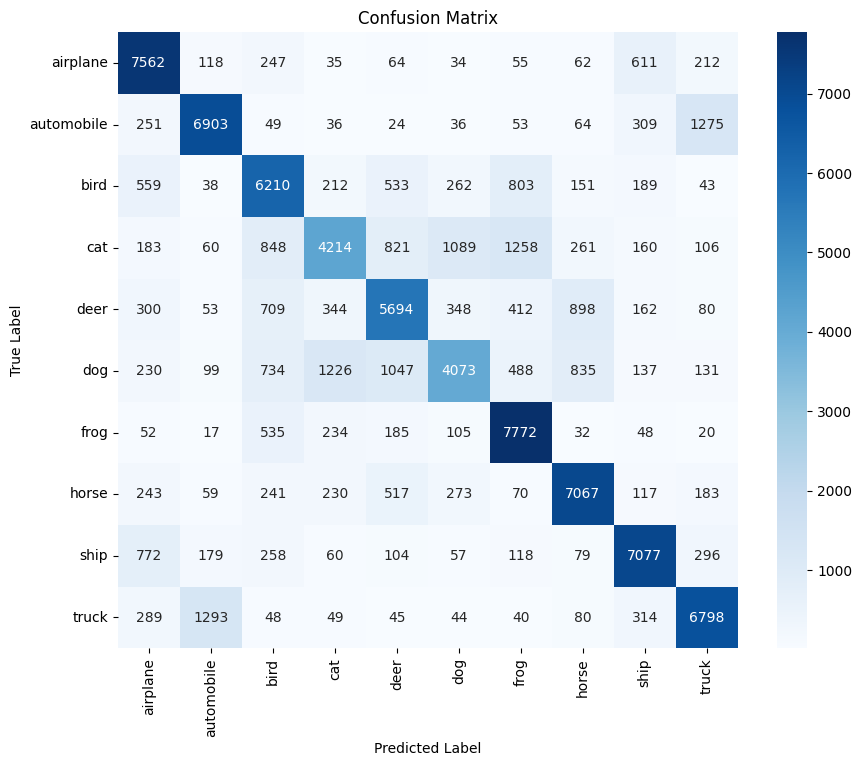

Classification Report:
              precision    recall  f1-score   support

    airplane       0.72      0.84      0.78      9000
  automobile       0.78      0.77      0.77      9000
        bird       0.63      0.69      0.66      9000
         cat       0.63      0.47      0.54      9000
        deer       0.63      0.63      0.63      9000
         dog       0.64      0.45      0.53      9000
        frog       0.70      0.86      0.77      9000
       horse       0.74      0.79      0.76      9000
        ship       0.78      0.79      0.78      9000
       truck       0.74      0.76      0.75      9000

    accuracy                           0.70     90000
   macro avg       0.70      0.70      0.70     90000
weighted avg       0.70      0.70      0.70     90000



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Pobranie historii uczenia
loss = history.history["loss"]
val_loss = history.history["val_loss"]
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
epochs_range = range(1, len(loss) + 1)

# Wykres funkcji kosztu
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, label="Train Loss", marker="o")
plt.plot(epochs_range, val_loss, label="Validation Loss", marker="o")
plt.xlabel("Epoch")
plt.ylabel("Cost function")
plt.title("How was loss function doing")
plt.legend()
plt.grid(True)

# Wykres dokładności
plt.subplot(1, 2, 2)
plt.plot(epochs_range, accuracy, label="Train Accuracy", marker="o")
plt.plot(epochs_range, val_accuracy, label="Validation Accuracy", marker="o")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("How was accuracy doing")
plt.legend()
plt.grid(True)
plt.show()

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator_full = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32,32),
    batch_size=32,
    class_mode="sparse",
    shuffle=False  # Ustawiamy shuffle=False, aby kolejność etykiet była poprawna
)
test_loss, test_accuracy = armata.evaluate(test_generator_full)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generowanie predykcji
predictions = armata.predict(test_generator_full)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator_full.classes
class_labels = list(test_generator_full.class_indices.keys())

# Macierz pomyłek (Confusion Matrix)
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Klasyfikacyjny raport
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

## 5) Data Augmentation

In [12]:
import tensorflow as tf
import numpy as np
import os
import cv2
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img, array_to_img

### 5.1) Sepia photos

In [11]:
# Function to apply sepia filter
def to_sepia(image):
    sepia_filter = np.array([[0.393, 0.769, 0.189],
                             [0.349, 0.686, 0.168],
                             [0.272, 0.534, 0.131]])
    sepia_image = cv2.transform(image, sepia_filter)
    return np.clip(sepia_image, 0, 255).astype(np.uint8)

In [13]:
sepia_train = "/kaggle/working/sepia_train"
WandB_train = "/kaggle/working/WandB_train"
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img

os.makedirs(sepia_train, exist_ok=True)

# Process each category in the train directory
for category in os.listdir(train_dir):
    category_path = os.path.join(train_dir, category)  # Path to original images
    sepia_category_path = os.path.join(sepia_train, category)  # Path for sepia images

    os.makedirs(sepia_category_path, exist_ok=True)  # Create category folder if needed

    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)  # Original image path
        sepia_img_path = os.path.join(sepia_category_path, img_name)  # Sepia image path

        # Load and preprocess image
        image = load_img(img_path)  # Load image as PIL format
        image = img_to_array(image).astype(np.uint8)  # Convert to array
        image = to_sepia(image)  # Apply sepia filter
        sepia_image = array_to_img(image)  # Convert back to image format

        # Save the sepia image
        sepia_image.save(sepia_img_path)

print("Sepia conversion complete! Images saved in:", sepia_train)


Sepia conversion complete! Images saved in: /kaggle/working/sepia_train


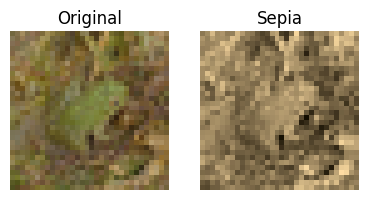

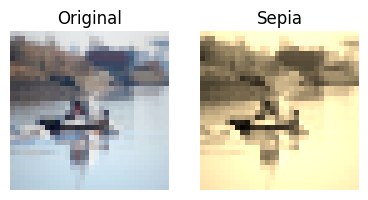

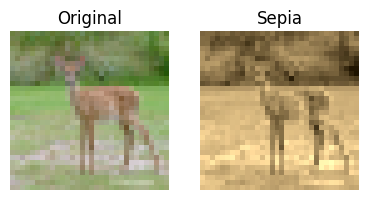

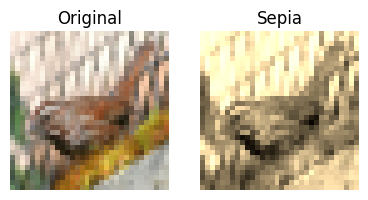

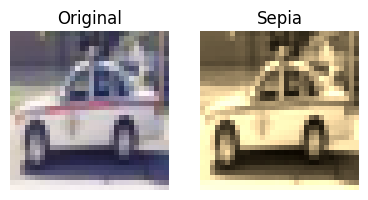

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

# Function to compare original vs. sepia images
def compare_images(train_dir, sepia_dir):
    categories = os.listdir(train_dir)  # Get categories
    for i in range(5):
      category = random.choice(categories)  # Pick a random category
      category_path = os.path.join(train_dir, category)  # Path to category folder
      img_name = random.choice(os.listdir(category_path))  # Pick a random image
      original_path = os.path.join(category_path, img_name)  # Full original image path
      sepia_path = os.path.join(sepia_dir, category, img_name)  # Corresponding sepia image

      # Check if sepia image exists
      if not os.path.exists(sepia_path):
          print(f"No matching sepia image found for {img_name}")
          return

      # Load images
      original_image = load_img(original_path)
      sepia_image = load_img(sepia_path)

      # Display images side by side
      fig, ax = plt.subplots(1, 2, figsize=(4.5, 3.5))
      ax[0].imshow(original_image)
      ax[0].set_title("Original")
      ax[0].axis("off")

      ax[1].imshow(sepia_image)
      ax[1].set_title("Sepia")
      ax[1].axis("off")

      plt.show()

# Call the function to compare random images
compare_images(train_dir, sepia_train)


### 5.2) White&Black photos

In [ ]:
# Function to convert image to grayscale
def to_grayscale(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  # Convert to grayscale
    return np.expand_dims(gray, axis=-1)  # Expand dimensions to (H, W, 1)

In [ ]:
# Ensure WandB directory exists
os.makedirs(WandB_train, exist_ok=True)

# Process each category in the train directory
for category in os.listdir(train_dir):
    category_path = os.path.join(train_dir, category)  # Path to original images
    WandB_category_path = os.path.join(WandB_train, category)  # Path for sepia images

    os.makedirs(WandB_category_path, exist_ok=True)  # Create category folder if needed

    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)  # Original image path
        WandB_img_path = os.path.join(WandB_category_path, img_name)  # Sepia image path

        # Load and preprocess image
        image = load_img(img_path)  # Load image as PIL format
        image = img_to_array(image).astype(np.uint8)  # Convert to array
        image = to_grayscale(image)  # Apply sepia filter
        WandB_image = array_to_img(image)  # Convert back to image format

        # Save the sepia image
        WandB_image.save(WandB_img_path)

print("W&B conversion complete! Images saved in:", WandB_train)


W&B conversion complete! Images saved in: /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/WandB_train


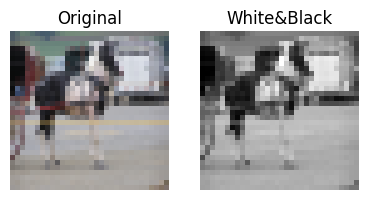

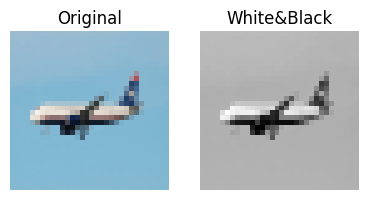

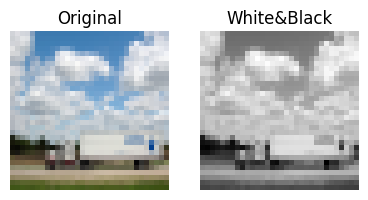

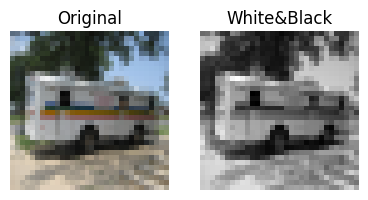

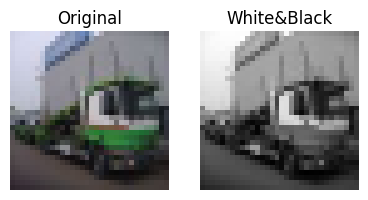

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

# Function to compare original vs. sepia images
def compare_images(train_dir, sepia_dir):
    categories = os.listdir(train_dir)  # Get categories
    for i in range(5):
      category = random.choice(categories)  # Pick a random category
      category_path = os.path.join(train_dir, category)  # Path to category folder
      img_name = random.choice(os.listdir(category_path))  # Pick a random image
      original_path = os.path.join(category_path, img_name)  # Full original image path
      sepia_path = os.path.join(sepia_dir, category, img_name)  # Corresponding sepia image

      # Check if sepia image exists
      if not os.path.exists(sepia_path):
          print(f"No matching sepia image found for {img_name}")
          return

      # Load images
      original_image = load_img(original_path)
      sepia_image = load_img(sepia_path)

      # Display images side by side
      fig, ax = plt.subplots(1, 2, figsize=(4.5, 3.5))
      ax[0].imshow(original_image)
      ax[0].set_title("Original")
      ax[0].axis("off")

      ax[1].imshow(sepia_image)
      ax[1].set_title("White&Black")
      ax[1].axis("off")

      plt.show()

# Call the function to compare random images
compare_images(train_dir, WandB_train)


### 5.3) Sobel photos

In [ ]:
import os
import numpy as np
import shutil
import cv2
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img

IMG_SIZE = (32, 32)
shutil.rmtree(os.path.join(os.path.dirname(path), "augmented_dir"), ignore_errors=True)
augmented_dir = os.path.join(os.path.dirname(path), "augmented_dir")
os.makedirs(augmented_dir, exist_ok=True)

# Efekt Sepia
def apply_sobel(image):
    """ Wykrywanie krawędzi za pomocą filtra Sobela """
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    sobel_combined = cv2.magnitude(sobelx, sobely)

    # Normalizacja wartości do przedziału [0, 255]
    sobel_combined = np.uint8(255 * sobel_combined / np.max(sobel_combined))

    # Konwersja do RGB (powielenie kanału)
    sobel_combined = cv2.cvtColor(sobel_combined, cv2.COLOR_GRAY2RGB)
    return sobel_combined

# Crop obrazu
def crop_image(image):
    """ Przycinanie obrazu (crop) """
    h, w = image.shape[:2]
    crop_size = np.random.randint(24, 32)  # Losowy rozmiar
    x = np.random.randint(0, w - crop_size)
    y = np.random.randint(0, h - crop_size)
    cropped = image[y:y+crop_size, x:x+crop_size]
    return cv2.resize(cropped, (w, h))

# Stretch obrazu
def stretch_image(image):
    """ Rozciąganie obrazu (stretch) """
    h, w = image.shape[:2]
    stretch_factor = np.random.uniform(1.0, 1.5)
    stretched = cv2.resize(image, (int(w * stretch_factor), h))
    return cv2.resize(stretched, (w, h))


# 🔹 Tworzenie augmentowanych obrazów
def create_augmented_dir(train_dir, destination_dir, method="sobel"):
    for class_name in os.listdir(train_dir):
        class_path = os.path.join(train_dir, class_name)
        augmented_class_path = os.path.join(destination_dir, class_name)

        if not os.path.isdir(class_path):
            continue

        os.makedirs(augmented_class_path, exist_ok=True)

        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = load_img(img_path, target_size=IMG_SIZE)
            img_array = img_to_array(img).astype(np.uint8)

            for i in range(1):  # 1 różna kopia obrazu
                augmented = img_array

                if method=="flip":
                    augmented = np.fliplr(augmented)

                if method=="sobel":
                    augmented = apply_sobel(augmented)

                if method=="crop":
                    augmented = crop_image(augmented)
                if method=="stretch":
                    augmented = stretch_image(augmented)

                # Zapis obrazka
                augmented_img = array_to_img(augmented)
                augmented_img.save(os.path.join(augmented_class_path, f"aug_{i}_{img_name}"))

    return destination_dir

print("Augmentacja zakończona! Obrazy zapisane w:", create_augmented_dir(train_dir, augmented_dir))


Augmentacja zakończona! Obrazy zapisane w: /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/augmented_dir


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1.0/255.0)
tf.random.set_seed(20)
# Original images generator
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=128,  # Larger batches
    class_mode="sparse",
    shuffle=True
)

# Sobel images generator
sobel_generator = datagen.flow_from_directory(
    augmented_dir,
    target_size=(32, 32),
    batch_size=128,  # Larger batches
    class_mode="sparse",
    shuffle=True
)

# Create a generator that combines both generators
def combined_generator(gen1, gen2):
    while True:
        # Combine batches from both generators
        x1, y1 = next(gen1)
        x2, y2 = next(gen2)

        # Concatenate the images and labels
        yield (np.concatenate([x1, x2]), np.concatenate([y1, y2]))

# Use combined generator
train_generator_50_50 = combined_generator(train_generator, sobel_generator)


valid_generator_50_50 = datagen.flow_from_directory(
    valid_dir,
    target_size=(32,32),
    batch_size=128,
    class_mode="sparse",
    shuffle=True
)

# Calculate the number of samples in the original and sepia generators
train_samples = train_generator.samples
sobel_samples = sobel_generator.samples

# Total number of samples in the combined generator (since we're combining both)
total_samples = train_samples + sobel_samples

print(f"Train set: {total_samples} images")
print(f"Validation set: {valid_generator_50_50.samples} images")


Found 90000 images belonging to 10 classes.
Found 90000 images belonging to 10 classes.
Found 90000 images belonging to 10 classes.
Train set: 180000 images
Validation set: 90000 images


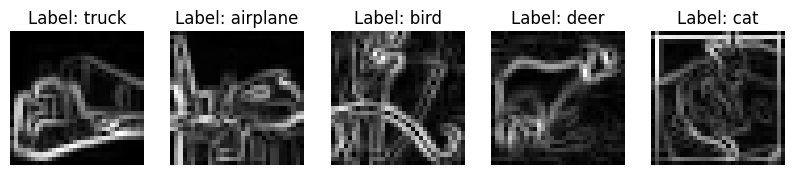

In [ ]:
import matplotlib.pyplot as plt

np.random.seed(20)
images, labels = next(sobel_generator)  # zwraca zbiór obrazków i odpowiadające im labels.
class_mapping = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
# Wyświetlenie 5 pierwszych obrazów:
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i])  # Obrazki są w formacie RGB
    plt.title(f"Label: {class_mapping[int(labels[i])]}")
    plt.axis("off")
plt.show()

In [ ]:
EPOCHS = 10 # malo narazie          # SOBEL
# Define steps per epoch
steps_per_epoch = total_samples // 128  # Ensure batch_size=32
validation_steps = valid_generator_50_50.samples // 128

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(0.001, decay_steps=10000, decay_rate=0.9) # troche opoznienia w uczeniu
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
armata.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = armata.fit(
    train_generator_50_50,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator_50_50,
    validation_steps=validation_steps,
    epochs=EPOCHS
)
armata.save("sovel.h5")

Epoch 1/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.3219 - loss: 2.0076

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1406/1406 ━━━━━━━━━━━━━━━━━━━━ 144s 94ms/step - accuracy: 0.3219 - loss: 2.0074 - val_accuracy: 0.5315 - val_loss: 1.2818
Epoch 2/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 123s 87ms/step - accuracy: 0.5053 - loss: 1.3746 - val_accuracy: 0.5893 - val_loss: 1.1248
Epoch 3/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 141s 101ms/step - accuracy: 0.5543 - loss: 1.2476 - val_accuracy: 0.5865 - val_loss: 1.1579
Epoch 4/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 141s 101ms/step - accuracy: 0.5787 - loss: 1.1819 - val_accuracy: 0.6487 - val_loss: 0.9720
Epoch 5/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 123s 87ms/step - accuracy: 0.5992 - loss: 1.1251 - val_accuracy: 0.6598 - val_loss: 0.9439
Epoch 6/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 123s 87ms/step - accuracy: 0.6129 - loss: 1.0880 - val_accuracy: 0.6473 - val_loss: 0.9904
Epoch 7/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 141s 100ms/step - accuracy: 0.6241 - loss: 1.0595 - val_accuracy: 0.6733 - val_loss: 0.9057
Epoch 8/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 124s 88ms/step - accuracy: 0.6335 -

### 5.4) crop

Augmentacja zakończona! Obrazy zapisane w: /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/augmented_dir
Found 90000 images belonging to 10 classes.
Found 90000 images belonging to 10 classes.
Found 90000 images belonging to 10 classes.
Train set: 180000 images
Validation set: 90000 images


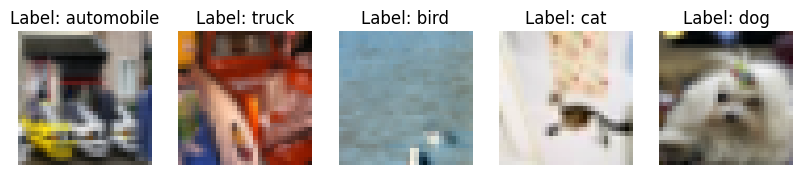

In [ ]:
import os
import numpy as np
import shutil
import cv2
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img

IMG_SIZE = (32, 32)
shutil.rmtree(os.path.join(os.path.dirname(path), "augmented_dir"), ignore_errors=True)
augmented_dir = os.path.join(os.path.dirname(path), "augmented_dir")
os.makedirs(augmented_dir, exist_ok=True)

# Efekt Sepia
def apply_sobel(image):
    """ Wykrywanie krawędzi za pomocą filtra Sobela """
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    sobel_combined = cv2.magnitude(sobelx, sobely)

    # Normalizacja wartości do przedziału [0, 255]
    sobel_combined = np.uint8(255 * sobel_combined / np.max(sobel_combined))

    # Konwersja do RGB (powielenie kanału)
    sobel_combined = cv2.cvtColor(sobel_combined, cv2.COLOR_GRAY2RGB)
    return sobel_combined

# Crop obrazu
def crop_image(image):
    """ Przycinanie obrazu (crop) """
    h, w = image.shape[:2]
    crop_size = np.random.randint(24, 32)  # Losowy rozmiar
    x = np.random.randint(0, w - crop_size)
    y = np.random.randint(0, h - crop_size)
    cropped = image[y:y+crop_size, x:x+crop_size]
    return cv2.resize(cropped, (w, h))

# Stretch obrazu
def stretch_image(image):
    """ Rozciąganie obrazu (stretch) """
    h, w = image.shape[:2]
    stretch_factor = np.random.uniform(1.0, 1.5)
    stretched = cv2.resize(image, (int(w * stretch_factor), h))
    return cv2.resize(stretched, (w, h))


# 🔹 Tworzenie augmentowanych obrazów
def create_augmented_dir(train_dir, destination_dir, method="sobel"):
    for class_name in os.listdir(train_dir):
        class_path = os.path.join(train_dir, class_name)
        augmented_class_path = os.path.join(destination_dir, class_name)

        if not os.path.isdir(class_path):
            continue

        os.makedirs(augmented_class_path, exist_ok=True)

        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = load_img(img_path, target_size=IMG_SIZE)
            img_array = img_to_array(img).astype(np.uint8)

            for i in range(1):  # 1 różna kopia obrazu
                augmented = img_array

                if method=="flip":
                    augmented = np.fliplr(augmented)

                if method=="sobel":
                    augmented = apply_sobel(augmented)

                if method=="crop":
                    augmented = crop_image(augmented)
                if method=="stretch":
                    augmented = stretch_image(augmented)

                # Zapis obrazka
                augmented_img = array_to_img(augmented)
                augmented_img.save(os.path.join(augmented_class_path, f"aug_{i}_{img_name}"))

    return destination_dir

print("Augmentacja zakończona! Obrazy zapisane w:", create_augmented_dir(train_dir, augmented_dir, method="crop"))
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1.0/255.0)
tf.random.set_seed(20)
# Original images generator
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=128,  # Larger batches
    class_mode="sparse",
    shuffle=True
)

# Sobel images generator
sobel_generator = datagen.flow_from_directory(
    augmented_dir,
    target_size=(32, 32),
    batch_size=128,  # Larger batches
    class_mode="sparse",
    shuffle=True
)

# Create a generator that combines both generators
def combined_generator(gen1, gen2):
    while True:
        # Combine batches from both generators
        x1, y1 = next(gen1)
        x2, y2 = next(gen2)

        # Concatenate the images and labels
        yield (np.concatenate([x1, x2]), np.concatenate([y1, y2]))

# Use combined generator
train_generator_50_50 = combined_generator(train_generator, sobel_generator)


valid_generator_50_50 = datagen.flow_from_directory(
    valid_dir,
    target_size=(32,32),
    batch_size=128,
    class_mode="sparse",
    shuffle=True
)

# Calculate the number of samples in the original and sepia generators
train_samples = train_generator.samples
sobel_samples = sobel_generator.samples

# Total number of samples in the combined generator (since we're combining both)
total_samples = train_samples + sobel_samples

print(f"Train set: {total_samples} images")
print(f"Validation set: {valid_generator_50_50.samples} images")

import matplotlib.pyplot as plt

np.random.seed(20)
images, labels = next(sobel_generator)  # zwraca zbiór obrazków i odpowiadające im labels.
class_mapping = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
# Wyświetlenie 5 pierwszych obrazów:
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i])  # Obrazki są w formacie RGB
    plt.title(f"Label: {class_mapping[int(labels[i])]}")
    plt.axis("off")
plt.show()


In [ ]:
EPOCHS = 10 # malo narazie       # CROP
# Define steps per epoch
steps_per_epoch = total_samples // 128  # Ensure batch_size=32
validation_steps = valid_generator_50_50.samples // 128

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(0.001, decay_steps=10000, decay_rate=0.9) # troche opoznienia w uczeniu
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
armata.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = armata.fit(
    train_generator_50_50,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator_50_50,
    validation_steps=validation_steps,
    epochs=EPOCHS
)
armata.save("crop.h5")

Epoch 1/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.3520 - loss: 1.9070

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1406/1406 ━━━━━━━━━━━━━━━━━━━━ 150s 98ms/step - accuracy: 0.3520 - loss: 1.9068 - val_accuracy: 0.4915 - val_loss: 1.4921
Epoch 2/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 139s 99ms/step - accuracy: 0.5361 - loss: 1.2754 - val_accuracy: 0.5953 - val_loss: 1.1114
Epoch 3/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 127s 90ms/step - accuracy: 0.5920 - loss: 1.1356 - val_accuracy: 0.6273 - val_loss: 1.0494
Epoch 4/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 150s 106ms/step - accuracy: 0.6232 - loss: 1.0533 - val_accuracy: 0.6360 - val_loss: 1.0167
Epoch 5/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 125s 89ms/step - accuracy: 0.6438 - loss: 0.9981 - val_accuracy: 0.6738 - val_loss: 0.9131
Epoch 6/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 141s 100ms/step - accuracy: 0.6612 - loss: 0.9528 - val_accuracy: 0.6633 - val_loss: 0.9437
Epoch 7/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 142s 101ms/step - accuracy: 0.6728 - loss: 0.9192 - val_accuracy: 0.6664 - val_loss: 0.9582
Epoch 8/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 142s 101ms/step - accuracy: 0.6839 

### 5.5) flip

Augmentacja zakończona! Obrazy zapisane w: /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/augmented_dir
Found 90000 images belonging to 10 classes.
Found 90000 images belonging to 10 classes.
Found 90000 images belonging to 10 classes.
Train set: 180000 images
Validation set: 90000 images


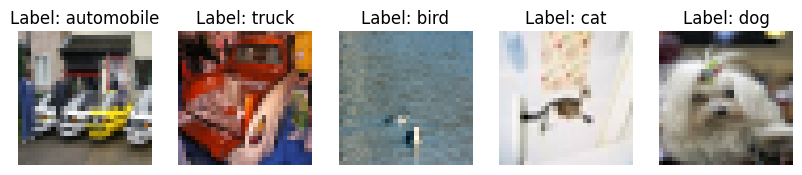

In [ ]:
import os
import numpy as np
import shutil
import cv2
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img

IMG_SIZE = (32, 32)
shutil.rmtree(os.path.join(os.path.dirname(path), "augmented_dir"), ignore_errors=True)
augmented_dir = os.path.join(os.path.dirname(path), "augmented_dir")
os.makedirs(augmented_dir, exist_ok=True)

# Efekt Sepia
def apply_sobel(image):
    """ Wykrywanie krawędzi za pomocą filtra Sobela """
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    sobel_combined = cv2.magnitude(sobelx, sobely)

    # Normalizacja wartości do przedziału [0, 255]
    sobel_combined = np.uint8(255 * sobel_combined / np.max(sobel_combined))

    # Konwersja do RGB (powielenie kanału)
    sobel_combined = cv2.cvtColor(sobel_combined, cv2.COLOR_GRAY2RGB)
    return sobel_combined

# Crop obrazu
def crop_image(image):
    """ Przycinanie obrazu (crop) """
    h, w = image.shape[:2]
    crop_size = np.random.randint(24, 32)  # Losowy rozmiar
    x = np.random.randint(0, w - crop_size)
    y = np.random.randint(0, h - crop_size)
    cropped = image[y:y+crop_size, x:x+crop_size]
    return cv2.resize(cropped, (w, h))

# Stretch obrazu
def stretch_image(image):
    """ Rozciąganie obrazu (stretch) """
    h, w = image.shape[:2]
    stretch_factor = np.random.uniform(1.0, 1.5)
    stretched = cv2.resize(image, (int(w * stretch_factor), h))
    return cv2.resize(stretched, (w, h))


# 🔹 Tworzenie augmentowanych obrazów
def create_augmented_dir(train_dir, destination_dir, method="sobel"):
    for class_name in os.listdir(train_dir):
        class_path = os.path.join(train_dir, class_name)
        augmented_class_path = os.path.join(destination_dir, class_name)

        if not os.path.isdir(class_path):
            continue

        os.makedirs(augmented_class_path, exist_ok=True)

        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = load_img(img_path, target_size=IMG_SIZE)
            img_array = img_to_array(img).astype(np.uint8)

            for i in range(1):  # 1 różna kopia obrazu
                augmented = img_array

                if method=="flip":
                    augmented = np.fliplr(augmented)

                if method=="sobel":
                    augmented = apply_sobel(augmented)

                if method=="crop":
                    augmented = crop_image(augmented)
                if method=="stretch":
                    augmented = stretch_image(augmented)

                # Zapis obrazka
                augmented_img = array_to_img(augmented)
                augmented_img.save(os.path.join(augmented_class_path, f"aug_{i}_{img_name}"))

    return destination_dir

print("Augmentacja zakończona! Obrazy zapisane w:", create_augmented_dir(train_dir, augmented_dir, method="flip"))
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1.0/255.0)
tf.random.set_seed(20)
# Original images generator
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=128,  # Larger batches
    class_mode="sparse",
    shuffle=True
)

# Sobel images generator
sobel_generator = datagen.flow_from_directory(
    augmented_dir,
    target_size=(32, 32),
    batch_size=128,  # Larger batches
    class_mode="sparse",
    shuffle=True
)

# Create a generator that combines both generators
def combined_generator(gen1, gen2):
    while True:
        # Combine batches from both generators
        x1, y1 = next(gen1)
        x2, y2 = next(gen2)

        # Concatenate the images and labels
        yield (np.concatenate([x1, x2]), np.concatenate([y1, y2]))

# Use combined generator
train_generator_50_50 = combined_generator(train_generator, sobel_generator)


valid_generator_50_50 = datagen.flow_from_directory(
    valid_dir,
    target_size=(32,32),
    batch_size=128,
    class_mode="sparse",
    shuffle=True
)

# Calculate the number of samples in the original and sepia generators
train_samples = train_generator.samples
sobel_samples = sobel_generator.samples

# Total number of samples in the combined generator (since we're combining both)
total_samples = train_samples + sobel_samples

print(f"Train set: {total_samples} images")
print(f"Validation set: {valid_generator_50_50.samples} images")

import matplotlib.pyplot as plt

np.random.seed(20)
images, labels = next(sobel_generator)  # zwraca zbiór obrazków i odpowiadające im labels.
class_mapping = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
# Wyświetlenie 5 pierwszych obrazów:
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i])  # Obrazki są w formacie RGB
    plt.title(f"Label: {class_mapping[int(labels[i])]}")
    plt.axis("off")
plt.show()


In [ ]:
EPOCHS = 10 # malo narazie       # FLIP
# Define steps per epoch
steps_per_epoch = total_samples // 128  # Ensure batch_size=32
validation_steps = valid_generator_50_50.samples // 128

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(0.001, decay_steps=10000, decay_rate=0.9) # troche opoznienia w uczeniu
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
armata.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = armata.fit(
    train_generator_50_50,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator_50_50,
    validation_steps=validation_steps,
    epochs=EPOCHS
)
armata.save("flip.h5")

Epoch 1/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 146s 97ms/step - accuracy: 0.6898 - loss: 0.8739 - val_accuracy: 0.7079 - val_loss: 0.8230
Epoch 2/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 141s 100ms/step - accuracy: 0.7041 - loss: 0.8335 - val_accuracy: 0.6857 - val_loss: 0.8870
Epoch 3/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 143s 102ms/step - accuracy: 0.7117 - loss: 0.8095 - val_accuracy: 0.6722 - val_loss: 0.9345
Epoch 4/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 159s 113ms/step - accuracy: 0.7191 - loss: 0.7884 - val_accuracy: 0.7224 - val_loss: 0.7821
Epoch 5/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 133s 95ms/step - accuracy: 0.7270 - loss: 0.7678 - val_accuracy: 0.7172 - val_loss: 0.8025
Epoch 6/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 139s 99ms/step - accuracy: 0.7301 - loss: 0.7558 - val_accuracy: 0.6861 - val_loss: 0.8911
Epoch 7/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 144s 102ms/step - accuracy: 0.7331 - loss: 0.7446 - val_accuracy: 0.6818 - val_loss: 0.9086
Epoch 8/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 139s 99ms/step - accura

### 5.6) stretch


Augmentacja zakończona! Obrazy zapisane w: /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/augmented_dir
Found 90000 images belonging to 10 classes.
Found 90000 images belonging to 10 classes.
Found 90000 images belonging to 10 classes.
Train set: 180000 images
Validation set: 90000 images


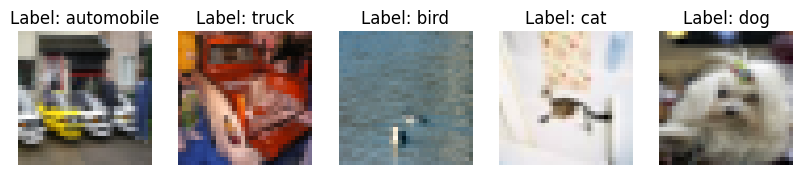

In [ ]:
import os
import numpy as np
import shutil
import cv2
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img

IMG_SIZE = (32, 32)
shutil.rmtree(os.path.join(os.path.dirname(path), "augmented_dir"), ignore_errors=True)
augmented_dir = os.path.join(os.path.dirname(path), "augmented_dir")
os.makedirs(augmented_dir, exist_ok=True)

# Efekt Sepia
def apply_sobel(image):
    """ Wykrywanie krawędzi za pomocą filtra Sobela """
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    sobel_combined = cv2.magnitude(sobelx, sobely)

    # Normalizacja wartości do przedziału [0, 255]
    sobel_combined = np.uint8(255 * sobel_combined / np.max(sobel_combined))

    # Konwersja do RGB (powielenie kanału)
    sobel_combined = cv2.cvtColor(sobel_combined, cv2.COLOR_GRAY2RGB)
    return sobel_combined

# Crop obrazu
def crop_image(image):
    """ Przycinanie obrazu (crop) """
    h, w = image.shape[:2]
    crop_size = np.random.randint(24, 32)  # Losowy rozmiar
    x = np.random.randint(0, w - crop_size)
    y = np.random.randint(0, h - crop_size)
    cropped = image[y:y+crop_size, x:x+crop_size]
    return cv2.resize(cropped, (w, h))

# Stretch obrazu
def stretch_image(image):
    """ Rozciąganie obrazu (stretch) """
    h, w = image.shape[:2]
    stretch_factor = np.random.uniform(1.1, 1.8)
    stretched = cv2.resize(image, (int(w * stretch_factor), h))
    return cv2.resize(stretched, (w, h))

def add_gaussian_noise(image):
    """ Dodaje subtelny szum Gaussa do obrazu """
    mean = 0
    stddev = 5
    noise = np.random.normal(mean, stddev, image.shape).astype(np.uint8)
    noisy_image = cv2.add(image, noise)
    return np.clip(noisy_image, 0, 255)

# 🔹 Tworzenie augmentowanych obrazów
def create_augmented_dir(train_dir, destination_dir, method="sobel"):
    for class_name in os.listdir(train_dir):
        class_path = os.path.join(train_dir, class_name)
        augmented_class_path = os.path.join(destination_dir, class_name)

        if not os.path.isdir(class_path):
            continue

        os.makedirs(augmented_class_path, exist_ok=True)

        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = load_img(img_path, target_size=IMG_SIZE)
            img_array = img_to_array(img).astype(np.uint8)

            for i in range(1):  # 1 różna kopia obrazu
                augmented = img_array

                if method=="flip":
                    augmented = np.fliplr(augmented)

                if method=="sobel":
                    augmented = apply_sobel(augmented)

                if method=="noise":
                    augmented = add_gaussian_noise(augmented)

                if method=="crop":
                    augmented = crop_image(augmented)
                if method=="stretch":
                    augmented = stretch_image(augmented)

                # Zapis obrazka
                augmented_img = array_to_img(augmented)
                augmented_img.save(os.path.join(augmented_class_path, f"aug_{i}_{img_name}"))

    return destination_dir

print("Augmentacja zakończona! Obrazy zapisane w:", create_augmented_dir(train_dir, augmented_dir, method="stretch"))
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1.0/255.0)
tf.random.set_seed(20)
# Original images generator
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=128,  # Larger batches
    class_mode="sparse",
    shuffle=True
)

# Sobel images generator
sobel_generator = datagen.flow_from_directory(
    augmented_dir,
    target_size=(32, 32),
    batch_size=128,  # Larger batches
    class_mode="sparse",
    shuffle=True
)

# Create a generator that combines both generators
def combined_generator(gen1, gen2):
    while True:
        # Combine batches from both generators
        x1, y1 = next(gen1)
        x2, y2 = next(gen2)

        # Concatenate the images and labels
        yield (np.concatenate([x1, x2]), np.concatenate([y1, y2]))

# Use combined generator
train_generator_50_50 = combined_generator(train_generator, sobel_generator)


valid_generator_50_50 = datagen.flow_from_directory(
    valid_dir,
    target_size=(32,32),
    batch_size=128,
    class_mode="sparse",
    shuffle=True
)

# Calculate the number of samples in the original and sepia generators
train_samples = train_generator.samples
sobel_samples = sobel_generator.samples

# Total number of samples in the combined generator (since we're combining both)
total_samples = train_samples + sobel_samples

print(f"Train set: {total_samples} images")
print(f"Validation set: {valid_generator_50_50.samples} images")

import matplotlib.pyplot as plt

np.random.seed(20)
images, labels = next(sobel_generator)  # zwraca zbiór obrazków i odpowiadające im labels.
class_mapping = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
# Wyświetlenie 5 pierwszych obrazów:
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i])  # Obrazki są w formacie RGB
    plt.title(f"Label: {class_mapping[int(labels[i])]}")
    plt.axis("off")
plt.show()


In [ ]:
EPOCHS = 10 # malo narazie       # SCRETCH
# Define steps per epoch
steps_per_epoch = total_samples // 128  # Ensure batch_size=32
validation_steps = valid_generator_50_50.samples // 128

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(0.001, decay_steps=10000, decay_rate=0.9) # troche opoznienia w uczeniu
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
armata.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = armata.fit(
    train_generator_50_50,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator_50_50,
    validation_steps=validation_steps,
    epochs=EPOCHS
)
armata.save("scretch.h5")

Epoch 1/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 142s 95ms/step - accuracy: 0.7464 - loss: 0.7114 - val_accuracy: 0.7176 - val_loss: 0.7947
Epoch 2/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 129s 92ms/step - accuracy: 0.7585 - loss: 0.6767 - val_accuracy: 0.7224 - val_loss: 0.7994
Epoch 3/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 141s 100ms/step - accuracy: 0.7642 - loss: 0.6571 - val_accuracy: 0.7131 - val_loss: 0.8313
Epoch 4/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 142s 101ms/step - accuracy: 0.7693 - loss: 0.6431 - val_accuracy: 0.7281 - val_loss: 0.7892
Epoch 5/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 130s 93ms/step - accuracy: 0.7757 - loss: 0.6248 - val_accuracy: 0.7176 - val_loss: 0.8229
Epoch 6/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 127s 90ms/step - accuracy: 0.7802 - loss: 0.6118 - val_accuracy: 0.7107 - val_loss: 0.8464
Epoch 7/10
 682/1406 ━━━━━━━━━━━━━━━━━━━━ 50s 70ms/step - accuracy: 0.7858 - loss: 0.5993

### 5.7) gaussian noise

Augmentacja zakończona! Obrazy zapisane w: /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/augmented_dir
Found 90000 images belonging to 10 classes.
Found 90000 images belonging to 10 classes.
Found 90000 images belonging to 10 classes.
Train set: 180000 images
Validation set: 90000 images


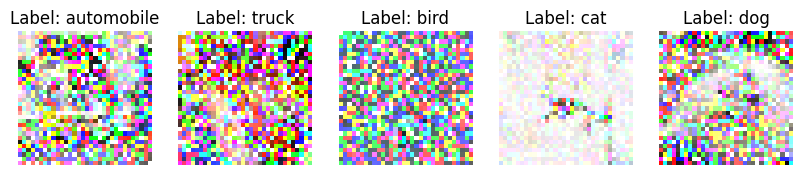

In [ ]:
print("Augmentacja zakończona! Obrazy zapisane w:", create_augmented_dir(train_dir, augmented_dir, method="noise"))
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1.0/255.0)
tf.random.set_seed(20)
# Original images generator
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=128,  # Larger batches
    class_mode="sparse",
    shuffle=True
)

# Sobel images generator
noise_generator = datagen.flow_from_directory(
    augmented_dir,
    target_size=(32, 32),
    batch_size=128,  # Larger batches
    class_mode="sparse",
    shuffle=True
)

# Create a generator that combines both generators
def combined_generator(gen1, gen2):
    while True:
        # Combine batches from both generators
        x1, y1 = next(gen1)
        x2, y2 = next(gen2)

        # Concatenate the images and labels
        yield (np.concatenate([x1, x2]), np.concatenate([y1, y2]))

# Use combined generator
train_generator_50_50 = combined_generator(train_generator, noise_generator)


valid_generator_50_50 = datagen.flow_from_directory(
    valid_dir,
    target_size=(32,32),
    batch_size=128,
    class_mode="sparse",
    shuffle=True
)

# Calculate the number of samples in the original and sepia generators
train_samples = train_generator.samples
sobel_samples = noise_generator.samples

# Total number of samples in the combined generator (since we're combining both)
total_samples = train_samples + sobel_samples

print(f"Train set: {total_samples} images")
print(f"Validation set: {valid_generator_50_50.samples} images")

import matplotlib.pyplot as plt

np.random.seed(20)
images, labels = next(noise_generator)  # zwraca zbiór obrazków i odpowiadające im labels.
class_mapping = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
# Wyświetlenie 5 pierwszych obrazów:
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i])  # Obrazki są w formacie RGB
    plt.title(f"Label: {class_mapping[int(labels[i])]}")
    plt.axis("off")
plt.show()


In [ ]:
EPOCHS = 10 # malo narazie       # GAUSSIAN NOISE
# Define steps per epoch
steps_per_epoch = total_samples // 128  # Ensure batch_size=32
validation_steps = valid_generator_50_50.samples // 128

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(0.001, decay_steps=10000, decay_rate=0.9) # troche opoznienia w uczeniu
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
armata.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = armata.fit(
    train_generator_50_50,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator_50_50,
    validation_steps=validation_steps,
    epochs=EPOCHS
)
armata.save("noise.h5")

Epoch 1/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.2888 - loss: 2.1006

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1406/1406 ━━━━━━━━━━━━━━━━━━━━ 194s 127ms/step - accuracy: 0.2888 - loss: 2.1004 - val_accuracy: 0.4903 - val_loss: 1.3878
Epoch 2/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 141s 100ms/step - accuracy: 0.4517 - loss: 1.5001 - val_accuracy: 0.5564 - val_loss: 1.2136
Epoch 3/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 141s 100ms/step - accuracy: 0.5049 - loss: 1.3675 - val_accuracy: 0.5905 - val_loss: 1.1353
Epoch 4/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 128s 91ms/step - accuracy: 0.5373 - loss: 1.2825 - val_accuracy: 0.6086 - val_loss: 1.0888
Epoch 5/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 199s 142ms/step - accuracy: 0.5655 - loss: 1.2110 - val_accuracy: 0.6055 - val_loss: 1.0997
Epoch 6/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 163s 116ms/step - accuracy: 0.5843 - loss: 1.1576 - val_accuracy: 0.6266 - val_loss: 1.0400
Epoch 7/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 173s 123ms/step - accuracy: 0.5993 - loss: 1.1179 - val_accuracy: 0.6387 - val_loss: 1.0109
Epoch 8/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 139s 99ms/step - accuracy: 0.611

Found 90000 images belonging to 10 classes.
Found 90000 images belonging to 10 classes.
Found 90000 images belonging to 10 classes.
Train set: 180000 images
Validation set: 90000 images


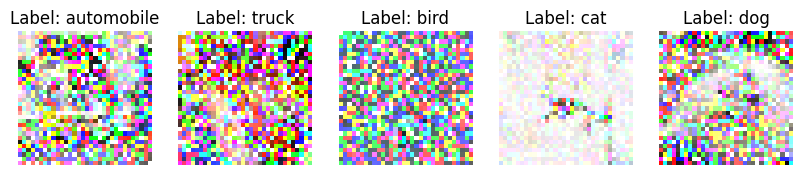

Epoch 1/10
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 170s 28ms/step - accuracy: 0.6019 - loss: 1.1168 - val_accuracy: 0.6320 - val_loss: 1.0255
Epoch 2/10
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 201s 36ms/step - accuracy: 0.6058 - loss: 1.1052 - val_accuracy: 0.6369 - val_loss: 1.0159
Epoch 3/10
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 203s 36ms/step - accuracy: 0.6143 - loss: 1.0768 - val_accuracy: 0.6194 - val_loss: 1.0749
Epoch 4/10
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 154s 27ms/step - accuracy: 0.6225 - loss: 1.0540 - val_accuracy: 0.6341 - val_loss: 1.0364
Epoch 5/10
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 148s 26ms/step - accuracy: 0.6322 - loss: 1.0293 - val_accuracy: 0.6362 - val_loss: 1.0198
Epoch 6/10
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 149s 27ms/step - accuracy: 0.6420 - loss: 1.0044 - val_accuracy: 0.6408 - val_loss: 1.0059
Epoch 7/10
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 154s 27ms/step - accuracy: 0.6489 - loss: 0.9867 - val_accuracy: 0.6416 - val_loss: 1.0141
Epoch 8/10
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 161s 29ms/step - accuracy: 

In [ ]:
datagen = ImageDataGenerator(rescale=1.0/255.0)
tf.random.set_seed(20)
# Original images generator
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=32,  # Larger batches
    class_mode="sparse",
    shuffle=True
)

# Sobel images generator
noise_generator = datagen.flow_from_directory(
    augmented_dir,
    target_size=(32, 32),
    batch_size=32,  # Larger batches
    class_mode="sparse",
    shuffle=True
)

# Create a generator that combines both generators
def combined_generator(gen1, gen2):
    while True:
        # Combine batches from both generators
        x1, y1 = next(gen1)
        x2, y2 = next(gen2)

        # Concatenate the images and labels
        yield (np.concatenate([x1, x2]), np.concatenate([y1, y2]))

# Use combined generator
train_generator_50_50 = combined_generator(train_generator, noise_generator)


valid_generator_50_50 = datagen.flow_from_directory(
    valid_dir,
    target_size=(32,32),
    batch_size=32,
    class_mode="sparse",
    shuffle=True
)

# Calculate the number of samples in the original and sepia generators
train_samples = train_generator.samples
sobel_samples = noise_generator.samples

# Total number of samples in the combined generator (since we're combining both)
total_samples = train_samples + sobel_samples

print(f"Train set: {total_samples} images")
print(f"Validation set: {valid_generator_50_50.samples} images")

import matplotlib.pyplot as plt

np.random.seed(20)
images, labels = next(noise_generator)  # zwraca zbiór obrazków i odpowiadające im labels.
class_mapping = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
# Wyświetlenie 5 pierwszych obrazów:
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i])  # Obrazki są w formacie RGB
    plt.title(f"Label: {class_mapping[int(labels[i])]}")
    plt.axis("off")
plt.show()

EPOCHS = 10 # malo narazie       # GAUSSIAN NOISE
# Define steps per epoch
steps_per_epoch = total_samples // 32  # Ensure batch_size=32
validation_steps = valid_generator_50_50.samples // 32

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(0.001, decay_steps=10000, decay_rate=0.9) # troche opoznienia w uczeniu
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
armata.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = armata.fit(
    train_generator_50_50,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator_50_50,
    validation_steps=validation_steps,
    epochs=EPOCHS
)
armata.save("noise2.h5")


In [ ]:
from google.colab import files
files.download("noise.h5")
files.download("noise2.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 5.8) Performance of the deep CNN on augmented dataset

#### 5.8.1) Results for combined sepia photos with original

##### 5.8.1.1) Batch size 128

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Define ImageDataGenerators for original and sepia images
datagen = ImageDataGenerator(rescale=1.0/255.0)

# Original images generator
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=128,  # Larger batches
    class_mode="sparse",
    shuffle=True
)

# Sepia images generator
sepia_generator = datagen.flow_from_directory(
    sepia_train,
    target_size=(32, 32),
    batch_size=128,  # Larger batches
    class_mode="sparse",
    shuffle=True
)

# Create a generator that combines both generators
def combined_generator(gen1, gen2):
    while True:
        # Combine batches from both generators
        x1, y1 = next(gen1)
        x2, y2 = next(gen2)

        # Concatenate the images and labels
        yield (np.concatenate([x1, x2]), np.concatenate([y1, y2]))

# Use combined generator
train_generator_50_50 = combined_generator(train_generator, sepia_generator)


valid_generator_50_50 = datagen.flow_from_directory(
    valid_dir,
    target_size=(32,32),
    batch_size=128,
    class_mode="sparse",
    shuffle=True
)

# Calculate the number of samples in the original and sepia generators
train_samples = train_generator.samples
sepia_samples = sepia_generator.samples

# Total number of samples in the combined generator (since we're combining both)
total_samples = train_samples + sepia_samples

print(f"Train set: {total_samples} images")
print(f"Validation set: {valid_generator_50_50.samples} images")


Found 90000 images belonging to 10 classes.
Found 90000 images belonging to 10 classes.
Found 90000 images belonging to 10 classes.
Train set: 180000 images
Validation set: 90000 images


In [ ]:
EPOCHS = 10 # malo narazie
# Define steps per epoch
steps_per_epoch = total_samples // 128  # Ensure batch_size=32
validation_steps = valid_generator_50_50.samples // 128

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(0.001, decay_steps=10000, decay_rate=0.9) # troche opoznienia w uczeniu
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
armata.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = armata.fit(
    train_generator_50_50,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator_50_50,
    validation_steps=validation_steps,
    epochs=EPOCHS
)

Epoch 1/10
5624/5625 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3828 - loss: 1.7854

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5625/5625 ━━━━━━━━━━━━━━━━━━━━ 179s 30ms/step - accuracy: 0.3828 - loss: 1.7852 - val_accuracy: 0.5726 - val_loss: 1.1799
Epoch 2/10
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 161s 29ms/step - accuracy: 0.5674 - loss: 1.2082 - val_accuracy: 0.5778 - val_loss: 1.2192
Epoch 3/10
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 163s 29ms/step - accuracy: 0.6113 - loss: 1.0916 - val_accuracy: 0.6294 - val_loss: 1.0436
Epoch 4/10
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 202s 36ms/step - accuracy: 0.6374 - loss: 1.0225 - val_accuracy: 0.6488 - val_loss: 0.9708
Epoch 5/10
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 202s 36ms/step - accuracy: 0.6545 - loss: 0.9715 - val_accuracy: 0.6243 - val_loss: 1.0638
Epoch 6/10
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 202s 36ms/step - accuracy: 0.6690 - loss: 0.9325 - val_accuracy: 0.6823 - val_loss: 0.8877
Epoch 7/10
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 202s 36ms/step - accuracy: 0.6829 - loss: 0.8976 - val_accuracy: 0.6751 - val_loss: 0.9202
Epoch 8/10
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 202s 36ms/step - accuracy: 0.6923 - lo

Found 90000 images belonging to 10 classes.
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 36s 13ms/step - accuracy: 0.7003 - loss: 0.8613
Test Loss: 0.9172
Test Accuracy: 0.6832
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 33s 12ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 34s 12ms/step


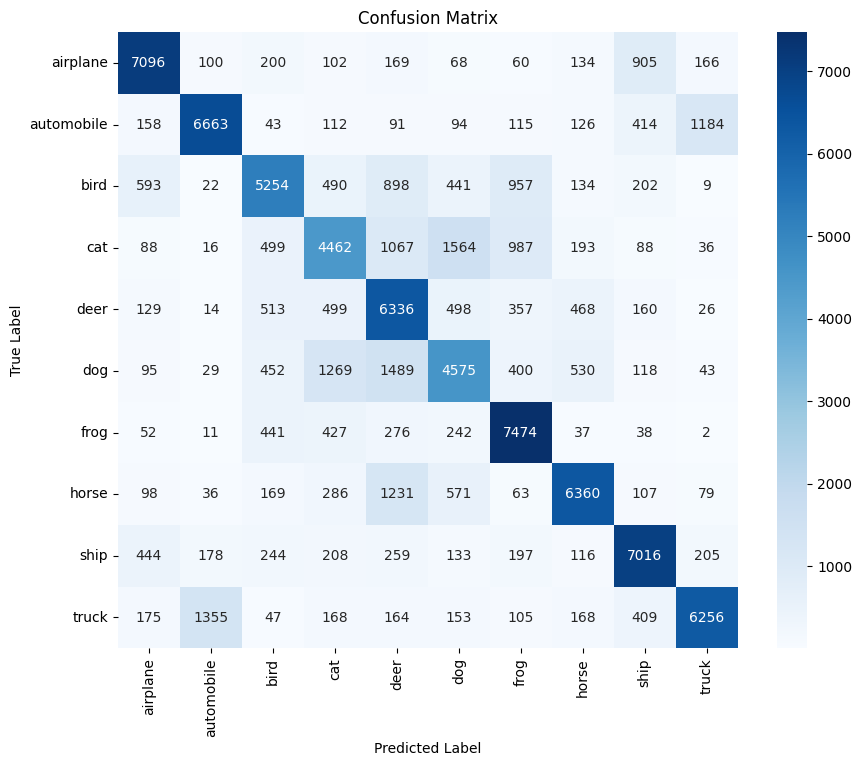

In [ ]:
import json

# Save the model
armata.save("sepia_mode128.h5")
armata.save("sepia_mode128.keras")

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator_full = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32,32),
    batch_size=32,
    class_mode="sparse",
    shuffle=False  # Ustawiamy shuffle=False, aby kolejność etykiet była poprawna
)
test_loss, test_accuracy = armata.evaluate(test_generator_full)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


import json
import numpy as np

# Get predictions
predictions = armata.predict(test_generator_full)
predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class indices

# Create a structured dictionary for saving
training_results = {
    "history": history.history,  # Training loss and accuracy
    "predictions": predictions.tolist(),  # Convert NumPy array to list
    "predicted_classes": predicted_classes.tolist(),
    "true_classes": test_generator_full.classes.tolist(),  # Convert NumPy array to list
    "class_labels": list(test_generator_full.class_indices.keys()),  # Class names
    "loss": history.history['loss'],
    "val_loss": history.history['val_loss'],
    "accuracy": history.history['accuracy'],
    "val_accuracy": history.history['val_accuracy']
}


# Save to a JSON file
with open("sepia_training_history128.json", "w") as f:
    json.dump(training_results, f)

# Generowanie predykcji
predictions = armata.predict(test_generator_full)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator_full.classes
class_labels = list(test_generator_full.class_indices.keys())

# Macierz pomyłek (Confusion Matrix)
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from google.colab import files
import time

# Poczekaj chwilę, aby upewnić się, że plik jest zapisany
time.sleep(1)

files.download("sepia_mode128raz.h5")  # Pobranie modelu
files.download("sepia_training_history128.json")
files.download("sepia_mode128.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### 5.8.2) Results for combined W&B photos with original

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Define ImageDataGenerators for original and sepia images
datagen = ImageDataGenerator(rescale=1.0/255.0)

# Original images generator
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=32,  # Larger batches
    class_mode="sparse",
    shuffle=True
)

# Sepia images generator
WandB_generator = datagen.flow_from_directory(
    WandB_train,
    target_size=(32, 32),
    batch_size=32,  # Larger batches
    class_mode="sparse",
    shuffle=True
)

# Create a generator that combines both generators
def combined_generator(gen1, gen2):
    while True:
        # Combine batches from both generators
        x1, y1 = next(gen1)
        x2, y2 = next(gen2)

        # Concatenate the images and labels
        yield (np.concatenate([x1, x2]), np.concatenate([y1, y2]))

# Use combined generator
train_generator_50_50WB = combined_generator(train_generator, WandB_generator)

# Now you can use this generator in your model
# Example: model.fit(train_generator_50_50, steps_per_epoch=100, epochs=10)



# Validation generator - wybiera 1800 obrazów (without data augmentation!)
valid_generator_50_50 = datagen.flow_from_directory(
    valid_dir,
    target_size=(32,32),
    batch_size=32,
    class_mode="sparse",
    shuffle=True
)

# Calculate the number of samples in the original and sepia generators
train_samples = train_generator.samples
WandB_samples = WandB_generator.samples

# Total number of samples in the combined generator (since we're combining both)
total_samples = train_samples + WandB_samples

print(f"Train set: {total_samples} images")
print(f"Validation set: {valid_generator_50_50.samples} images")


In [ ]:
EPOCHS = 10 # malo narazie
# Define steps per epoch
steps_per_epoch = total_samples // 32  # Ensure batch_size=32
validation_steps = valid_generator_50_50.samples // 32

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(0.001, decay_steps=10000, decay_rate=0.9) # troche opoznienia w uczeniu
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
armata.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = armata.fit(
    train_generator_50_50WB,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator_50_50,
    validation_steps=validation_steps,
    epochs=EPOCHS
)

In [ ]:
import json

# Save the model
armata.save("WandB_mode32.h5")
armata.save("WandB_mode32.keras")

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator_full = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32,32),
    batch_size=32,
    class_mode="sparse",
    shuffle=False  # Ustawiamy shuffle=False, aby kolejność etykiet była poprawna
)
test_loss, test_accuracy = armata.evaluate(test_generator_full)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


import json
import numpy as np

# Get predictions
predictions = armata.predict(test_generator_full)
predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class indices

# Create a structured dictionary for saving
training_results = {
    "history": history.history,  # Training loss and accuracy
    "predictions": predictions.tolist(),  # Convert NumPy array to list
    "predicted_classes": predicted_classes.tolist(),
    "true_classes": test_generator_full.classes.tolist(),  # Convert NumPy array to list
    "class_labels": list(test_generator_full.class_indices.keys()),  # Class names
    "loss": history.history['loss'],
    "val_loss": history.history['val_loss'],
    "accuracy": history.history['accuracy'],
    "val_accuracy": history.history['val_accuracy']
}


# Save to a JSON file
with open("WandB_training_history32.json", "w") as f:
    json.dump(training_results, f)

# Generowanie predykcji
predictions = armata.predict(test_generator_full)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator_full.classes
class_labels = list(test_generator_full.class_indices.keys())

# Macierz pomyłek (Confusion Matrix)
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from google.colab import files
import time

time.sleep(1)

files.download("WandB_mode32.h5")
files.download("WandB_training_history32.json")
files.download("WandB_mode32.keras")

##### 5.8.2.1) batch size 128


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Define ImageDataGenerators for original and sepia images
datagen = ImageDataGenerator(rescale=1.0/255.0)

# Original images generator
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=128,  # Larger batches
    class_mode="sparse",
    shuffle=True
)

# Sepia images generator
WandB_generator = datagen.flow_from_directory(
    WandB_train,
    target_size=(32, 32),
    batch_size=128,  # Larger batches
    class_mode="sparse",
    shuffle=True
)

# Create a generator that combines both generators
def combined_generator(gen1, gen2):
    while True:
        # Combine batches from both generators
        x1, y1 = next(gen1)
        x2, y2 = next(gen2)

        # Concatenate the images and labels
        yield (np.concatenate([x1, x2]), np.concatenate([y1, y2]))

# Use combined generator
train_generator_50_50WB = combined_generator(train_generator, WandB_generator)

valid_generator_50_50 = datagen.flow_from_directory(
    valid_dir,
    target_size=(32,32),
    batch_size=128,
    class_mode="sparse",
    shuffle=True
)

# Calculate the number of samples in the original and sepia generators
train_samples = train_generator.samples
WandB_samples = WandB_generator.samples

# Total number of samples in the combined generator (since we're combining both)
total_samples = train_samples + WandB_samples

print(f"Train set: {total_samples} images")
print(f"Validation set: {valid_generator_50_50.samples} images")


Found 90000 images belonging to 10 classes.
Found 90000 images belonging to 10 classes.
Found 90000 images belonging to 10 classes.
Train set: 180000 images
Validation set: 90000 images


In [ ]:
EPOCHS = 10 # malo narazie
# Define steps per epoch
steps_per_epoch = total_samples // 128  # Ensure batch_size=32
validation_steps = valid_generator_50_50.samples // 128

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(0.001, decay_steps=10000, decay_rate=0.9) # troche opoznienia w uczeniu
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
armata.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = armata.fit(
    train_generator_50_50WB,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator_50_50,
    validation_steps=validation_steps,
    epochs=EPOCHS
)

Epoch 1/10
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.3773 - loss: 1.8001

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5625/5625 ━━━━━━━━━━━━━━━━━━━━ 1726s 306ms/step - accuracy: 0.3774 - loss: 1.8000 - val_accuracy: 0.5696 - val_loss: 1.1864
Epoch 2/10
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 1751s 311ms/step - accuracy: 0.5635 - loss: 1.2202 - val_accuracy: 0.6137 - val_loss: 1.0652
Epoch 3/10
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 1671s 297ms/step - accuracy: 0.6086 - loss: 1.1003 - val_accuracy: 0.5719 - val_loss: 1.2185
Epoch 4/10
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 1695s 301ms/step - accuracy: 0.6357 - loss: 1.0267 - val_accuracy: 0.5990 - val_loss: 1.1570
Epoch 5/10
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 1648s 293ms/step - accuracy: 0.6550 - loss: 0.9757 - val_accuracy: 0.6537 - val_loss: 0.9631
Epoch 6/10
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 1643s 292ms/step - accuracy: 0.6688 - loss: 0.9335 - val_accuracy: 0.6576 - val_loss: 0.9738
Epoch 7/10
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 1636s 291ms/step - accuracy: 0.6799 - loss: 0.9036 - val_accuracy: 0.6908 - val_loss: 0.8653
Epoch 8/10
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 1645s 293ms/step - accur

In [ ]:
from google.colab import files
import time

# Poczekaj chwilę, aby upewnić się, że plik jest zapisany
time.sleep(1)

files.download("WandB_mode128.h5")  # Pobranie modelu
files.download("WandB_training_history128.json")
files.download("WandB_mode128.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### 5.8.3) Comparion of Sepia photos and W&B

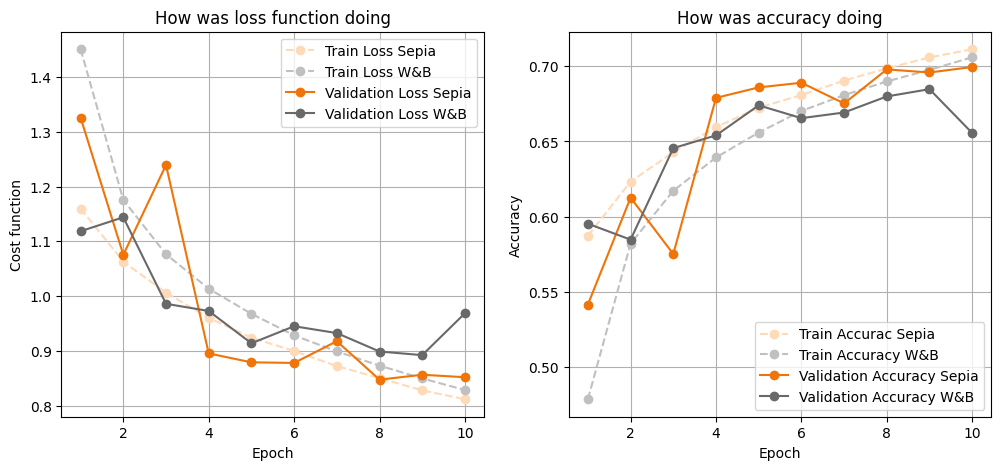

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Pobranie historii uczenia
loss_sepia = history_sepia["loss"]
val_loss_sepia = history_sepia["val_loss"]
accuracy_sepia = history_sepia["accuracy"]
val_accuracy_sepia = history_sepia["val_accuracy"]

loss_WB = history_WB["loss"]
val_loss_WB = history_WB["val_loss"]
accuracy_WB = history_WB["accuracy"]
val_accuracy_WB = history_WB["val_accuracy"]
epochs_range = range(1, len(loss_WB) + 1)

# Wykres funkcji kosztu
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss_sepia, label="Train Loss Sepia", marker="o", linestyle = '--', color = 'peachpuff')
plt.plot(epochs_range, loss_WB, label="Train Loss W&B", marker="o", linestyle = '--', color = 'silver')
plt.plot(epochs_range, val_loss_sepia, label="Validation Loss Sepia", marker="o", color = '#f07407')

plt.plot(epochs_range, val_loss_WB, label="Validation Loss W&B", marker="o", color = 'dimgrey')
plt.xlabel("Epoch")
plt.ylabel("Cost function")
plt.title("How was loss function doing")
plt.legend()
plt.grid(True)

# Wykres dokładności
plt.subplot(1, 2, 2)
plt.plot(epochs_range, accuracy_sepia, label="Train Accurac Sepia", marker="o", linestyle = '--', color = 'peachpuff')
plt.plot(epochs_range, accuracy_WB, label="Train Accuracy W&B", marker="o", linestyle = '--', color = 'silver')
plt.plot(epochs_range, val_accuracy_sepia, label="Validation Accuracy Sepia", marker="o", color = '#f07407')

plt.plot(epochs_range, val_accuracy_WB, label="Validation Accuracy W&B", marker="o", color = 'dimgrey')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("How was accuracy doing")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import os
import random
import shutil

# Ścieżki do zbiorów
sepia_dir = sepia_train
bw_dir = WandB_train

# Folder na nowy zbiór
shutil.rmtree(os.path.join(os.path.dirname(path), "mixed_bw_sepia"), ignore_errors=True)
output_dir = os.path.join(os.path.dirname(path), "mixed_bw_sepia")
os.makedirs(output_dir, exist_ok=True)

# Pobranie listy kategorii
categories = os.listdir(sepia_dir)

# Iteracja przez kategorie
for category in categories:
    # Pobierz listę plików (taką samą dla obu wersji)
    image_list = os.listdir(os.path.join(sepia_dir, category))

    # Losowe przetasowanie
    random.shuffle(image_list)

    # Podział na 50% sepia, 50% B&W
    split_index = len(image_list) // 2
    sepia_selected = image_list[:split_index]
    bw_selected = image_list[split_index:]

    # Tworzymy folder docelowy dla kategorii
    category_output_dir = os.path.join(output_dir, category)
    os.makedirs(category_output_dir, exist_ok=True)

    # Kopiujemy pliki w wersji sepia
    for img in sepia_selected:
        shutil.copy(os.path.join(sepia_dir, category, img), os.path.join(category_output_dir, img))

    # Kopiujemy pliki w wersji B&W
    for img in bw_selected:
        shutil.copy(os.path.join(bw_dir, category, img), os.path.join(category_output_dir, img))

print("✅ Gotowe! Każdy obraz występuje tylko raz – albo w sepii, albo w B&W.")


✅ Gotowe! Każdy obraz występuje tylko raz – albo w sepii, albo w B&W.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Define ImageDataGenerators for original and sepia images
datagen = ImageDataGenerator(rescale=1.0/255.0)

# Original images generator
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=128,  # Larger batches
    class_mode="sparse",
    shuffle=True
)

# Mixed colors images generator
mixed_generator = datagen.flow_from_directory(
    output_dir,
    target_size=(32, 32),
    batch_size=128,  # Larger batches
    class_mode="sparse",
    shuffle=True
)

# Create a generator that combines both generators
def combined_generator(gen1, gen2):
    while True:
        # Combine batches from both generators
        x1, y1 = next(gen1)
        x2, y2 = next(gen2)

        # Concatenate the images and labels
        yield (np.concatenate([x1, x2]), np.concatenate([y1, y2]))

# Use combined generator
train_generator_50_50_Mx_orgin = combined_generator(train_generator, mixed_generator)

# Now you can use this generator in your model
# Example: model.fit(train_generator_50_50, steps_per_epoch=100, epochs=10)


# Validation generator - wybiera 1800 obrazów (without data augmentation!)
valid_generator_50_50 = datagen.flow_from_directory(
    valid_dir,
    target_size=(32,32),
    batch_size=128,
    class_mode="sparse",
    shuffle=True
)

# Calculate the number of samples in the original and sepia generators
train_samples = train_generator.samples
mixed_samples = mixed_generator.samples

# Total number of samples in the combined generator (since we're combining both)
total_samples = train_samples + mixed_samples

print(f"Train set: {total_samples} images")
print(f"Validation set: {valid_generator_50_50.samples} images")


Found 90000 images belonging to 10 classes.
Found 90000 images belonging to 10 classes.
Found 90000 images belonging to 10 classes.
Train set: 180000 images
Validation set: 90000 images


In [ ]:
EPOCHS = 10 #
# Define steps per epoch
steps_per_epoch = total_samples // 128  # Ensure batch_size=32
validation_steps = valid_generator_50_50.samples // 128

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(0.001, decay_steps=10000, decay_rate=0.9) # troche opoznienia w uczeniu
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
armata.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = armata.fit(
    train_generator_50_50_Mx_orgin,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator_50_50,
    validation_steps=validation_steps,
    epochs=EPOCHS
)

Epoch 1/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.3453 - loss: 1.9408

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1406/1406 ━━━━━━━━━━━━━━━━━━━━ 219s 147ms/step - accuracy: 0.3454 - loss: 1.9406 - val_accuracy: 0.5458 - val_loss: 1.2582
Epoch 2/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 168s 120ms/step - accuracy: 0.5447 - loss: 1.2662 - val_accuracy: 0.5823 - val_loss: 1.1646
Epoch 3/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 137s 98ms/step - accuracy: 0.5943 - loss: 1.1323 - val_accuracy: 0.6207 - val_loss: 1.0468
Epoch 4/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 161s 115ms/step - accuracy: 0.6270 - loss: 1.0485 - val_accuracy: 0.6119 - val_loss: 1.1201
Epoch 5/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 197s 140ms/step - accuracy: 0.6478 - loss: 0.9925 - val_accuracy: 0.6653 - val_loss: 0.9397
Epoch 6/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 144s 102ms/step - accuracy: 0.6638 - loss: 0.9461 - val_accuracy: 0.6691 - val_loss: 0.9196
Epoch 7/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 137s 97ms/step - accuracy: 0.6771 - loss: 0.9042 - val_accuracy: 0.6787 - val_loss: 0.8985
Epoch 8/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 137s 97ms/step - accuracy: 0.6889

#### 5.8.4) Performance of Sepia and W&B photos on the test dataset




Found 90000 images belonging to 10 classes.
  1/704 ━━━━━━━━━━━━━━━━━━━━ 46s 66ms/step - accuracy: 0.6875 - loss: 0.9823

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


704/704 ━━━━━━━━━━━━━━━━━━━━ 28s 40ms/step - accuracy: 0.5915 - loss: 1.1918
Test Loss: 1.1139
Test Accuracy: 0.6153
704/704 ━━━━━━━━━━━━━━━━━━━━ 27s 39ms/step
704/704 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step


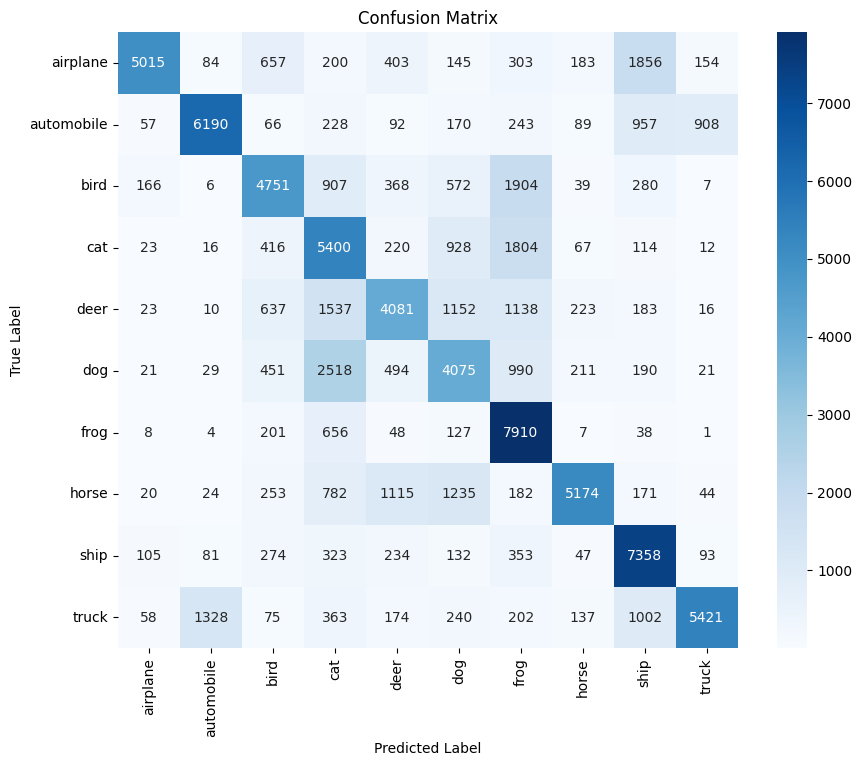

In [ ]:
import json

# Save the model
armata.save("mixed_model128.h5")
armata.save("mixed_model128.keras")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator_full = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32,32),
    batch_size=128,
    class_mode="sparse",
    shuffle=False  # Ustawiamy shuffle=False, aby kolejność etykiet była poprawna
)
test_loss, test_accuracy = armata.evaluate(test_generator_full)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


import json
import numpy as np

# Get predictions
predictions = armata.predict(test_generator_full)
predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class indices

# Create a structured dictionary for saving
training_results = {
    "history": history.history,  # Training loss and accuracy
    "predictions": predictions.tolist(),  # Convert NumPy array to list
    "predicted_classes": predicted_classes.tolist(),
    "true_classes": test_generator_full.classes.tolist(),  # Convert NumPy array to list
    "class_labels": list(test_generator_full.class_indices.keys()),  # Class names
    "loss": history.history['loss'],
    "val_loss": history.history['val_loss'],
    "accuracy": history.history['accuracy'],
    "val_accuracy": history.history['val_accuracy']
}


# Save to a JSON file
with open("mixed_training_history128.json", "w") as f:
    json.dump(training_results, f)

# Generowanie predykcji
predictions = armata.predict(test_generator_full)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator_full.classes
class_labels = list(test_generator_full.class_indices.keys())

# Macierz pomyłek (Confusion Matrix)
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from google.colab import files
import time

# Poczekaj chwilę, aby upewnić się, że plik jest zapisany
time.sleep(2)

files.download("mixed_model128.h5")  # Pobranie modelu
files.download("mixed_training_history128.json")
files.download("mixed_model128.keras")


In [ ]:
EPOCHS = 10 # malo narazie
# Define steps per epoch
steps_per_epoch = total_samples // 32  # Ensure batch_size=32
validation_steps = valid_generator_50_50.samples // 32

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(0.001, decay_steps=10000, decay_rate=0.9) # troche opoznienia w uczeniu
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
armata.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = armata.fit(
    train_generator_50_50_Mx_orgin,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator_50_50,
    validation_steps=validation_steps,
    epochs=EPOCHS
)

Epoch 1/10
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.3844 - loss: 1.7829

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5625/5625 ━━━━━━━━━━━━━━━━━━━━ 1511s 268ms/step - accuracy: 0.3844 - loss: 1.7828 - val_accuracy: 0.5367 - val_loss: 1.2810
Epoch 2/10
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 1385s 246ms/step - accuracy: 0.5672 - loss: 1.2151 - val_accuracy: 0.6180 - val_loss: 1.0542
Epoch 3/10
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 1466s 261ms/step - accuracy: 0.6086 - loss: 1.0957 - val_accuracy: 0.6342 - val_loss: 1.0146
Epoch 4/10
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 1579s 281ms/step - accuracy: 0.6359 - loss: 1.0268 - val_accuracy: 0.6469 - val_loss: 0.9769
Epoch 5/10
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 1444s 257ms/step - accuracy: 0.6537 - loss: 0.9791 - val_accuracy: 0.6745 - val_loss: 0.9110
Epoch 6/10
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 1414s 251ms/step - accuracy: 0.6682 - loss: 0.9390 - val_accuracy: 0.6834 - val_loss: 0.8883
Epoch 7/10
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 1416s 252ms/step - accuracy: 0.6766 - loss: 0.9109 - val_accuracy: 0.6628 - val_loss: 0.9468
Epoch 8/10
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 1389s 247ms/step - accur

Found 90000 images belonging to 10 classes.
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 117s 42ms/step - accuracy: 0.6717 - loss: 0.9191
Test Loss: 0.9049
Test Accuracy: 0.6822
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 106s 37ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 103s 37ms/step


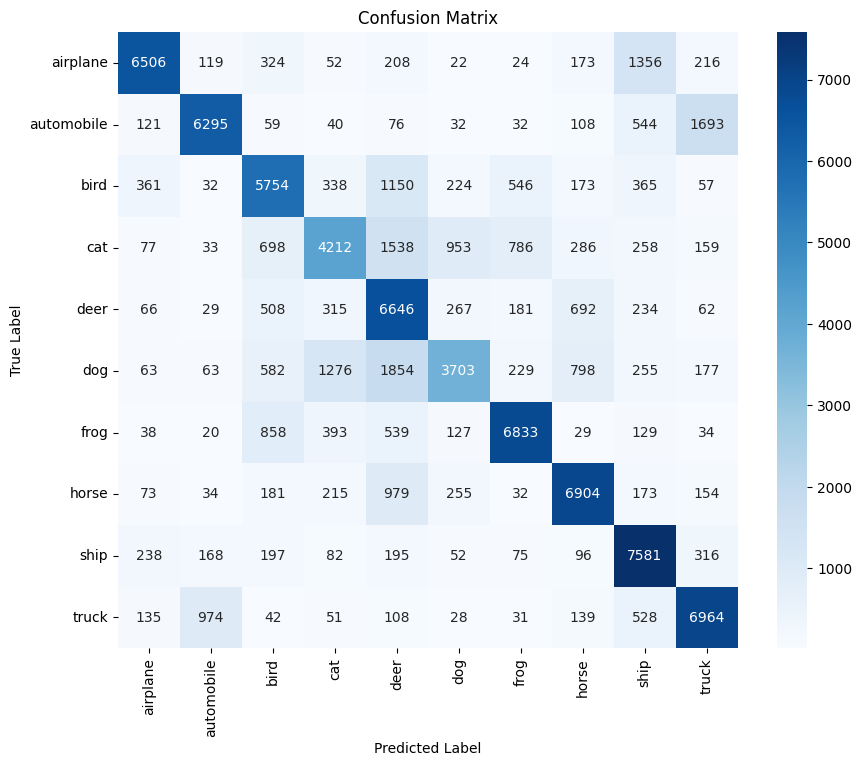

In [ ]:
import json

# Save the model
armata.save("mixed_model.h5")
armata.save("mixed_model.keras")

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator_full = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32,32),
    batch_size=32,
    class_mode="sparse",
    shuffle=False  # Ustawiamy shuffle=False, aby kolejność etykiet była poprawna
)
test_loss, test_accuracy = armata.evaluate(test_generator_full)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


import json
import numpy as np

# Get predictions
predictions = armata.predict(test_generator_full)
predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class indices

# Create a structured dictionary for saving
training_results = {
    "history": history.history,  # Training loss and accuracy
    "predictions": predictions.tolist(),  # Convert NumPy array to list
    "predicted_classes": predicted_classes.tolist(),
    "true_classes": test_generator_full.classes.tolist(),  # Convert NumPy array to list
    "class_labels": list(test_generator_full.class_indices.keys()),  # Class names
}

# Save to a JSON file
with open("mixed_training_history.json", "w") as f:
    json.dump(training_results, f)

# Generowanie predykcji
predictions = armata.predict(test_generator_full)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator_full.classes
class_labels = list(test_generator_full.class_indices.keys())

# Macierz pomyłek (Confusion Matrix)
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import kagglehub
import tensorflow as tf
import numpy as np
import os
import shutil
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Function to create or clear directories
def create_clean_dir(directory):
    """Creates a directory after removing any existing one."""
    shutil.rmtree(directory, ignore_errors=True)  # Delete if exists
    os.makedirs(directory, exist_ok=True)  # Create new directory

# Download the dataset
dataset_name = "mengcius/cinic10"
path = kagglehub.dataset_download(dataset_name)

# Define paths for training, validation, and testing
train_dir = os.path.join(path, "train")
valid_dir = os.path.join(path, "valid")
test_dir = os.path.join(path, "test")

# Define small dataset directories
base_dir = os.path.dirname(path)  # Get parent directory of dataset
maly_zbior = os.path.join(base_dir, "maly_zbior")
maly_zbior_test = os.path.join(base_dir, "maly_zbior_test")

# Create or reset directories
create_clean_dir(maly_zbior)
create_clean_dir(maly_zbior_test)

# Print dataset paths
print(f"Downloaded dataset from Kaggle: {dataset_name}")
print(f"Path to dataset: {path}")
print(f"Path to small dataset (maly_zbior): {maly_zbior}")
print(f"Path to small test dataset (maly_zbior_test): {maly_zbior_test}")


### 5.9) Rotation

In [ ]:
# rozmiar obrazka
IMG_SIZE = (32, 32)

shutil.rmtree(os.path.join(os.path.dirname(path), "augmented_dir"), ignore_errors=True)
augmented_dir = os.path.join(os.path.dirname(path), "augmented_dir")
os.makedirs(augmented_dir, exist_ok=True)

import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

# Konfiguracja generatora z losową rotacją
datagen = ImageDataGenerator(rotation_range=20, rescale=1.0/255)

# Przetwarzanie wszystkich obrazów w train_dir i tworzenie nowych kopii z rotacją
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    augmented_class_path = os.path.join(augmented_dir, class_name)

    if not os.path.isdir(class_path):
        continue

    os.makedirs(augmented_class_path, exist_ok=True)

    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = load_img(img_path, target_size=IMG_SIZE)
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)

        # Generowanie i zapis nowego obrazu
        for i, batch in enumerate(datagen.flow(img_array, batch_size=1)):
            new_img = array_to_img(batch[0])
            new_img.save(os.path.join(augmented_class_path, f"aug_{img_name}"))
            break

print("Augmentacja zakończona. Nowe obrazy zapisane w:", augmented_dir)

Augmentacja zakończona. Nowe obrazy zapisane w: /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/augmented_dir


Found 90000 images belonging to 10 classes.


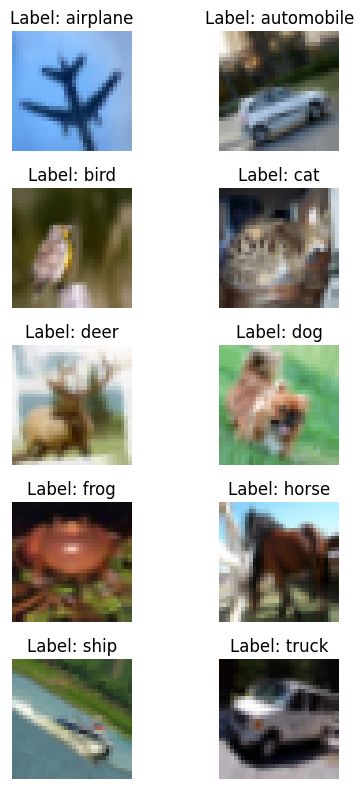

In [ ]:
import matplotlib.pyplot as plt
visual = datagen.flow_from_directory(
    augmented_dir,
    target_size=IMG_SIZE,
    batch_size=64,
    class_mode="sparse",
    shuffle=True
)
images, labels = next(visual)
unique_classes = np.unique(labels)

plt.figure(figsize=(5, 8))
for i, class_label in enumerate(unique_classes[:10]):
    class_indices = np.where(labels == class_label)[0]
    image_idx = class_indices[0]

    plt.subplot(5, 2, i + 1)
    plt.imshow(images[image_idx])
    plt.axis("off")
    plt.title(f"Label: {class_mapping[int(class_label)]}")

plt.tight_layout()
plt.show()


In [ ]:
# Create a generator that combines both generators

train_generator = ImageDataGenerator(rescale=1.0/255).flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=32,  # Larger batches
    class_mode="sparse",
    shuffle=True
)
# Rotations
augmented_generator = ImageDataGenerator(rescale=1.0/255).flow_from_directory(
    augmented_dir,
    target_size=(32, 32),
    batch_size=32,  # Larger batches
    class_mode="sparse",
    shuffle=True
)
valid_generator = ImageDataGenerator(rescale=1.0/255).flow_from_directory(
    valid_dir,
    target_size=(32, 32),
    batch_size=32,  # Larger batches
    class_mode="sparse",
    shuffle=True
)

def combined_generator(gen1, gen2):
    while True:
        # Combine batches from both generators
        x1, y1 = next(gen1)
        x2, y2 = next(gen2)

        # Concatenate the images and labels
        yield (np.concatenate([x1, x2]), np.concatenate([y1, y2]))

# Use combined generator
train_generator_50_50_rotation = combined_generator(train_generator, augmented_generator)

Found 90000 images belonging to 10 classes.
Found 90000 images belonging to 10 classes.
Found 90000 images belonging to 10 classes.


In [ ]:
print(f"Train set: {train_generator.samples} images")
print(f"Augmentation set: {augmented_generator.samples} images")
print(f"Validation set: {valid_generator.samples} images")

Train set: 90000 images
Augmentation set: 90000 images
Validation set: 90000 images


In [ ]:
EPOCHS = 10 # malo narazie
# Define steps per epoch
steps_per_epoch = (train_generator.samples+augmented_generator.samples) // 32  # Ensure batch_size=32
validation_steps = valid_generator.samples // 32

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(0.001, decay_steps=10000, decay_rate=0.9) # troche opoznienia w uczeniu
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
armata.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = armata.fit(
    train_generator_50_50_rotation,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=validation_steps,
    epochs=EPOCHS
)

Epoch 1/10
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 0.3944 - loss: 1.7381

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5625/5625 ━━━━━━━━━━━━━━━━━━━━ 1463s 259ms/step - accuracy: 0.3944 - loss: 1.7380 - val_accuracy: 0.5841 - val_loss: 1.1516
Epoch 2/10
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 1436s 255ms/step - accuracy: 0.5742 - loss: 1.1898 - val_accuracy: 0.6342 - val_loss: 1.0181
Epoch 3/10
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 1454s 259ms/step - accuracy: 0.6184 - loss: 1.0731 - val_accuracy: 0.6334 - val_loss: 1.0083
Epoch 4/10
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 1405s 250ms/step - accuracy: 0.6455 - loss: 0.9996 - val_accuracy: 0.6368 - val_loss: 1.0160
Epoch 5/10
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 1432s 255ms/step - accuracy: 0.6600 - loss: 0.9591 - val_accuracy: 0.6747 - val_loss: 0.9155
Epoch 6/10
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 1427s 254ms/step - accuracy: 0.6740 - loss: 0.9204 - val_accuracy: 0.6778 - val_loss: 0.8928
Epoch 7/10
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 1529s 272ms/step - accuracy: 0.6843 - loss: 0.8888 - val_accuracy: 0.6892 - val_loss: 0.8652
Epoch 8/10
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 1453s 258ms/step - accur

In [ ]:
armata.save("rotation_model.h5")

#### 5.9.1) Performance of the rotation model on test sample

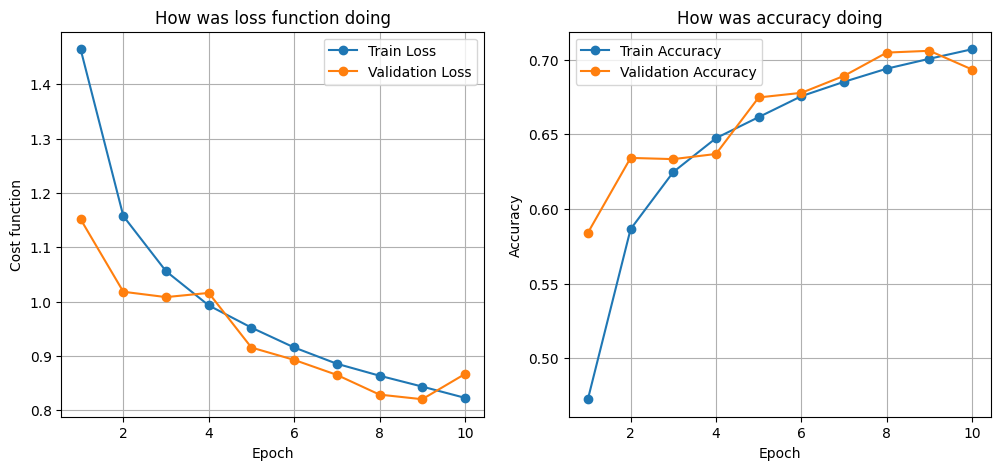

Found 90000 images belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2813/2813 ━━━━━━━━━━━━━━━━━━━━ 115s 41ms/step - accuracy: 0.6891 - loss: 0.8809
Test Loss: 0.8773
Test Accuracy: 0.6902
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 107s 38ms/step


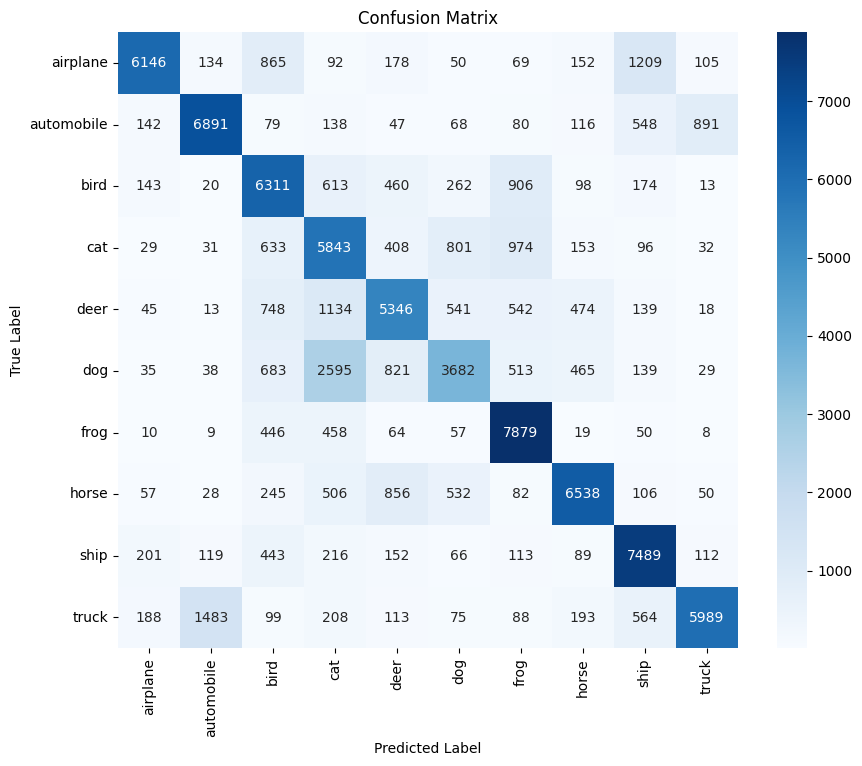

Classification Report:
              precision    recall  f1-score   support

    airplane       0.88      0.68      0.77      9000
  automobile       0.79      0.77      0.78      9000
        bird       0.60      0.70      0.65      9000
         cat       0.50      0.65      0.56      9000
        deer       0.63      0.59      0.61      9000
         dog       0.60      0.41      0.49      9000
        frog       0.70      0.88      0.78      9000
       horse       0.79      0.73      0.76      9000
        ship       0.71      0.83      0.77      9000
       truck       0.83      0.67      0.74      9000

    accuracy                           0.69     90000
   macro avg       0.70      0.69      0.69     90000
weighted avg       0.70      0.69      0.69     90000



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Pobranie historii uczenia
loss = history.history["loss"]
val_loss = history.history["val_loss"]
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
epochs_range = range(1, len(loss) + 1)

# Wykres funkcji kosztu
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, label="Train Loss", marker="o")
plt.plot(epochs_range, val_loss, label="Validation Loss", marker="o")
plt.xlabel("Epoch")
plt.ylabel("Cost function")
plt.title("How was loss function doing")
plt.legend()
plt.grid(True)

# Wykres dokładności
plt.subplot(1, 2, 2)
plt.plot(epochs_range, accuracy, label="Train Accuracy", marker="o")
plt.plot(epochs_range, val_accuracy, label="Validation Accuracy", marker="o")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("How was accuracy doing")
plt.legend()
plt.grid(True)
plt.show()

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator_full = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32,32),
    batch_size=32,
    class_mode="sparse",
    shuffle=False  # Ustawiamy shuffle=False, aby kolejność etykiet była poprawna
)
test_loss, test_accuracy = armata.evaluate(test_generator_full)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generowanie predykcji
predictions = armata.predict(test_generator_full)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator_full.classes
class_labels = list(test_generator_full.class_indices.keys())

# Macierz pomyłek (Confusion Matrix)
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Klasyfikacyjny raport
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

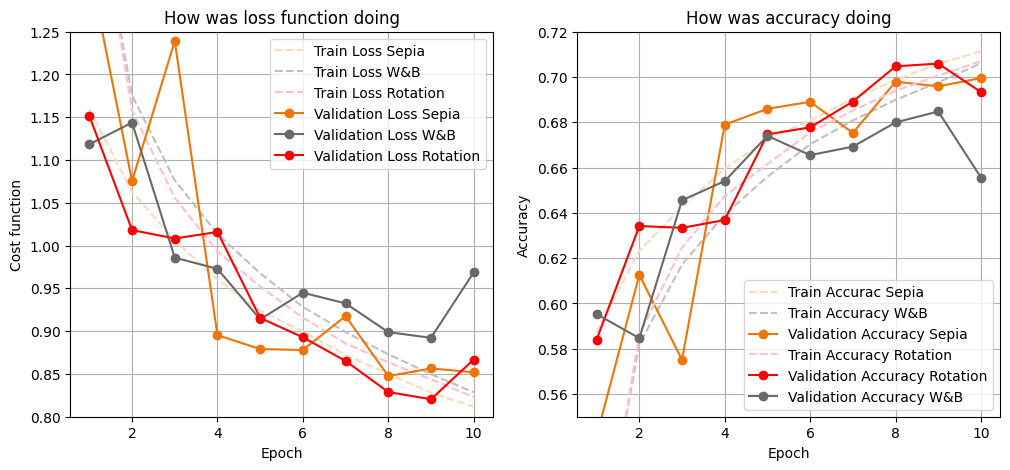

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Pobranie historii uczenia
loss_sepia = history_sepia["loss"]
val_loss_sepia = history_sepia["val_loss"]
accuracy_sepia = history_sepia["accuracy"]
val_accuracy_sepia = history_sepia["val_accuracy"]

loss_WB = history_WB["loss"]
val_loss_WB = history_WB["val_loss"]
accuracy_WB = history_WB["accuracy"]
val_accuracy_WB = history_WB["val_accuracy"]

loss_rotation = history_rotation["loss"]
val_loss_rotation = history_rotation["val_loss"]
accuracy_rotation = history_rotation["accuracy"]
val_accuracy_rotation = history_rotation["val_accuracy"]
epochs_range = range(1, len(loss_WB) + 1)

# Wykres funkcji kosztu
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss_sepia, label="Train Loss Sepia", linestyle = '--', color = 'peachpuff')
plt.plot(epochs_range, loss_WB, label="Train Loss W&B", linestyle = '--', color = 'silver')
plt.plot(epochs_range, loss_rotation, label="Train Loss Rotation", linestyle = '--', color = 'pink')
plt.plot(epochs_range, val_loss_sepia, label="Validation Loss Sepia", marker="o", color = '#f07407')
plt.plot(epochs_range, val_loss_WB, label="Validation Loss W&B", marker="o", color = 'dimgrey')
plt.plot(epochs_range, val_loss_rotation, label="Validation Loss Rotation", marker="o", color = 'red')
plt.xlabel("Epoch")
plt.ylim(0.8,1.25)
plt.ylabel("Cost function")
plt.title("How was loss function doing")
plt.legend()
plt.grid(True)

# Wykres dokładności
plt.subplot(1, 2, 2)
plt.plot(epochs_range, accuracy_sepia, label="Train Accurac Sepia", linestyle = '--', color = 'peachpuff')
plt.plot(epochs_range, accuracy_WB, label="Train Accuracy W&B", linestyle = '--', color = 'silver')
plt.plot(epochs_range, val_accuracy_sepia, label="Validation Accuracy Sepia", marker="o", color = '#f07407')
plt.plot(epochs_range, accuracy_rotation, label="Train Accuracy Rotation", linestyle = '--', color = 'pink')
plt.plot(epochs_range, val_accuracy_rotation, label="Validation Accuracy Rotation", marker="o", color = 'red')
plt.plot(epochs_range, val_accuracy_WB, label="Validation Accuracy W&B", marker="o", color = 'dimgrey')
plt.xlabel("Epoch")
plt.ylim(0.55,0.72)
plt.ylabel("Accuracy")
plt.title("How was accuracy doing")
plt.legend()
plt.grid(True)
plt.show()


### 5.10) Horizontal flip

In [ ]:
import os
import numpy as np
import shutil
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img

# Rozmiar obrazka
IMG_SIZE = (32, 32)

# Usuwanie starego katalogu augmentacji, jeśli istnieje
shutil.rmtree(os.path.join(os.path.dirname(path), "augmented_dir2"), ignore_errors=True)
augmented_dir2 = os.path.join(os.path.dirname(path), "augmented_dir2")
os.makedirs(augmented_dir2, exist_ok=True)

# Przetwarzanie wszystkich obrazów w train_dir i wymuszenie ich odwrócenia
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    augmented_class_path = os.path.join(augmented_dir2, class_name)

    if not os.path.isdir(class_path):
        continue

    os.makedirs(augmented_class_path, exist_ok=True)

    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = load_img(img_path, target_size=IMG_SIZE)  # Wczytaj i przeskaluj
        img_array = img_to_array(img)  # Zamiana na tablicę NumPy

        # Wymuszenie odwrócenia (flip)
        flipped_img_array = np.fliplr(img_array)  # Odbicie lustrzane w poziomie

        # Konwersja z powrotem do obrazu
        flipped_img = array_to_img(flipped_img_array)
        flipped_img.save(os.path.join(augmented_class_path, f"aug_{img_name}"))

print("Augmentacja zakończona. Wszystkie obrazy zostały odwrócone i zapisane w:", augmented_dir2)

Augmentacja zakończona. Wszystkie obrazy zostały odwrócone i zapisane w: /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/augmented_dir2


Found 90000 images belonging to 10 classes.


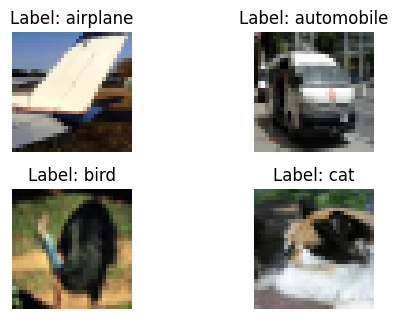

Found 90000 images belonging to 10 classes.


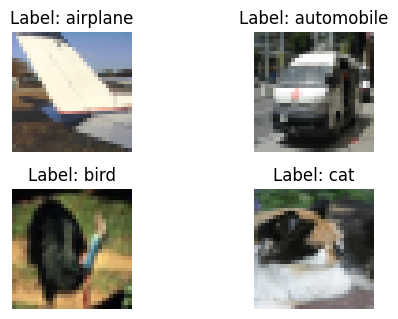

In [ ]:
import matplotlib.pyplot as plt
visual = datagen.flow_from_directory(
    augmented_dir2,
    target_size=IMG_SIZE,
    batch_size=64,
    class_mode="sparse",
    shuffle=True
)
np.random.seed(52)
images, labels = next(visual)
unique_classes = np.unique(labels)

plt.figure(figsize=(5, 8))
for i, class_label in enumerate(unique_classes[:4]):
    # Znalezienie indeksów obrazów dla danej klasy
    class_indices = np.where(labels == class_label)[0]
    image_idx = class_indices[0]  # Bierzemy pierwszy obrazek z danej klasy

    plt.subplot(5, 2, i + 1)
    plt.imshow(images[image_idx])
    plt.axis("off")
    plt.title(f"Label: {class_mapping[int(class_label)]}")

plt.tight_layout()
plt.show()

visual = datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=64,
    class_mode="sparse",
    shuffle=True
)
np.random.seed(52)
images, labels = next(visual)
unique_classes = np.unique(labels)

plt.figure(figsize=(5, 8))
for i, class_label in enumerate(unique_classes[:4]):
    # Znalezienie indeksów obrazów dla danej klasy
    class_indices = np.where(labels == class_label)[0]
    image_idx = class_indices[0]  # Bierzemy pierwszy obrazek z danej klasy

    plt.subplot(5, 2, i + 1)
    plt.imshow(images[image_idx])
    plt.axis("off")
    plt.title(f"Label: {class_mapping[int(class_label)]}")

plt.tight_layout()
plt.show()



In [ ]:
# Create a generator that combines both generators

train_generator = ImageDataGenerator(rescale=1.0/255).flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=32,  # Larger batches
    class_mode="sparse",
    shuffle=True
)
# Rotations
augmented_generator = ImageDataGenerator(rescale=1.0/255).flow_from_directory(
    augmented_dir2,
    target_size=(32, 32),
    batch_size=32,  # Larger batches
    class_mode="sparse",
    shuffle=True
)
valid_generator = ImageDataGenerator(rescale=1.0/255).flow_from_directory(
    valid_dir,
    target_size=(32, 32),
    batch_size=32,  # Larger batches
    class_mode="sparse",
    shuffle=True
)

def combined_generator(gen1, gen2):
    while True:
        # Combine batches from both generators
        x1, y1 = next(gen1)
        x2, y2 = next(gen2)

        # Concatenate the images and labels
        yield (np.concatenate([x1, x2]), np.concatenate([y1, y2]))

# Use combined generator
train_generator_50_50_horizontal_flip = combined_generator(train_generator, augmented_generator)

Found 90000 images belonging to 10 classes.
Found 90000 images belonging to 10 classes.
Found 90000 images belonging to 10 classes.


In [ ]:
EPOCHS = 10 # malo narazie
# Define steps per epoch
steps_per_epoch = (train_generator.samples+augmented_generator.samples) // 32  # Ensure batch_size=32
validation_steps = valid_generator.samples // 32

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(0.001, decay_steps=10000, decay_rate=0.9) # troche opoznienia w uczeniu
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
armata.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = armata.fit(
    train_generator_50_50_horizontal_flip,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=validation_steps,
    epochs=EPOCHS
)

Epoch 1/10
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.4087 - loss: 1.6945

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5625/5625 ━━━━━━━━━━━━━━━━━━━━ 1039s 183ms/step - accuracy: 0.4087 - loss: 1.6944 - val_accuracy: 0.5938 - val_loss: 1.1240
Epoch 2/10
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 912s 162ms/step - accuracy: 0.5896 - loss: 1.1442 - val_accuracy: 0.6236 - val_loss: 1.0495
Epoch 3/10
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 917s 163ms/step - accuracy: 0.6328 - loss: 1.0304 - val_accuracy: 0.6365 - val_loss: 1.0073
Epoch 4/10
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 920s 164ms/step - accuracy: 0.6564 - loss: 0.9676 - val_accuracy: 0.6934 - val_loss: 0.8520
Epoch 5/10
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 922s 164ms/step - accuracy: 0.6698 - loss: 0.9279 - val_accuracy: 0.7000 - val_loss: 0.8388
Epoch 6/10
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 926s 165ms/step - accuracy: 0.6821 - loss: 0.8920 - val_accuracy: 0.6895 - val_loss: 0.8805
Epoch 7/10
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 899s 160ms/step - accuracy: 0.6905 - loss: 0.8697 - val_accuracy: 0.6855 - val_loss: 0.8832
Epoch 8/10
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 908s 161ms/step - accuracy: 0.

In [ ]:
armata.save("flip_model.h5")

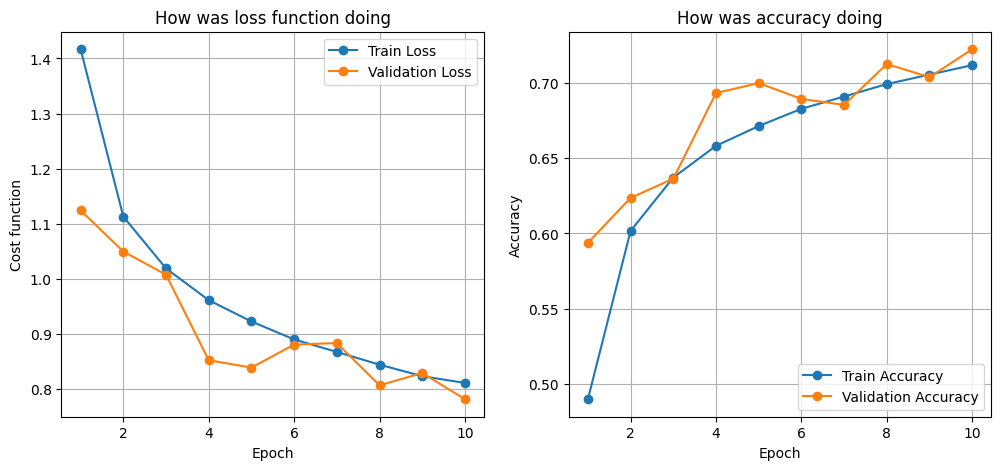

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Pobranie historii uczenia
loss = history.history["loss"]
val_loss = history.history["val_loss"]
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
epochs_range = range(1, len(loss) + 1)

# Wykres funkcji kosztu
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, label="Train Loss", marker="o")
plt.plot(epochs_range, val_loss, label="Validation Loss", marker="o")
plt.xlabel("Epoch")
plt.ylabel("Cost function")
plt.title("How was loss function doing")
plt.legend()
plt.grid(True)

# Wykres dokładności
plt.subplot(1, 2, 2)
plt.plot(epochs_range, accuracy, label="Train Accuracy", marker="o")
plt.plot(epochs_range, val_accuracy, label="Validation Accuracy", marker="o")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("How was accuracy doing")
plt.legend()
plt.grid(True)
plt.show()

wszystkie zapisane jsony zapisane:

In [ ]:
history_sepia = {'accuracy': [0.5872550010681152,0.6232913732528687,0.642850399017334,0.6595450043678284,0.6724834442138672,0.6808738112449646,0.6904977560043335,0.6985880732536316,0.7058921456336975,0.7113569974899292],
                'loss': [1.1596105098724365,1.062925100326538,1.0059512853622437,0.960252583026886,0.9241764545440674,0.8996021747589111,0.8723334670066833,0.8502260446548462,0.8279759287834167,0.8117557764053345],
                'val_accuracy': [0.5414962768554688,0.6125978231430054,0.5751133561134338,0.6789873838424683,0.685955286026001,0.689055860042572,0.6752867102622986,0.6979240775108337,0.6958792805671692,0.6995243430137634],
                'val_loss': [1.3257001638412476,1.0753668546676636,1.239234447479248,0.8953501582145691,0.8790901303291321,0.8779895305633545,0.9176378846168518,0.8474626541137695,0.8564346432685852,0.8519105911254883]}

history_WB = {'loss': [1.4505743980407715,1.1754820346832275,1.076340913772583,1.0135061740875244,0.9676586389541626,0.928391695022583,0.8989440202713013,0.8730515837669373,0.8497304320335388,0.82856684923172],
              'val_loss': [1.1184134483337402,1.1438136100769043,0.9859228730201721,0.9728092551231384,0.9138497114181519,0.9449723958969116,0.9324795603752136,0.8988525867462158,0.8922210931777954,0.968631386756897],
              'accuracy': [0.4785267412662506,0.5820062160491943,0.6172041893005371,0.6393303275108337,0.6559332609176636,0.6702941656112671,0.6808071732521057,0.689914345741272,0.6976184844970703,0.7060116529464722],
              'val_accuracy': [0.595294713973999,0.5846817493438721,0.6455814242362976,0.6540274024009705,0.6740309596061707,0.6655071973800659,0.669252336025238,0.6799430847167969,0.6847884058952332,0.6556165814399719]}

history_flip = {'loss': [1.4167433977127075, 1.1128206253051758, 1.0187240839004517, 0.9611335396766663, 0.9224309325218201, 0.8897950053215027, 0.8672003746032715, 0.844059407711029, 0.8231492638587952, 0.8108878135681152],
                'val_loss': [1.1240019798278809, 1.049460530281067, 1.0073236227035522, 0.8520051836967468, 0.8387865424156189, 0.8804587721824646, 0.8832002282142639, 0.8065651059150696, 0.8288500308990479, 0.7812973856925964],
                'accuracy': [0.48969075083732605, 0.6016847491264343, 0.6371660232543945, 0.6582781672477722, 0.6714332699775696, 0.6829186081886292, 0.691092312335968, 0.6993659734725952, 0.7056726813316345, 0.7119460105895996],
                'val_accuracy': [0.5937944650650024, 0.6236220002174377, 0.6364687085151672, 0.693401038646698, 0.700024425983429, 0.6894892454147339, 0.6855218410491943, 0.7127044796943665, 0.7039473652839661, 0.722561776638031]}

history_rotation = {'loss': [1.464458703994751, 1.1574454307556152, 1.0559356212615967, 0.9930256605148315, 0.9521277546882629, 0.9156501293182373, 0.8856691122055054, 0.8636778593063354, 0.8436439633369446, 0.8229485750198364],
                      'val_loss': [1.1515921354293823, 1.018144130706787, 1.008287787437439, 1.0160012245178223, 0.9154686331748962, 0.8927983641624451, 0.8651762008666992, 0.8288770318031311, 0.820383608341217, 0.8667461276054382],
                      'accuracy': [0.47263646125793457, 0.5865098237991333, 0.6247555017471313, 0.647426187992096, 0.661523163318634, 0.6755312085151672, 0.6851717829704285, 0.6939594745635986, 0.7006078958511353, 0.706978440284729],
                      'val_accuracy': [0.5840705037117004, 0.6342016458511353, 0.6334015130996704, 0.6368465423583984, 0.6746866106987, 0.677776038646698, 0.6891558766365051, 0.7047252655029297, 0.7059255242347717, 0.6933677196502686]}


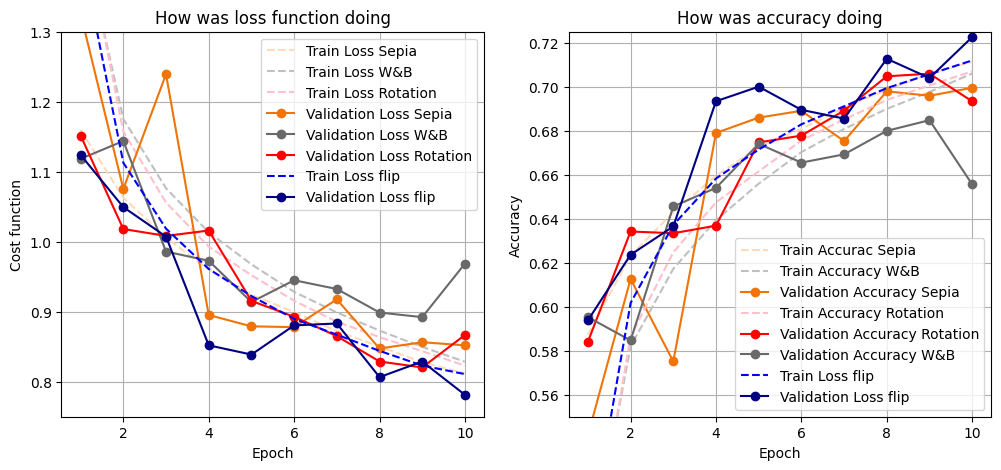

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Pobranie historii uczenia
loss_flip = history.history["loss"]
val_loss_flip = history.history["val_loss"]
accuracy_flip = history.history["accuracy"]
val_accuracy_flip = history.history["val_accuracy"]

loss_sepia = history_sepia["loss"]
val_loss_sepia = history_sepia["val_loss"]
accuracy_sepia = history_sepia["accuracy"]
val_accuracy_sepia = history_sepia["val_accuracy"]

loss_WB = history_WB["loss"]
val_loss_WB = history_WB["val_loss"]
accuracy_WB = history_WB["accuracy"]
val_accuracy_WB = history_WB["val_accuracy"]

loss_rotation = history_rotation["loss"]
val_loss_rotation = history_rotation["val_loss"]
accuracy_rotation = history_rotation["accuracy"]
val_accuracy_rotation = history_rotation["val_accuracy"]
epochs_range = range(1, len(loss_WB) + 1)

# Wykres funkcji kosztu
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss_sepia, label="Train Loss Sepia", linestyle = '--', color = 'peachpuff')
plt.plot(epochs_range, loss_WB, label="Train Loss W&B", linestyle = '--', color = 'silver')
plt.plot(epochs_range, loss_rotation, label="Train Loss Rotation", linestyle = '--', color = 'pink')
plt.plot(epochs_range, val_loss_sepia, label="Validation Loss Sepia", marker="o", color = '#f07407')
plt.plot(epochs_range, val_loss_WB, label="Validation Loss W&B", marker="o", color = 'dimgrey')
plt.plot(epochs_range, val_loss_rotation, label="Validation Loss Rotation", marker="o", color = 'red')
plt.plot(epochs_range, loss_flip, label="Train Loss flip", linestyle = '--', color = 'blue')
plt.plot(epochs_range, val_loss_flip, label="Validation Loss flip", marker="o", color = 'navy')
plt.xlabel("Epoch")
plt.ylim(0.75,1.3)
plt.ylabel("Cost function")
plt.title("How was loss function doing")
plt.legend()
plt.grid(True)

# Wykres dokładności
plt.subplot(1, 2, 2)
plt.plot(epochs_range, accuracy_sepia, label="Train Accurac Sepia", linestyle = '--', color = 'peachpuff')
plt.plot(epochs_range, accuracy_WB, label="Train Accuracy W&B", linestyle = '--', color = 'silver')
plt.plot(epochs_range, val_accuracy_sepia, label="Validation Accuracy Sepia", marker="o", color = '#f07407')
plt.plot(epochs_range, accuracy_rotation, label="Train Accuracy Rotation", linestyle = '--', color = 'pink')
plt.plot(epochs_range, val_accuracy_rotation, label="Validation Accuracy Rotation", marker="o", color = 'red')
plt.plot(epochs_range, val_accuracy_WB, label="Validation Accuracy W&B", marker="o", color = 'dimgrey')
plt.plot(epochs_range, accuracy_flip, label="Train Loss flip", linestyle = '--', color = 'blue')
plt.plot(epochs_range, val_accuracy_flip, label="Validation Loss flip", marker="o", color = 'navy')
plt.xlabel("Epoch")
plt.ylim(0.55,0.725)
plt.ylabel("Accuracy")
plt.title("How was accuracy doing")
plt.legend()
plt.grid(True)
plt.show()


## 6) Final combined training dataset (original + augmented photos)

# 4 copies of each image:​

- Random angle 0°  - 20° ​

- Flip – 50% chance​

- Sepia – 50% chance​

- Sobel – 30% chance​

- W&B – 25% chance​

- Crop – 20% chance​

- Strech – 20% chance​

- Gaussian Noise – None​

Eventually the training set contained 450k images

In [ ]:
import os
import numpy as np
import shutil
import cv2
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img

IMG_SIZE = (32, 32)
shutil.rmtree(os.path.join(os.path.dirname(path), "augmented_dir"), ignore_errors=True)
augmented_dir = os.path.join(os.path.dirname(path), "augmented_dir")
os.makedirs(augmented_dir, exist_ok=True)

# Efekt Sepia
def apply_sobel(image):
    """ Wykrywanie krawędzi za pomocą filtra Sobela """
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    sobel_combined = cv2.magnitude(sobelx, sobely)

    # Normalizacja wartości do przedziału [0, 255]
    sobel_combined = np.uint8(255 * sobel_combined / np.max(sobel_combined))

    # Konwersja do RGB (powielenie kanału)
    sobel_combined = cv2.cvtColor(sobel_combined, cv2.COLOR_GRAY2RGB)
    return sobel_combined


# Gaussian Noise
def add_gaussian_noise(image):
    """ Dodaje subtelny szum Gaussa do obrazu """
    mean = 0
    stddev = 1  # intensywność szumu (zmiejszylem z 10 do 1)
    noise = np.random.normal(mean, stddev, image.shape).astype(np.uint8)
    noisy_image = cv2.add(image, noise)
    return np.clip(noisy_image, 0, 255)


# Obrót obrazu o dany kąt
def rotate_image(image, angle):
    """ Obraca obraz o dany kąt """
    h, w = image.shape[:2]
    center = (w // 2, h // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h), borderMode=cv2.BORDER_REFLECT)
    return rotated_image

# Konwersja na sepię
def to_sepia(image):
    """ Zmienia obraz na sepię """
    sepia_filter = np.array([[0.393, 0.769, 0.189],
                             [0.349, 0.686, 0.168],
                             [0.272, 0.534, 0.131]])
    sepia_image = cv2.transform(image, sepia_filter)
    return np.clip(sepia_image, 0, 255).astype(np.uint8)

# Konwersja na czarno-biały
def to_grayscale(image):
    """ Zmienia obraz na czarno-biały """
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    gray_rgb = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)  # Konwersja do formatu RGB
    return gray_rgb

# Crop obrazu
def crop_image(image):
    """ Przycinanie obrazu (crop) """
    h, w = image.shape[:2]
    crop_size = np.random.randint(24, 32)  # Losowy rozmiar
    x = np.random.randint(0, w - crop_size)
    y = np.random.randint(0, h - crop_size)
    cropped = image[y:y+crop_size, x:x+crop_size]
    return cv2.resize(cropped, (w, h))

# Stretch obrazu
def stretch_image(image):
    """ Rozciąganie obrazu (stretch) """
    h, w = image.shape[:2]
    stretch_factor = np.random.uniform(1.0, 1.5)
    stretched = cv2.resize(image, (int(w * stretch_factor), h))
    return cv2.resize(stretched, (w, h))


# 🔹 Tworzenie augmentowanych obrazów
def create_augmented_dir(train_dir, destination_dir):
    for class_name in os.listdir(train_dir):
        class_path = os.path.join(train_dir, class_name)
        augmented_class_path = os.path.join(destination_dir, class_name)

        if not os.path.isdir(class_path):
            continue

        os.makedirs(augmented_class_path, exist_ok=True)

        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = load_img(img_path, target_size=IMG_SIZE)
            img_array = img_to_array(img).astype(np.uint8)

            for i in range(4):  # 4 różne kopie obrazu
                augmented = img_array

                # 1️⃣ Obrót o losowy kąt (0° - 20°)
                angle = np.random.uniform(0, 20)
                augmented = rotate_image(augmented, angle)

                # 2️⃣ Losowe odbicie lustrzane (50% szans)
                if np.random.rand() > 0.5:
                    augmented = np.fliplr(augmented)

                # 3️⃣ Losowy wybór efektu kolorystycznego
                if np.random.rand() < 0.5:
                    augmented = to_sepia(augmented)  # 50% na Sepia
                elif np.random.rand() < 0.5:
                    augmented = to_grayscale(augmented)  # 25% na grayscale

                # 4️⃣ Gaussian Noise (10% szans) - narazie usunalem bo podejrzewam slaby wplyw
                #if np.random.rand() < 0.001:
                #    augmented = add_gaussian_noise(augmented)

                # 5️⃣ Sobel Filter (30% szans)
                if np.random.rand() < 0.3:
                    augmented = apply_sobel(augmented)

                # 6️⃣ Losowy Crop (30% szans) lub Stretch (15% szans) # zwiększyłem
                if np.random.rand() < 0.3:
                    augmented = crop_image(augmented)
                elif np.random.rand() < 0.5:
                    augmented = stretch_image(augmented)

                # Zapis obrazka
                augmented_img = array_to_img(augmented)
                augmented_img.save(os.path.join(augmented_class_path, f"aug_{i}_{img_name}"))

    return destination_dir

print("Augmentacja zakończona! Obrazy zapisane w:", create_augmented_dir(train_dir, augmented_dir))


Augmentacja zakończona! Obrazy zapisane w: /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/augmented_dir


Found 360000 images belonging to 10 classes.


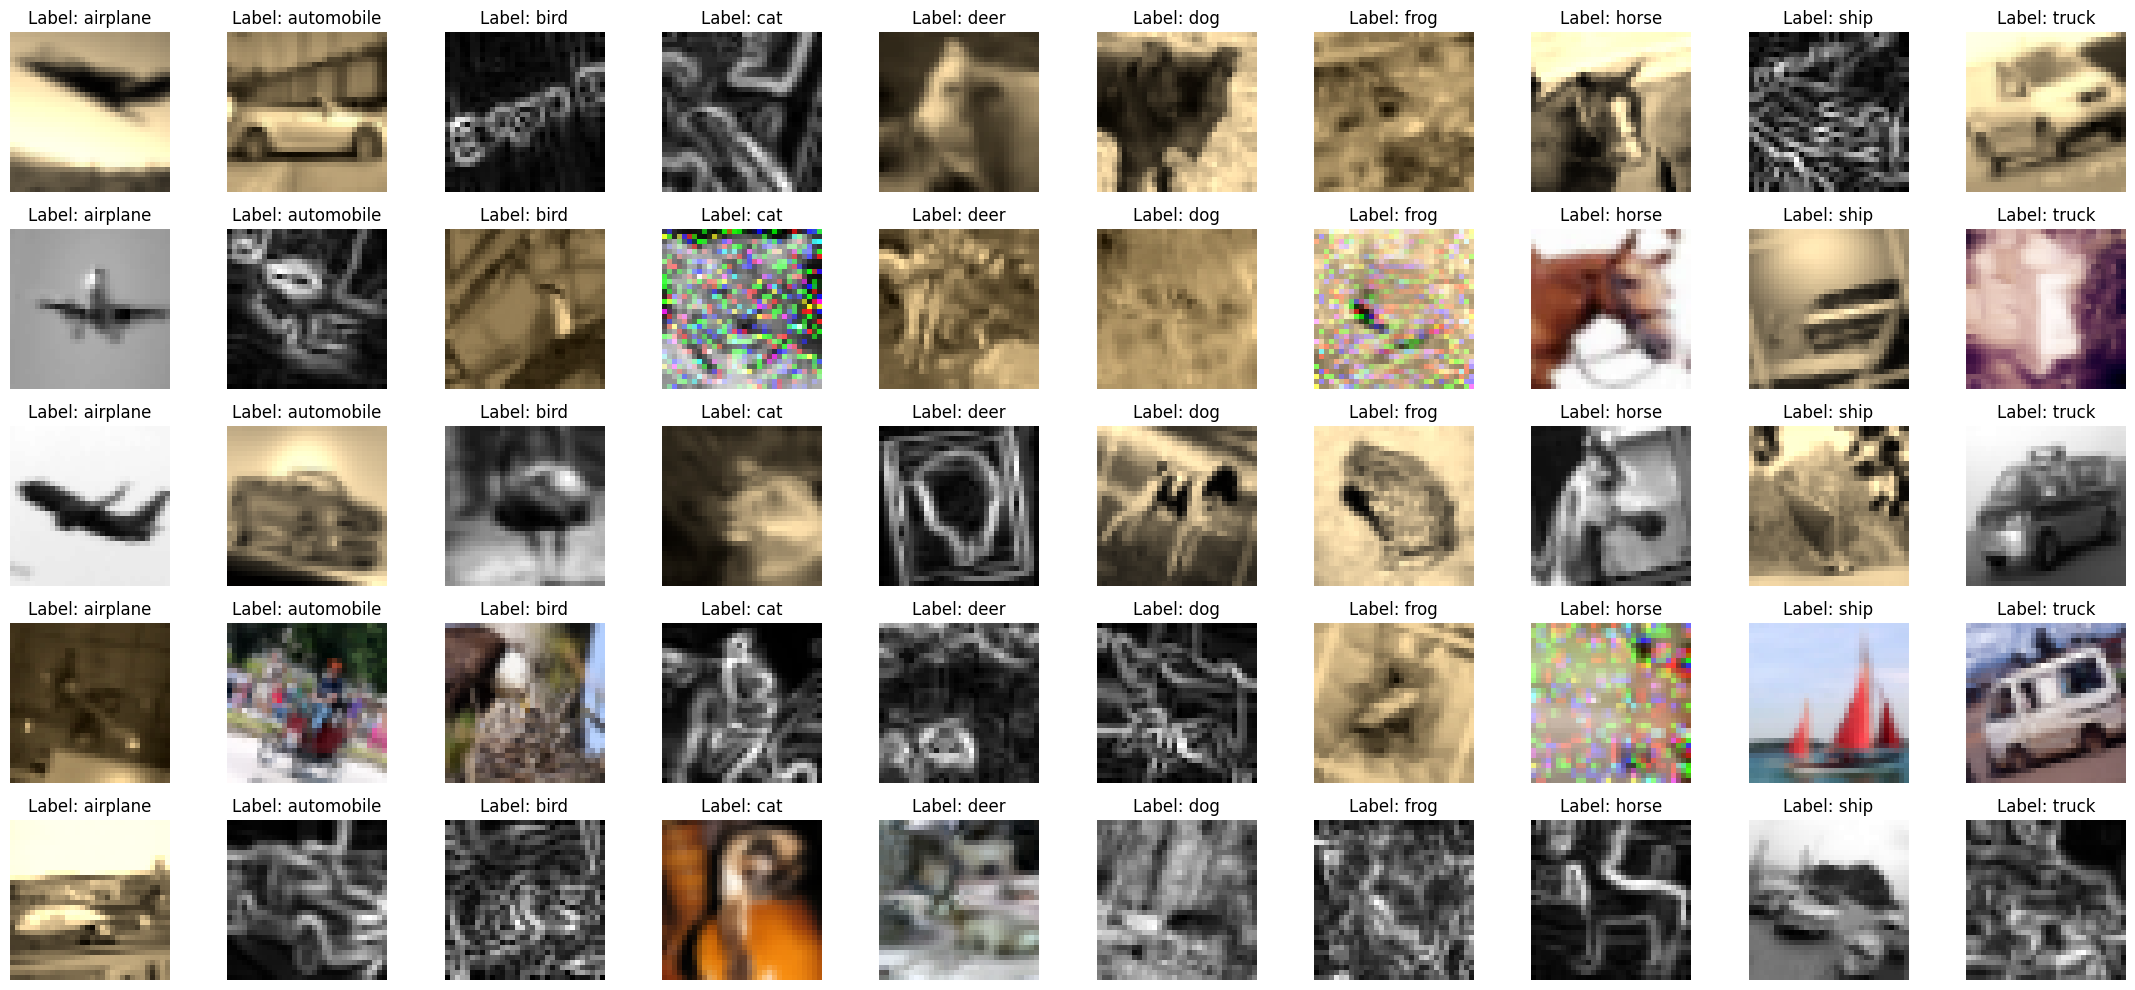

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
datagen = ImageDataGenerator(rescale=1.0/255)
class_mapping = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

visual = datagen.flow_from_directory(
    augmented_dir,
    target_size=IMG_SIZE,
    batch_size=128,
    class_mode="sparse",
    shuffle=True
)

plt.figure(figsize=(22, 10))

for j in range(5):  # 5 iteracji - różne obrazy
    images, labels = next(visual)  # Pobierz nową porcję obrazów
    unique_classes = np.unique(labels)

    for i, class_label in enumerate(unique_classes[:10]):
        # Znalezienie indeksów obrazów dla danej klasy
        class_indices = np.where(labels == class_label)[0]
        # Losowy wybór obrazka z danej klasy
        image_idx = np.random.choice(class_indices)

        plt.subplot(5, 10, j * 10 + i + 1)  # Układ 5x10
        img = images[image_idx]

        # Upewnij się, że obraz ma zakres [0, 255] przed wyświetleniem
        if img.max() <= 1.0:
            img = (img * 255).astype("uint8")

        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Label: {class_mapping[int(class_label)]}")

plt.tight_layout()
plt.show()


#### 6.1) Training Deep CNN with final dataset

In [ ]:
# Create a generator that combines both generators

train_generator = ImageDataGenerator(rescale=1.0/255).flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=128,  # dalem wiekszy batch size
    class_mode="sparse",
    shuffle=True
)
# mixed augmentation methods
augmented_generator = ImageDataGenerator(rescale=1.0/255).flow_from_directory(
    augmented_dir,
    target_size=(32, 32),
    batch_size=128,
    class_mode="sparse",
    shuffle=True
)
valid_generator = ImageDataGenerator(rescale=1.0/255).flow_from_directory(
    valid_dir,
    target_size=(32, 32),
    batch_size=128,
    class_mode="sparse",
    shuffle=True
)

def combined_generator(gen1, gen2):
    while True:
        # Combine batches from both generators
        x1, y1 = next(gen1)
        x2, y2 = next(gen2)

        # Concatenate the images and labels
        yield (np.concatenate([x1, x2]), np.concatenate([y1, y2]))

# Use combined generator
train_generator_50_50_all_version_bigger = combined_generator(train_generator, augmented_generator)

Found 90000 images belonging to 10 classes.
Found 360000 images belonging to 10 classes.
Found 90000 images belonging to 10 classes.


In [ ]:
EPOCHS = 20

# Define steps per epoch
steps_per_epoch = (train_generator.samples+augmented_generator.samples) // 128  # Ensure batch_size=128
validation_steps = valid_generator.samples // 128

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(0.001, decay_steps=10000, decay_rate=0.9) # troche opoznienia w uczeniu
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
armata.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = armata.fit(
    train_generator_50_50_all_version_bigger,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=validation_steps,
    epochs=EPOCHS
)

Epoch 1/20
3515/3515 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3568 - loss: 1.8653

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3515/3515 ━━━━━━━━━━━━━━━━━━━━ 3865s 1s/step - accuracy: 0.3569 - loss: 1.8652 - val_accuracy: 0.5991 - val_loss: 1.1037
Epoch 2/20
3515/3515 ━━━━━━━━━━━━━━━━━━━━ 3859s 1s/step - accuracy: 0.5189 - loss: 1.3454 - val_accuracy: 0.6359 - val_loss: 1.0000
Epoch 3/20
3515/3515 ━━━━━━━━━━━━━━━━━━━━ 3756s 1s/step - accuracy: 0.5547 - loss: 1.2475 - val_accuracy: 0.5727 - val_loss: 1.2205
Epoch 4/20
3515/3515 ━━━━━━━━━━━━━━━━━━━━ 3741s 1s/step - accuracy: 0.5743 - loss: 1.1964 - val_accuracy: 0.6917 - val_loss: 0.8602
Epoch 5/20
3515/3515 ━━━━━━━━━━━━━━━━━━━━ 3802s 1s/step - accuracy: 0.5885 - loss: 1.1567 - val_accuracy: 0.6904 - val_loss: 0.8696
Epoch 6/20
3515/3515 ━━━━━━━━━━━━━━━━━━━━ 3744s 1s/step - accuracy: 0.5978 - loss: 1.1296 - val_accuracy: 0.6984 - val_loss: 0.8503
Epoch 7/20
3515/3515 ━━━━━━━━━━━━━━━━━━━━ 3805s 1s/step - accuracy: 0.6050 - loss: 1.1103 - val_accuracy: 0.6895 - val_loss: 0.8755
Epoch 8/20
3515/3515 ━━━━━━━━━━━━━━━━━━━━ 3718s 1s/step - accuracy: 0.6116 - loss: 1.09

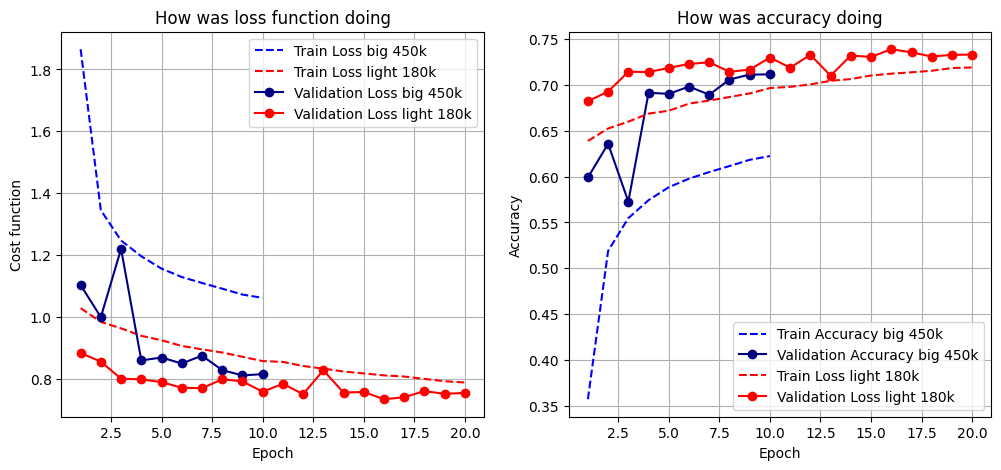

In [ ]:
import matplotlib.pyplot as plt
epochs_range = range(1, len(data) + 1)
loss = [entry["loss"] for entry in data_v2] + [None] * 10
val_loss = [entry["val_loss"] for entry in data_v2] + [None] * 10
accuracy = [entry["accuracy"] for entry in data_v2] + [None] * 10
val_accuracy = [entry["val_accuracy"] for entry in data_v2] + [None] * 10

loss_previus = [entry["loss"] for entry in data]
val_loss_previus = [entry["val_loss"] for entry in data]
accuracy_previus = [entry["accuracy"] for entry in data]
val_accuracy_previus = [entry["val_accuracy"] for entry in data]

# Wykres funkcji kosztu
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, label="Train Loss big 450k", linestyle = '--', color="blue")
plt.plot(epochs_range, loss_previus, label="Train Loss light 180k", linestyle = '--', color="red")
plt.plot(epochs_range, val_loss, label="Validation Loss big 450k", marker="o", color="navy")
plt.plot(epochs_range, val_loss_previus, label="Validation Loss light 180k", marker="o", color="red")
plt.xlabel("Epoch")
plt.ylabel("Cost function")
plt.title("How was loss function doing")
plt.legend()
plt.grid(True)

# Wykres dokładności
plt.subplot(1, 2, 2)
plt.plot(epochs_range, accuracy, label="Train Accuracy big 450k",linestyle = '--', color="blue")
plt.plot(epochs_range, val_accuracy, label="Validation Accuracy big 450k", marker="o", color="navy")
plt.plot(epochs_range, accuracy_previus, label="Train Loss light 180k", linestyle = '--', color="red")
plt.plot(epochs_range, val_accuracy_previus, label="Validation Loss light 180k", marker="o", color="red")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("How was accuracy doing")
plt.legend()
plt.grid(True)

plt.show()

### 6.2) Results after modifying less chance of gaussian noise

In [ ]:
tf.random.set_seed(20)
train_generator = ImageDataGenerator(rescale=1.0/255).flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=128,  # Larger batches
    class_mode="sparse",
    shuffle=True
)
# mixed augmentation methods
augmented_generator = ImageDataGenerator(rescale=1.0/255).flow_from_directory(
    augmented_dir,
    target_size=(32, 32),
    batch_size=128,  # Larger batches
    class_mode="sparse",
    shuffle=True
)
valid_generator = ImageDataGenerator(rescale=1.0/255).flow_from_directory(
    valid_dir,
    target_size=(32, 32),
    batch_size=128,  # Larger batches
    class_mode="sparse",
    shuffle=True
)

def combined_generator(gen1, gen2):
    while True:
        x1, y1 = next(gen1)
        x2, y2 = next(gen2)
        yield (np.concatenate([x1, x2]), np.concatenate([y1, y2]))

# Use combined generator
train_generator_450k_128batch = combined_generator(train_generator, augmented_generator)

### -%[oo]%- ###

EPOCHS = 20
# Define steps per epoch
steps_per_epoch = (train_generator.samples+augmented_generator.samples) // 128  # Ensure batch_size=128
validation_steps = valid_generator.samples // 128

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(0.001, decay_steps=10000, decay_rate=0.9) # troche opoznienia w uczeniu
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
armata.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = armata.fit(
    train_generator_450k_128batch,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=validation_steps,
    epochs=EPOCHS
)

Found 90000 images belonging to 10 classes.
Found 360000 images belonging to 10 classes.
Found 90000 images belonging to 10 classes.
Epoch 1/20
3515/3515 ━━━━━━━━━━━━━━━━━━━━ 0s 539ms/step - accuracy: 0.4036 - loss: 1.6729

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3515/3515 ━━━━━━━━━━━━━━━━━━━━ 1972s 560ms/step - accuracy: 0.4036 - loss: 1.6729 - val_accuracy: 0.5995 - val_loss: 1.1147
Epoch 2/20
3515/3515 ━━━━━━━━━━━━━━━━━━━━ 1931s 549ms/step - accuracy: 0.5529 - loss: 1.2548 - val_accuracy: 0.6494 - val_loss: 0.9778
Epoch 3/20
3515/3515 ━━━━━━━━━━━━━━━━━━━━ 1936s 551ms/step - accuracy: 0.5866 - loss: 1.1673 - val_accuracy: 0.6670 - val_loss: 0.9403
Epoch 4/20
3515/3515 ━━━━━━━━━━━━━━━━━━━━ 1933s 550ms/step - accuracy: 0.6057 - loss: 1.1144 - val_accuracy: 0.6810 - val_loss: 0.8919
Epoch 5/20
3515/3515 ━━━━━━━━━━━━━━━━━━━━ 1943s 553ms/step - accuracy: 0.6193 - loss: 1.0752 - val_accuracy: 0.6998 - val_loss: 0.8454
Epoch 6/20
3515/3515 ━━━━━━━━━━━━━━━━━━━━ 1941s 552ms/step - accuracy: 0.6283 - loss: 1.0498 - val_accuracy: 0.6933 - val_loss: 0.8570
Epoch 7/20
3515/3515 ━━━━━━━━━━━━━━━━━━━━ 1942s 553ms/step - accuracy: 0.6364 - loss: 1.0279 - val_accuracy: 0.6988 - val_loss: 0.8447
Epoch 8/20
3515/3515 ━━━━━━━━━━━━━━━━━━━━ 1947s 554ms/step - accur

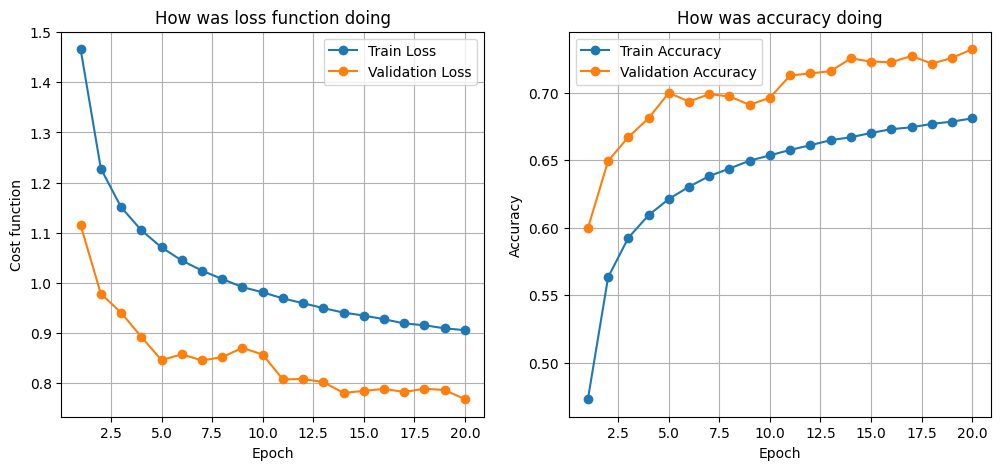

In [ ]:
# Pobranie historii uczenia
loss = history.history["loss"]
val_loss = history.history["val_loss"]
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
epochs_range = range(1, len(loss) + 1)
armata.save("done.h5")

# Wykres funkcji kosztu
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, label="Train Loss", marker="o")
plt.plot(epochs_range, val_loss, label="Validation Loss", marker="o")
plt.xlabel("Epoch")
plt.ylabel("Cost function")
plt.title("How was loss function doing")
plt.legend()
plt.grid(True)

# Wykres dokładności
plt.subplot(1, 2, 2)
plt.plot(epochs_range, accuracy, label="Train Accuracy", marker="o")
plt.plot(epochs_range, val_accuracy, label="Validation Accuracy", marker="o")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("How was accuracy doing")
plt.legend()
plt.grid(True)
plt.show()

## 7) Weight distribution of models on the final dataset

### 7.1) Weight distribution of poor trained model (Double convolutional)

Rozkład wag dla slabej architektury:


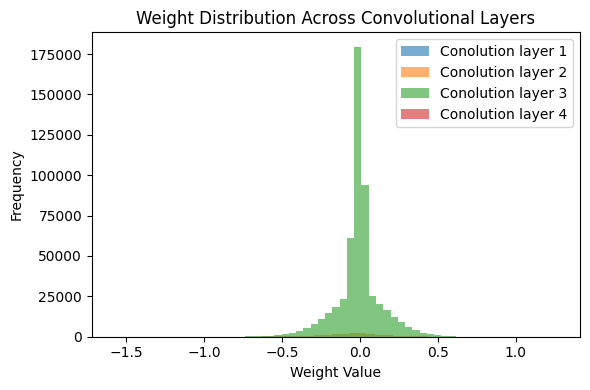

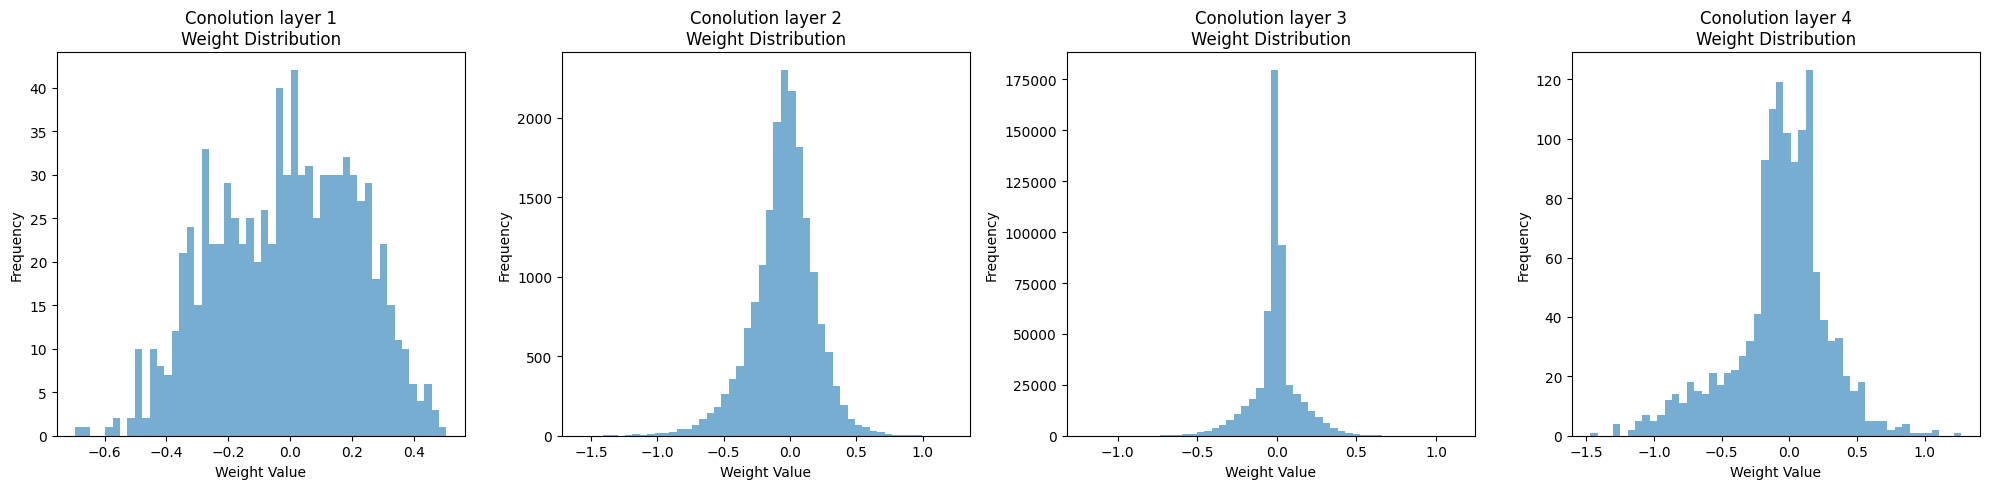

In [ ]:
import h5py
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

def recursive_collect_conv_weights(group, weights, layer_names):
    """
    Collects convolutional layer weights from .h5 model
    """
    for key in group.keys():
        item = group[key]
        if isinstance(item, h5py.Group):
            recursive_collect_conv_weights(item, weights, layer_names)
        elif isinstance(item, h5py.Dataset) and 'kernel' in key:
            weights.append(item[:])  # collects data from convolutional weights
            layer_names.append(key)


def plot_weight_distributions(model_path):
    """
    Plots the weight distribution in convolutional layers only
    """
    try:
        with h5py.File(model_path, "r") as f:
            if "model_weights" in f.keys():
                weights = []
                layer_names = []
                recursive_collect_conv_weights(f["model_weights"], weights, layer_names)

                if not weights:
                    print("No convolutional weights found in the model.")
                    return

                # plot charts
                for i in range(len(layer_names)):
                  layer_names[i] = "Conolution layer " + str(i+1)
                plt.figure(figsize=(6, 4))
                for i, (weight, layer_name) in enumerate(zip(weights, layer_names)):
                    plt.hist(weight.flatten(), bins=50, alpha=0.6, label=f'{layer_name}')
                plt.title("Weight Distribution Across Convolutional Layers")
                plt.xlabel("Weight Value")
                plt.ylabel("Frequency")
                plt.legend()
                plt.tight_layout()
                plt.show()
            else:
                print("The file does not contain 'model_weights'.")
    except Exception as e:
        print(f"Error while plotting weights: {e}")


def plot_individual_conv_weight_distributions(model_path):
    """
    Plots individual weight distributions for each convolutional layer.
    """
    try:
        with h5py.File(model_path, "r") as f:
            if "model_weights" not in f.keys():
                print("The file does not contain 'model_weights'.")
                return

            weights = []
            layer_names = []
            recursive_collect_conv_weights(f["model_weights"], weights, layer_names)

            if not weights:
                print("No convolutional weights found in the model.")
                return

            for i in range(len(layer_names)):
                  layer_names[i] = "Conolution layer " + str(i+1)
            # Plotting individual histograms for each convolutional layer
            num_layers = len(weights)
            plt.figure(figsize=(5 * num_layers, 5))
            for i, (weight, layer_name) in enumerate(zip(weights, layer_names)):
                plt.subplot(1, num_layers, i + 1)
                plt.hist(weight.flatten(), bins=50, alpha=0.6)
                plt.title(f"{layer_name}\nWeight Distribution")
                plt.xlabel("Weight Value")
                plt.ylabel("Frequency")

            plt.tight_layout()
            plt.show()

    except Exception as e:
        print(f"Error while plotting weights: {e}")

# Example usage
print("Rozkład wag dla slabej architektury:")
plot_weight_distributions("troche_lepszy_cnn.h5")
plot_individual_conv_weight_distributions("troche_lepszy_cnn.h5")


### 7.2) Weight distribution of well trained model (deep CNN)

Rozkład wag dla armaty z batch size 32:


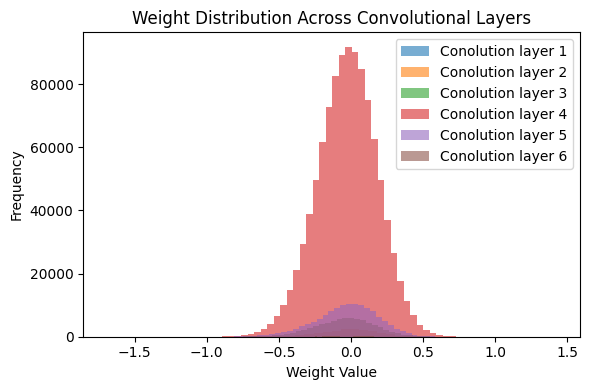

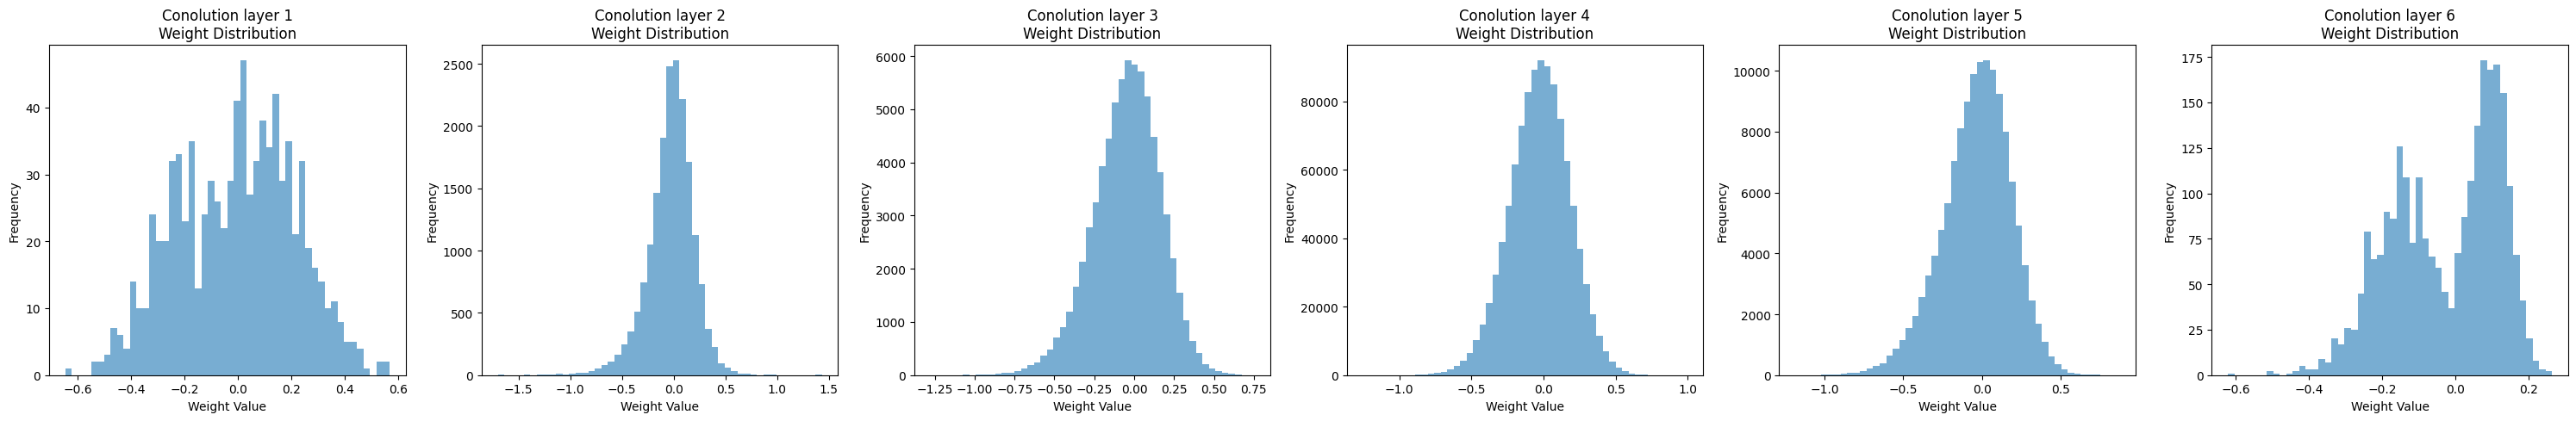

In [ ]:
print("Rozkład wag dla armaty z batch size 32:")
plot_weight_distributions("WandB_mode32.h5")
plot_individual_conv_weight_distributions("WandB_mode32.h5")

Rozkład wag dla armaty z batch size 128:


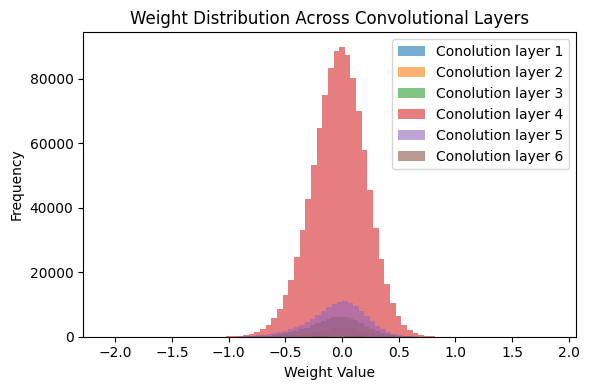

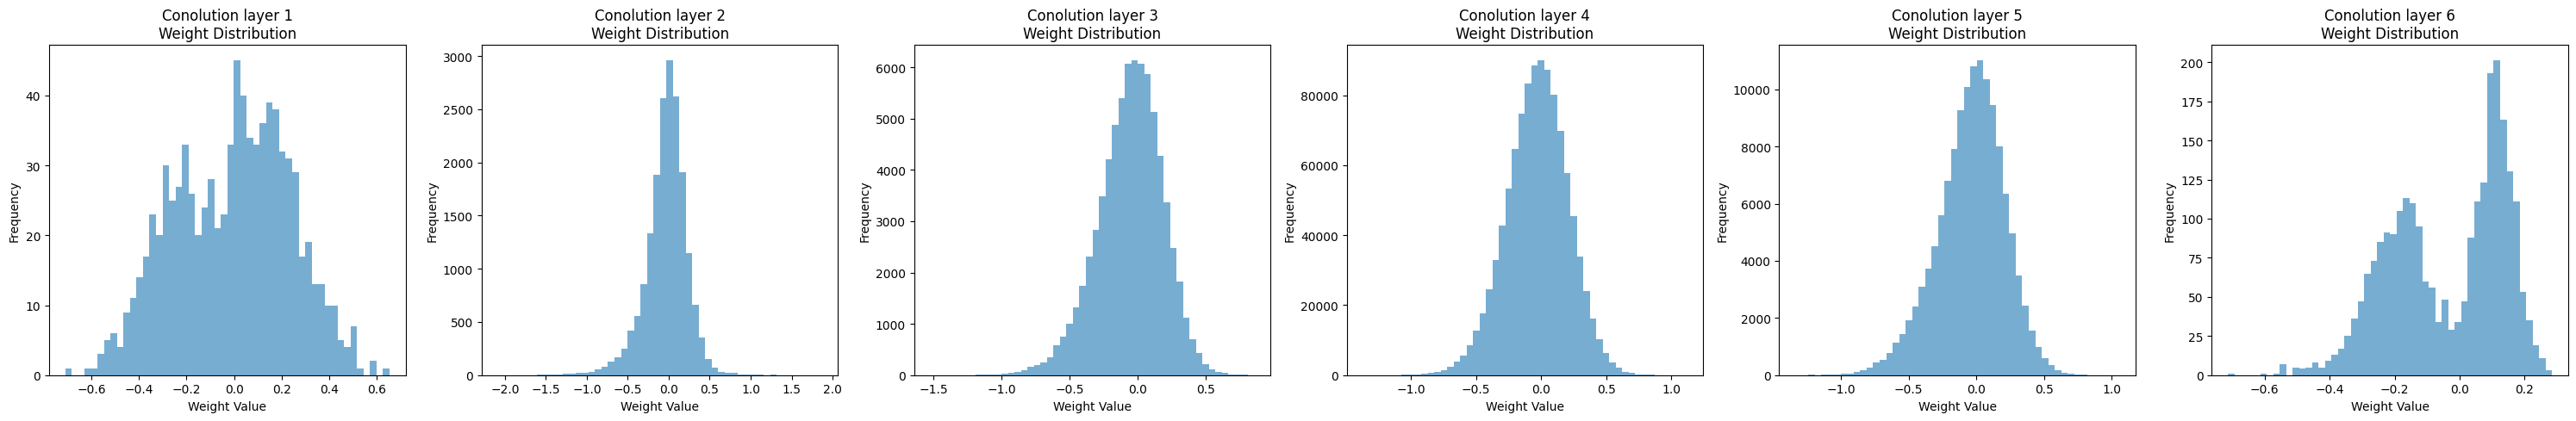

In [ ]:
print("Rozkład wag dla armaty z batch size 128:")
plot_weight_distributions("WandB_mode128.h5")
plot_individual_conv_weight_distributions("WandB_mode128.h5")

### 7.3) Weight distribution of the uploaded GoogLeNet

Rozkład wag dla GoogLeNet z batch size 128:


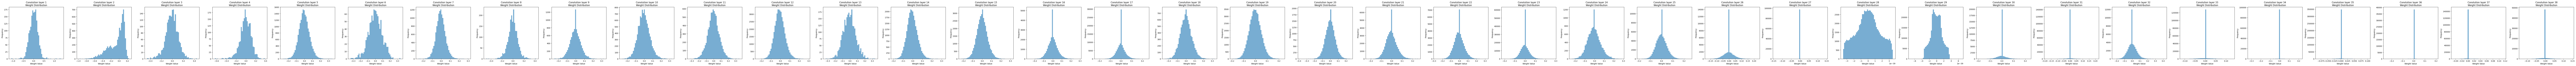

In [ ]:
print("Rozkład wag dla GoogLeNet z batch size 128:")
plot_individual_conv_weight_distributions("GoogLeNet.h5")

## 8) Ensemble models

In [ ]:
sepia32 = tf.keras.models.load_model('armata_model_with_sepia1_dir_TF.keras')
WandB32 = tf.keras.models.load_model('WandB_mode32.keras')
mixed32 = tf.keras.models.load_model('mixed_model.keras')

sepia128 = tf.keras.models.load_model('sepia_mode128.keras')
WandB128 = tf.keras.models.load_model('WandB_mode128.keras')
mixed128 = tf.keras.models.load_model('mixed_model128.keras')
models = [sepia32, WandB32, mixed32, sepia128, WandB128, mixed128]

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 24 variables whereas the saved optimizer has 45 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
rotated = tf.keras.models.load_model('rotation_model.h5')

In [ ]:
sobel = tf.keras.models.load_model('sobel.h5')

In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator_full = test_datagen.flow_from_directory(
      test_dir,
      target_size=(32,32),
      batch_size=32,
      class_mode="sparse",
      shuffle=False  # Ustawiamy shuffle=False, aby kolejność etykiet była poprawna
  )
test_loss, test_accuracy = sobel.evaluate(test_generator_full)

Found 90000 images belonging to 10 classes.
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 32s 11ms/step - accuracy: 0.6290 - loss: 1.0293


In [ ]:
test_loss

0.9367743730545044

In [ ]:
test_accuracy

0.6650333404541016

### 8.1) Test accuracy of the Ensemble models and how models predict

In [ ]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

accuracies = []
loses = []
params = []

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

for model in models[0:3]:
  test_generator_full = test_datagen.flow_from_directory(
      test_dir,
      target_size=(32,32),
      batch_size=32,
      class_mode="sparse",
      shuffle=False  # Ustawiamy shuffle=False, aby kolejność etykiet była poprawna
  )
  test_loss, test_accuracy = model.evaluate(test_generator_full)
  accuracies.append([test_accuracy,])
  loses.append([test_loss,])

Found 90000 images belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2813/2813 ━━━━━━━━━━━━━━━━━━━━ 110s 39ms/step - accuracy: 0.7228 - loss: 0.7826
Found 90000 images belonging to 10 classes.
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 135s 47ms/step - accuracy: 0.6994 - loss: 0.8569
Found 90000 images belonging to 10 classes.
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 104s 37ms/step - accuracy: 0.6717 - loss: 0.9191


In [ ]:
for i in range(0,3):
  model = models[i+3]
  test_generator_full = test_datagen.flow_from_directory(
      test_dir,
      target_size=(32,32),
      batch_size=128,
      class_mode="sparse",
      shuffle=False  # Ustawiamy shuffle=False, aby kolejność etykiet była poprawna
  )
  test_loss, test_accuracy = model.evaluate(test_generator_full)
  accuracies[i].append(test_accuracy)
  loses[i].append(test_loss)

Found 90000 images belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


704/704 ━━━━━━━━━━━━━━━━━━━━ 139s 196ms/step - accuracy: 0.6353 - loss: 1.0667
Found 90000 images belonging to 10 classes.
704/704 ━━━━━━━━━━━━━━━━━━━━ 125s 177ms/step - accuracy: 0.6859 - loss: 0.9467
Found 90000 images belonging to 10 classes.
704/704 ━━━━━━━━━━━━━━━━━━━━ 125s 176ms/step - accuracy: 0.5915 - loss: 1.1918


In [ ]:
print(model_names)

['Sepia', 'W&B', 'Mixed']


In [ ]:
accuracies

array([[0.69598889, 0.65547776],
       [0.6973111 , 0.6926778 ],
       [0.68220001, 0.61527777]])

In [ ]:
losses

array([[0.8620429 , 1.00209963],
       [0.86645687, 0.9201718 ],
       [0.90489286, 1.1139462 ]])

In [ ]:
len(accuracies)

3

Found 90000 images belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2813/2813 ━━━━━━━━━━━━━━━━━━━━ 109s 39ms/step


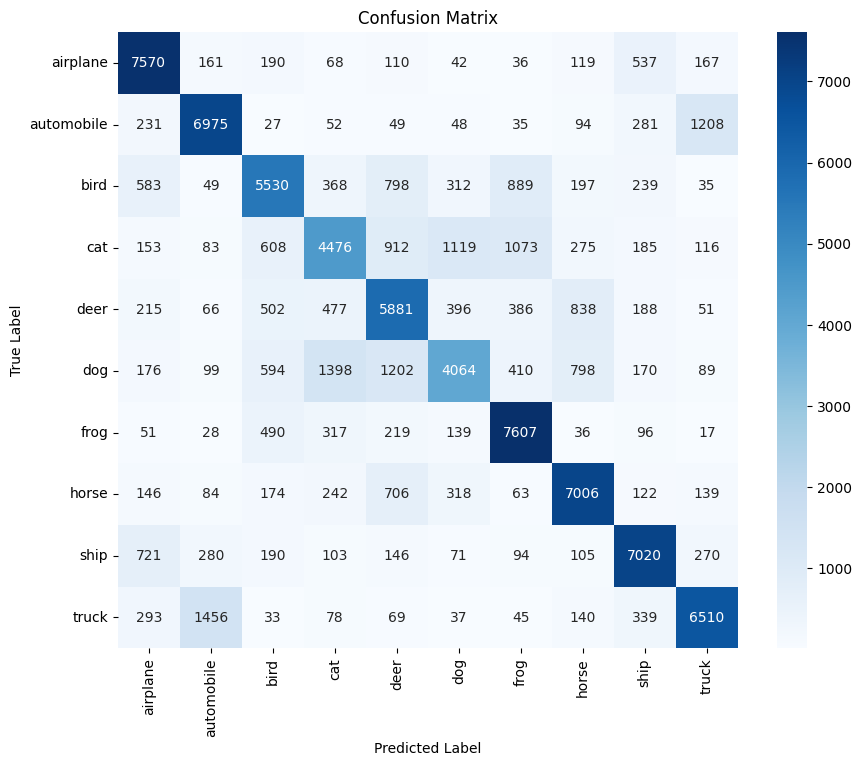

Found 90000 images belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2813/2813 ━━━━━━━━━━━━━━━━━━━━ 131s 46ms/step


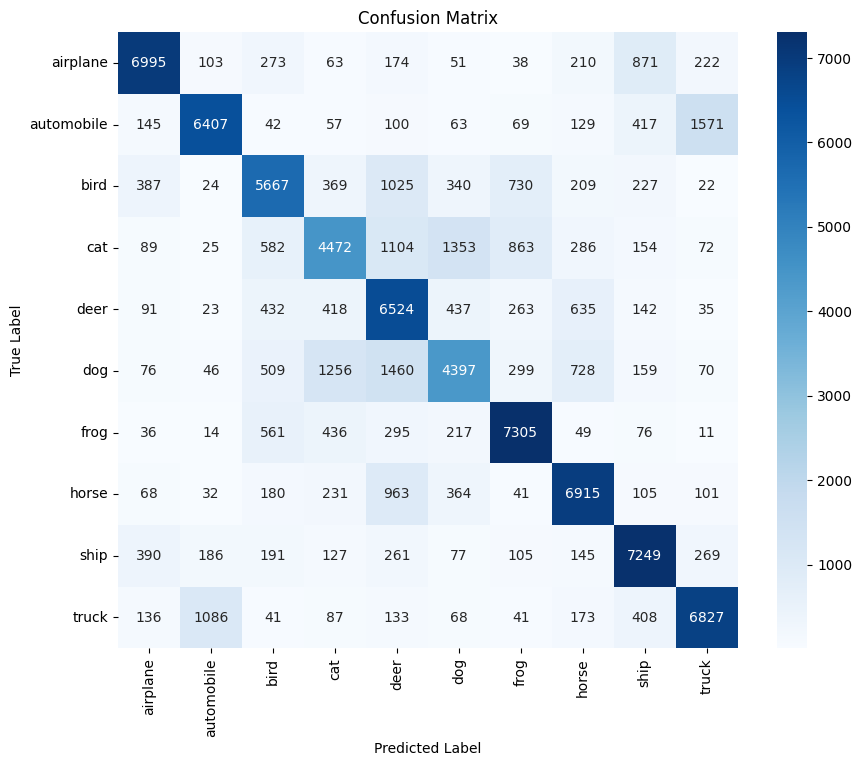

Found 90000 images belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2813/2813 ━━━━━━━━━━━━━━━━━━━━ 105s 37ms/step


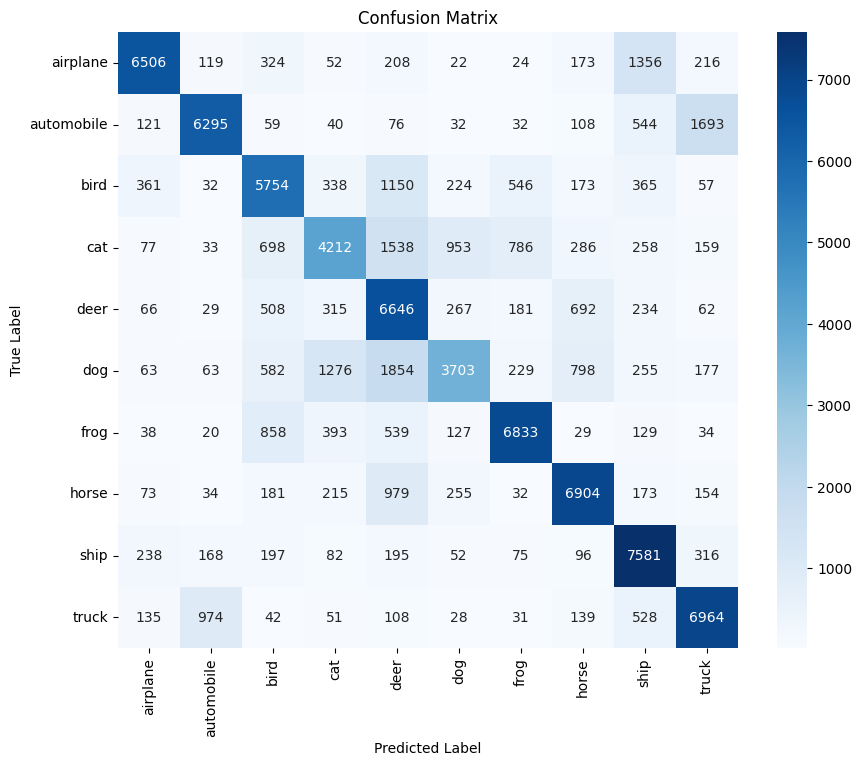

In [ ]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import json
import numpy as np

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

for armata in models[0:3]:
  test_generator_full = test_datagen.flow_from_directory(
      test_dir,
      target_size=(32,32),
      batch_size=32,
      class_mode="sparse",
      shuffle=False  # Ustawiamy shuffle=False, aby kolejność etykiet była poprawna
  )

  # Generowanie predykcji
  predictions = armata.predict(test_generator_full)
  predicted_classes = np.argmax(predictions, axis=1)
  true_classes = test_generator_full.classes
  class_labels = list(test_generator_full.class_indices.keys())

  # Macierz pomyłek (Confusion Matrix)
  conf_matrix = confusion_matrix(true_classes, predicted_classes)
  plt.figure(figsize=(10, 8))
  sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title("Confusion Matrix")
  plt.show()

Found 90000 images belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2813/2813 ━━━━━━━━━━━━━━━━━━━━ 103s 37ms/step


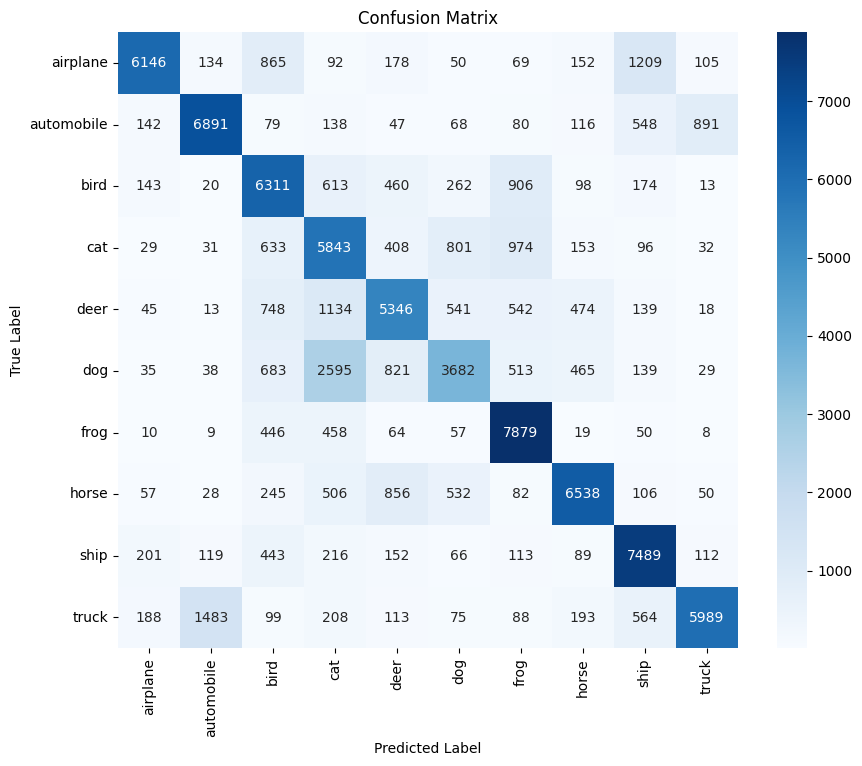

In [ ]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import json
import numpy as np

test_datagen = ImageDataGenerator(rescale=1.0/255.0)


test_generator_full = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32,32),
    batch_size=32,
    class_mode="sparse",
    shuffle=False  # Ustawiamy shuffle=False, aby kolejność etykiet była poprawna
)

# Generowanie predykcji
predictions = rotated.predict(test_generator_full)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator_full.classes
class_labels = list(test_generator_full.class_indices.keys())

# Macierz pomyłek (Confusion Matrix)
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
pierwowzor = tf.keras.models.load_model('troche_lepszy_cnn.h5')

Found 90000 images belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2813/2813 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step


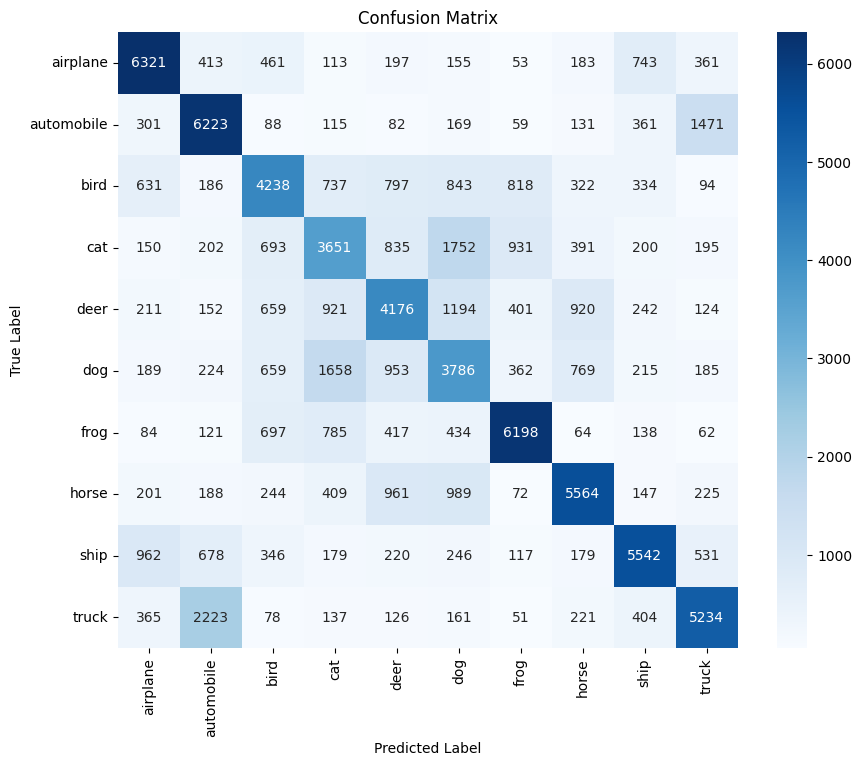

In [ ]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import json
import numpy as np

test_datagen = ImageDataGenerator(rescale=1.0/255.0)


test_generator_full = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32,32),
    batch_size=32,
    class_mode="sparse",
    shuffle=False  # Ustawiamy shuffle=False, aby kolejność etykiet była poprawna
)

# Generowanie predykcji
predictions = pierwowzor.predict(test_generator_full)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator_full.classes
class_labels = list(test_generator_full.class_indices.keys())

# Macierz pomyłek (Confusion Matrix)
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Found 90000 images belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2813/2813 ━━━━━━━━━━━━━━━━━━━━ 33s 12ms/step


Text(95.72222222222221, 0.5, 'True Label')

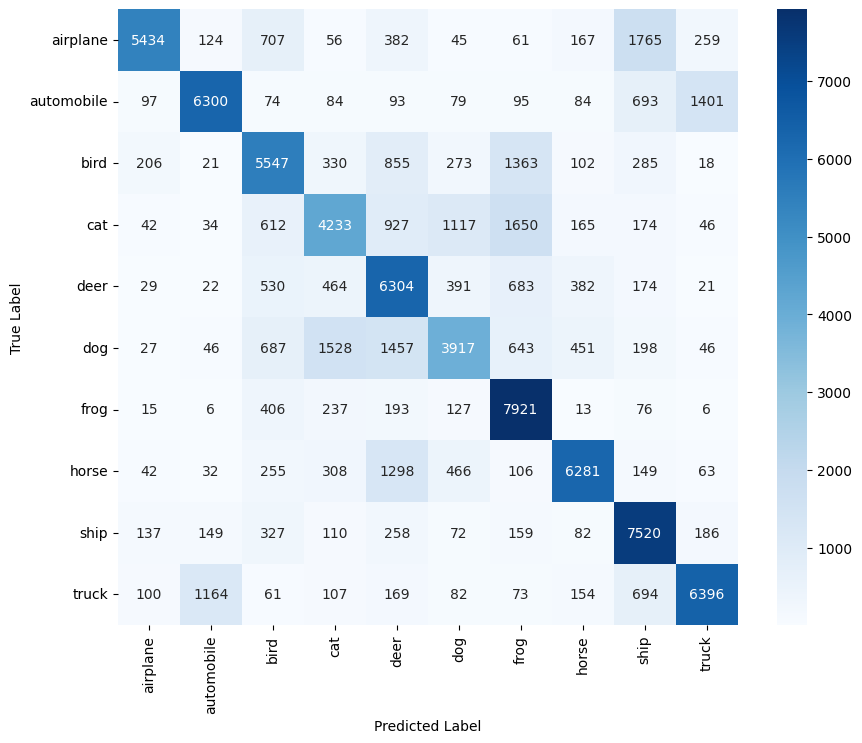

In [ ]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import json
import numpy as np

test_datagen = ImageDataGenerator(rescale=1.0/255.0)


test_generator_full = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32,32),
    batch_size=32,
    class_mode="sparse",
    shuffle=False  # Ustawiamy shuffle=False, aby kolejność etykiet była poprawna
)

# Generowanie predykcji
predictions = sobel.predict(test_generator_full)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator_full.classes
class_labels = list(test_generator_full.class_indices.keys())

# Macierz pomyłek (Confusion Matrix)
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

## 9) Ensemble models based on the compariosn of different batch sizes and agumentation methods' evaluation

In [ ]:
sobel32 = tf.keras.models.load_model('sobel_32.h5')
flip32 = tf.keras.models.load_model('flip_32.h5')
crop32 = tf.keras.models.load_model('crop_32.h5')
scretch32 = tf.keras.models.load_model('scretch32.h5')
rotated32 = tf.keras.models.load_model('rotation_model.h5')

sobel128 = tf.keras.models.load_model('sobel_128.h5')
flip128 = tf.keras.models.load_model('flip_128.h5')
crop128 = tf.keras.models.load_model('crop_128.h5')
scretch128 = tf.keras.models.load_model('scretch_128.h5')
rotated128 = tf.keras.models.load_model('rotation_model_128.h5')
models128 = [sobel128, flip128, crop128, scretch128]

In [ ]:
models2part = [sobel32, flip32, crop32, scretch32, rotated32, sobel128, flip128, crop128, scretch128, rotated128]

In [ ]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

accuracies2 = []
losses2 = []


test_datagen = ImageDataGenerator(rescale=1.0/255.0)

for model in models2part[0:5]:
  test_generator_full = test_datagen.flow_from_directory(
      test_dir,
      target_size=(32,32),
      batch_size=32,
      class_mode="sparse",
      shuffle=False  # Ustawiamy shuffle=False, aby kolejność etykiet była poprawna
  )
  test_loss, test_accuracy = model.evaluate(test_generator_full)
  accuracies2.append([test_accuracy,])
  losses2.append([test_loss,])

Found 90000 images belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2813/2813 ━━━━━━━━━━━━━━━━━━━━ 145s 50ms/step - accuracy: 0.7154 - loss: 0.8197
Found 90000 images belonging to 10 classes.
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 109s 39ms/step - accuracy: 0.7748 - loss: 0.6424
Found 90000 images belonging to 10 classes.
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 117s 41ms/step - accuracy: 0.7235 - loss: 0.7892
Found 90000 images belonging to 10 classes.
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 106s 38ms/step - accuracy: 0.6980 - loss: 0.8942
Found 90000 images belonging to 10 classes.
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 111s 39ms/step - accuracy: 0.6891 - loss: 0.8809


In [ ]:
accuracies2 = [[0.7154, 0.6291],
               [0.7748, 0.7318],
               [0.7235, 0.7287],
               [0.6980, 0.7087],
               [0.6891, 0.6953]]

In [ ]:
for i in range(0,5):
  models2 = models2part[i+5]
  test_generator_full = test_datagen.flow_from_directory(
      test_dir,
      target_size=(32,32),
      batch_size=128,
      class_mode="sparse",
      shuffle=False  # Ustawiamy shuffle=False, aby kolejność etykiet była poprawna
  )
  test_loss, test_accuracy = models2.evaluate(test_generator_full)
  accuracies2[i].append(test_accuracy)
  losses2[i].append(test_loss)

Found 90000 images belonging to 10 classes.
704/704 ━━━━━━━━━━━━━━━━━━━━ 94s 133ms/step - accuracy: 0.6291 - loss: 1.0289
Found 90000 images belonging to 10 classes.
704/704 ━━━━━━━━━━━━━━━━━━━━ 92s 130ms/step - accuracy: 0.7318 - loss: 0.7580
Found 90000 images belonging to 10 classes.
704/704 ━━━━━━━━━━━━━━━━━━━━ 92s 130ms/step - accuracy: 0.7287 - loss: 0.7678
Found 90000 images belonging to 10 classes.
704/704 ━━━━━━━━━━━━━━━━━━━━ 92s 130ms/step - accuracy: 0.7087 - loss: 0.8597
Found 90000 images belonging to 10 classes.
704/704 ━━━━━━━━━━━━━━━━━━━━ 92s 129ms/step - accuracy: 0.6953 - loss: 0.8495


In [ ]:
accuracies2 = np.array(accuracies2)
losses2 = np.array(losses2)

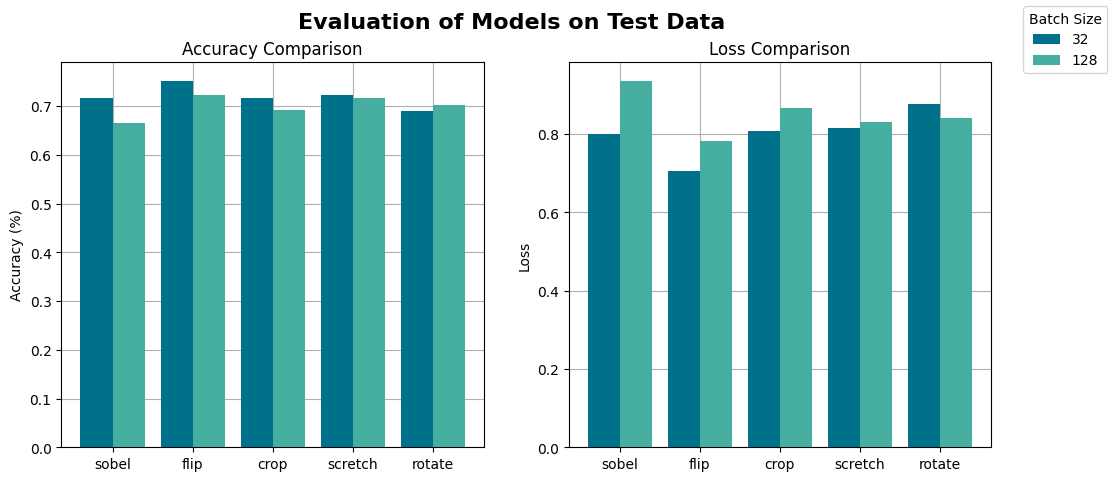

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Model names and their accuracies
batches = ["32", "128"]
model_names = ["sobel", "flip", "crop", "scretch", "rotate"]

x = np.arange(len(model_names))  # X positions

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Accuracy bar chart
ax[0].bar(x - 0.2, accuracies2[:, 0], 0.4, label="32", color = '#00718B', zorder=3)
ax[0].bar(x + 0.2, accuracies2[:, 1], 0.4, label="128", color = '#46AEA0', zorder=3)
ax[0].set_xticks(x)
ax[0].set_xticklabels(model_names)
ax[0].set_ylabel("Accuracy (%)")
ax[0].set_title("Accuracy Comparison")
ax[0].grid(True, zorder=0)

# Loss bar chart
ax[1].bar(x - 0.2, losses2[:, 0], 0.4, color = '#00718B', zorder = 3)
ax[1].bar(x + 0.2, losses2[:, 1], 0.4, color = '#46AEA0', zorder = 3)
ax[1].set_xticks(x)
ax[1].set_xticklabels(model_names)
ax[1].set_ylabel("Loss")
ax[1].set_title("Loss Comparison")
ax[1].grid(True, zorder=0)

fig.suptitle("Evaluation of Models on Test Data", fontsize=16, fontweight='bold')
fig.legend(title="Batch Size")


plt.show()


### 9.1) Ensemble model based on the best method's evaluation on the test data

Found 90000 images belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2813/2813 ━━━━━━━━━━━━━━━━━━━━ 107s 38ms/step


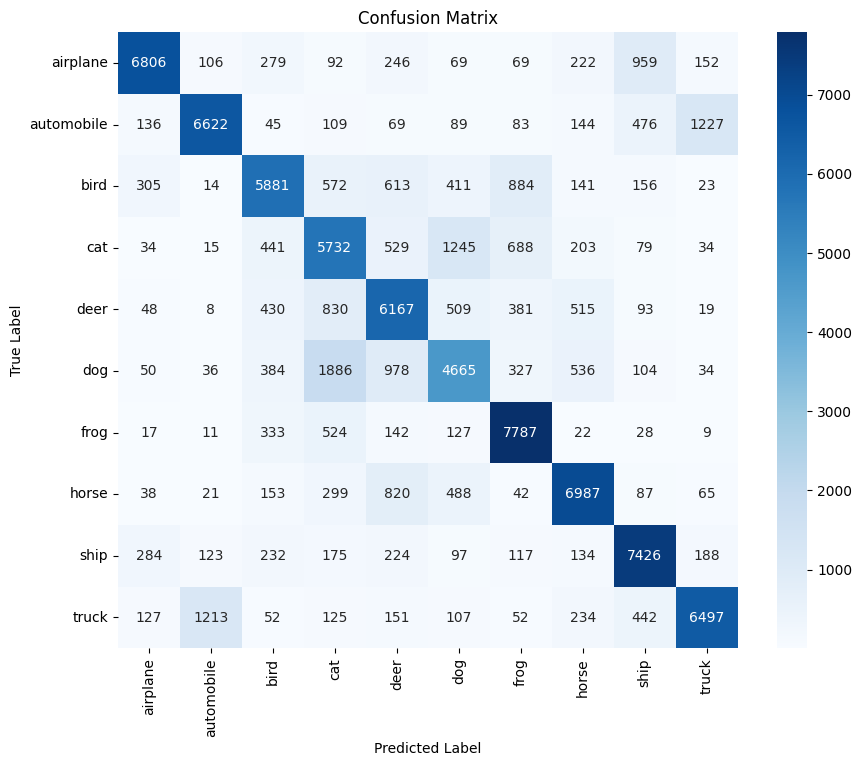

Found 90000 images belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2813/2813 ━━━━━━━━━━━━━━━━━━━━ 109s 39ms/step


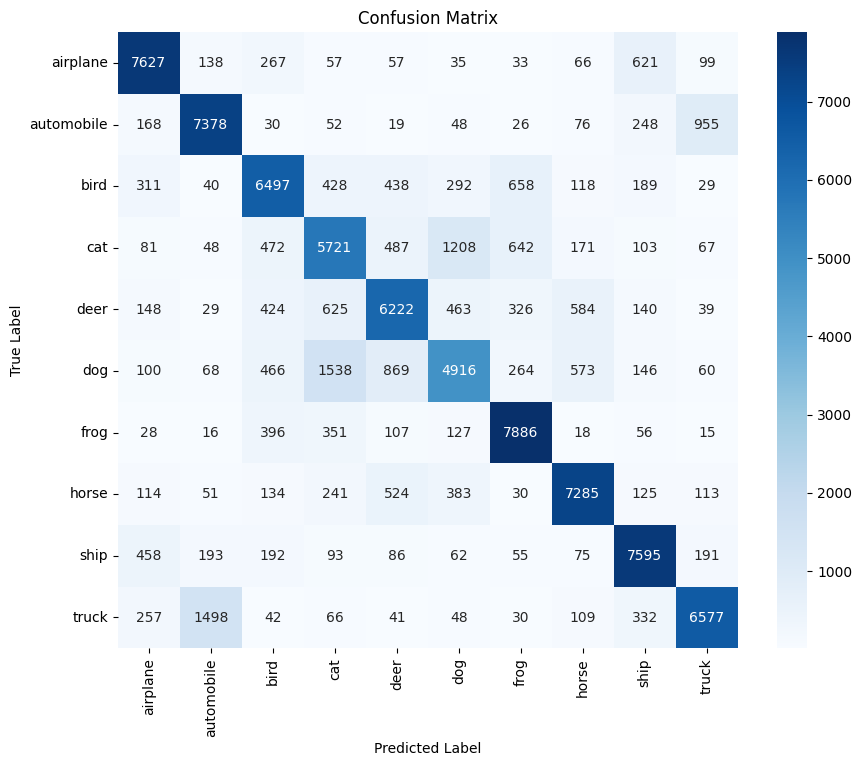

Found 90000 images belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2813/2813 ━━━━━━━━━━━━━━━━━━━━ 113s 40ms/step


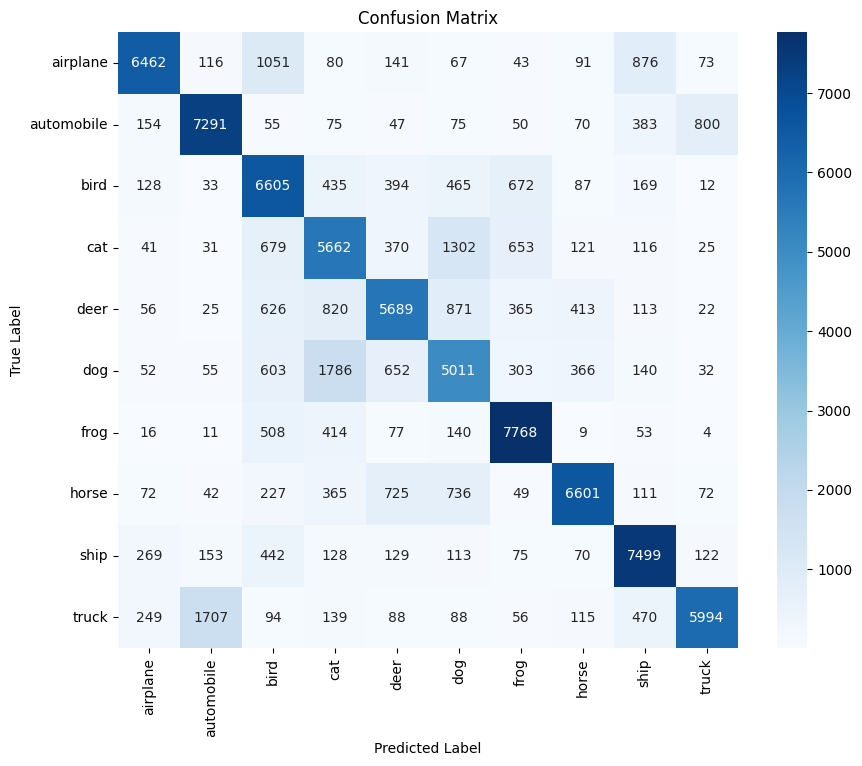

Found 90000 images belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2813/2813 ━━━━━━━━━━━━━━━━━━━━ 116s 41ms/step


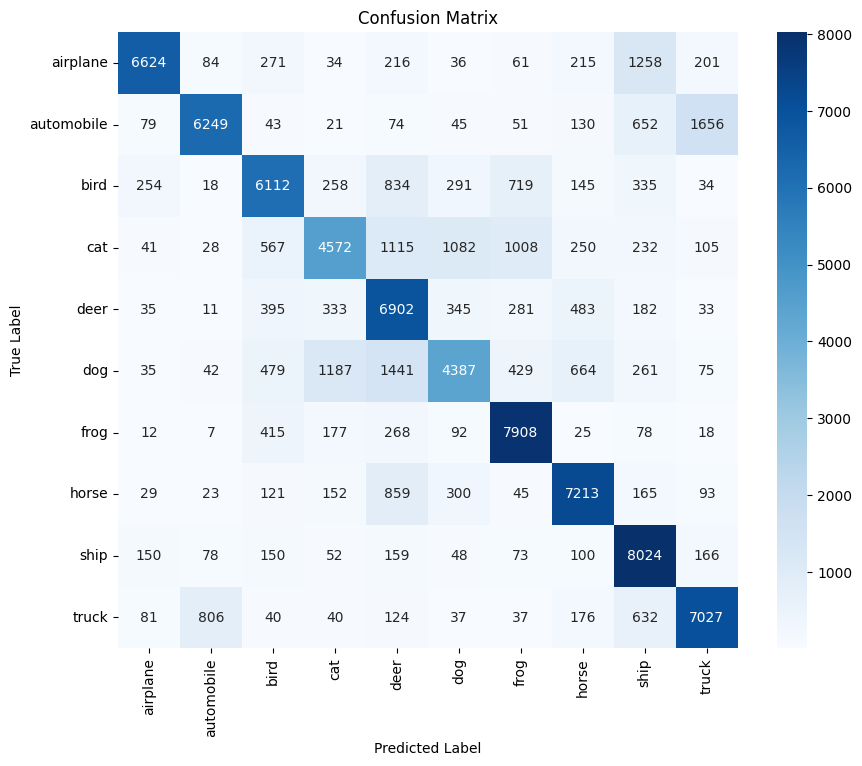

Found 90000 images belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2813/2813 ━━━━━━━━━━━━━━━━━━━━ 118s 42ms/step


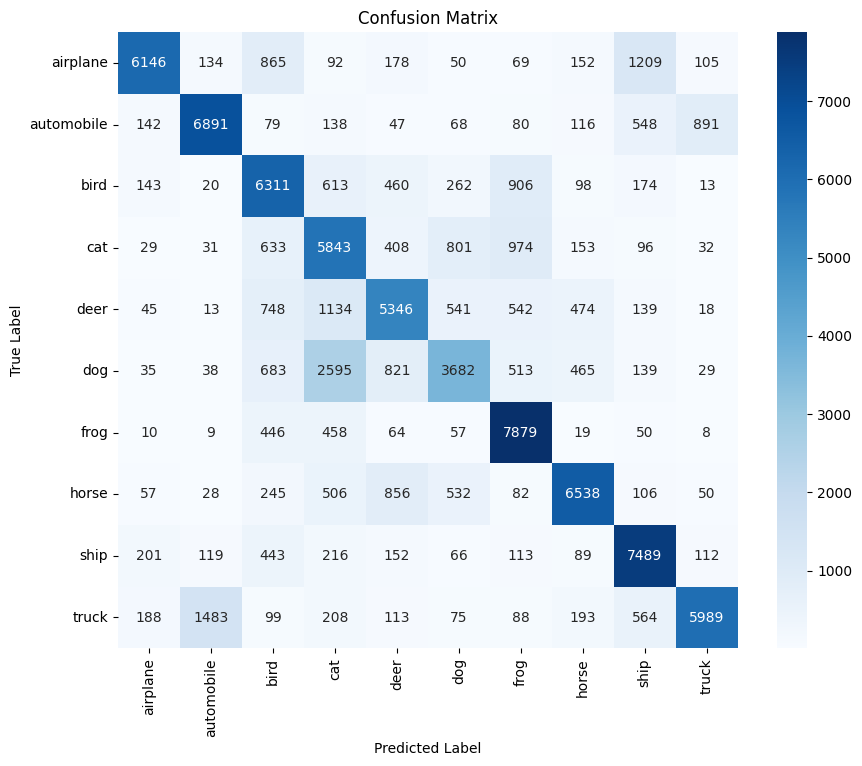

In [ ]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import json
import numpy as np

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

for armata in models2part[0:5]:
  test_generator_full = test_datagen.flow_from_directory(
      test_dir,
      target_size=(32,32),
      batch_size=32,
      class_mode="sparse",
      shuffle=False  # Ustawiamy shuffle=False, aby kolejność etykiet była poprawna
  )

  # Generowanie predykcji
  predictions = armata.predict(test_generator_full)
  predicted_classes = np.argmax(predictions, axis=1)
  true_classes = test_generator_full.classes
  class_labels = list(test_generator_full.class_indices.keys())

  # Macierz pomyłek (Confusion Matrix)
  conf_matrix = confusion_matrix(true_classes, predicted_classes)
  plt.figure(figsize=(10, 8))
  sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title("Confusion Matrix")
  plt.show()

In [ ]:
rotated128 = tf.keras.models.load_model('rotation_model_128.h5')

Found 90000 images belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


704/704 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step


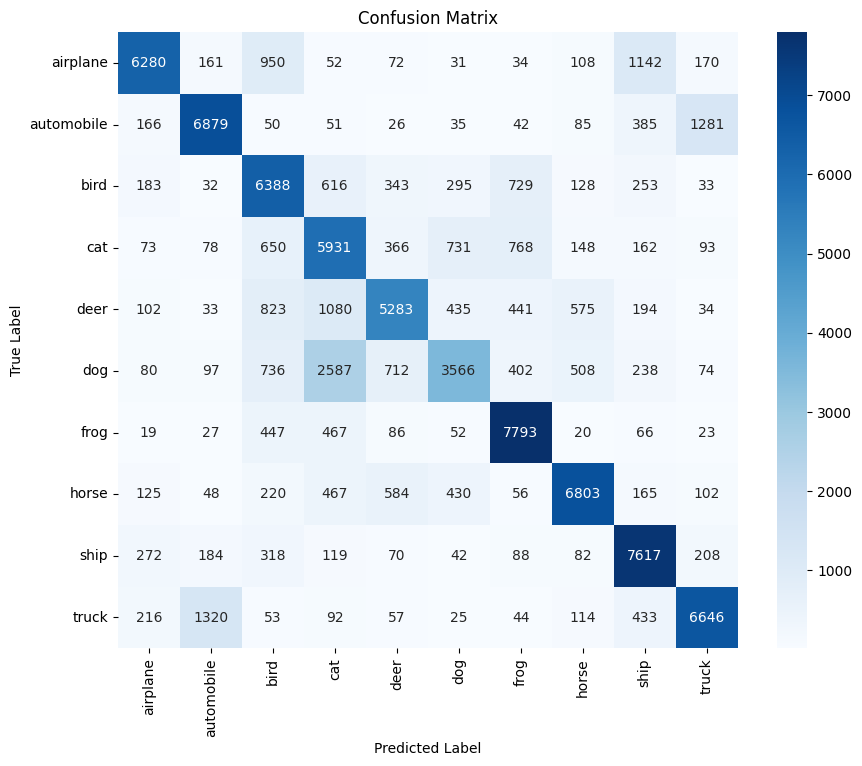

In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255.0)


test_generator_full = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32,32),
    batch_size=128,
    class_mode="sparse",
    shuffle=False  # Ustawiamy shuffle=False, aby kolejność etykiet była poprawna
)

# Generowanie predykcji
predictions = rotated128.predict(test_generator_full)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator_full.classes
class_labels = list(test_generator_full.class_indices.keys())

# Macierz pomyłek (Confusion Matrix)
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Found 90000 images belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2813/2813 ━━━━━━━━━━━━━━━━━━━━ 106s 38ms/step


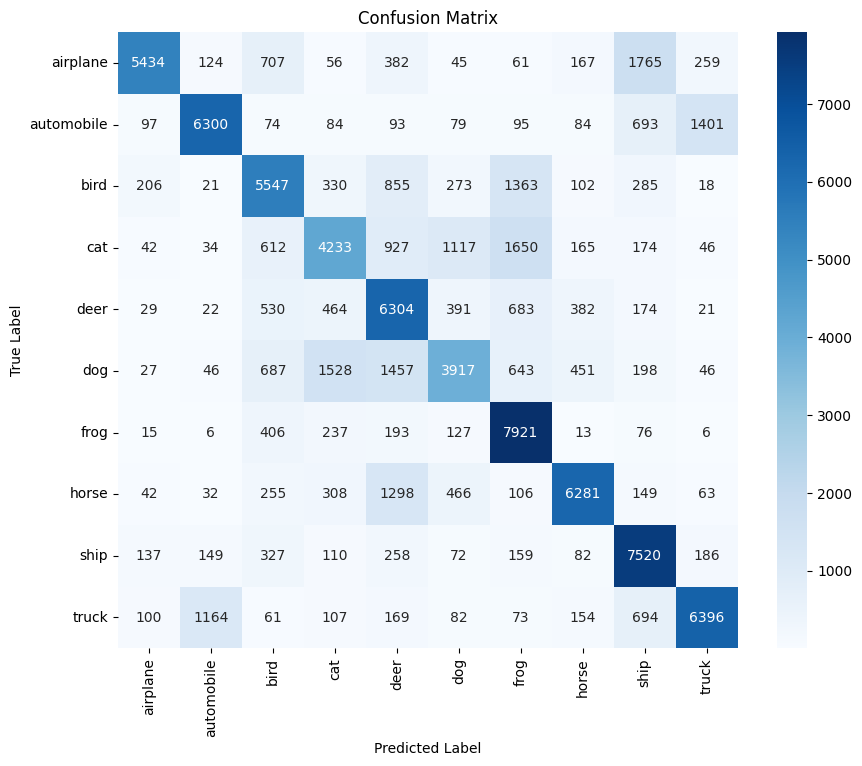

Found 90000 images belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2813/2813 ━━━━━━━━━━━━━━━━━━━━ 111s 39ms/step


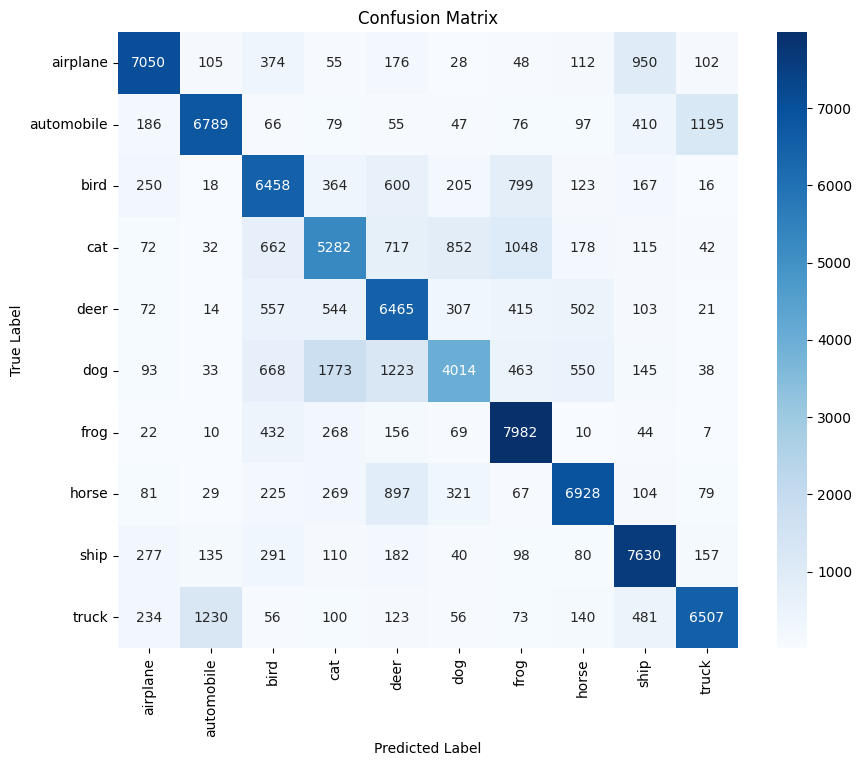

Found 90000 images belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2813/2813 ━━━━━━━━━━━━━━━━━━━━ 120s 42ms/step


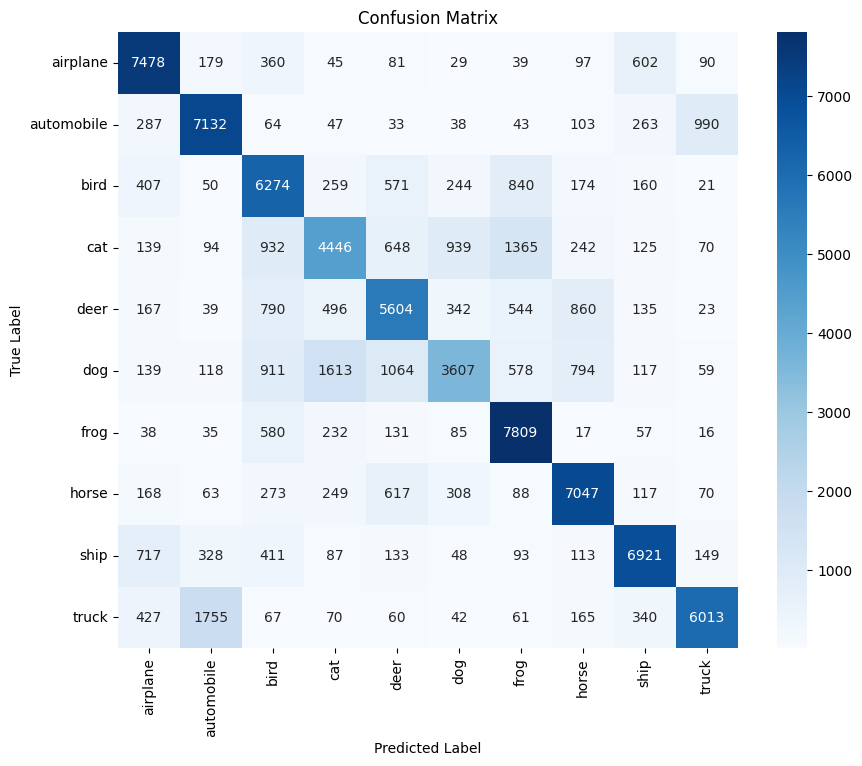

Found 90000 images belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2813/2813 ━━━━━━━━━━━━━━━━━━━━ 125s 44ms/step


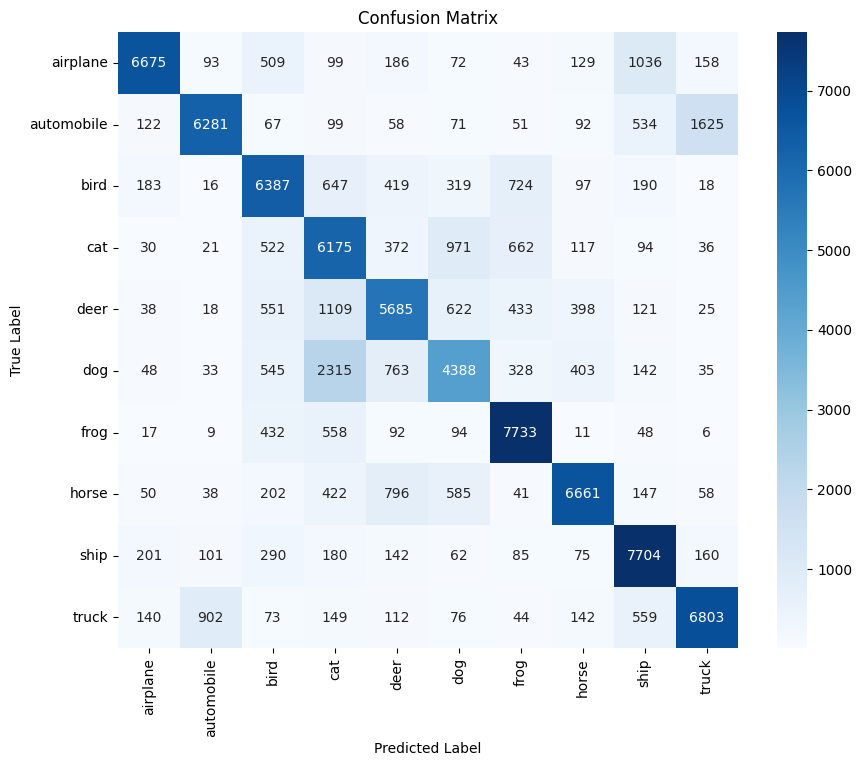

Found 90000 images belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1717/2813 ━━━━━━━━━━━━━━━━━━━━ 48s 45ms/step

In [ ]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import json
import numpy as np

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

for armata in models2part[5:10]:
  test_generator_full = test_datagen.flow_from_directory(
      test_dir,
      target_size=(32,32),
      batch_size=32,
      class_mode="sparse",
      shuffle=False  # Ustawiamy shuffle=False, aby kolejność etykiet była poprawna
  )

  # Generowanie predykcji
  predictions = armata.predict(test_generator_full)
  predicted_classes = np.argmax(predictions, axis=1)
  true_classes = test_generator_full.classes
  class_labels = list(test_generator_full.class_indices.keys())

  # Macierz pomyłek (Confusion Matrix)
  conf_matrix = confusion_matrix(true_classes, predicted_classes)
  plt.figure(figsize=(10, 8))
  sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title("Confusion Matrix")
  plt.show()

### 9.2) Final comparison of augmented methods

In [ ]:
accuracies = [[0.69598889, 0.65547776],
       [0.6973111 , 0.6926778 ],
       [0.68220001, 0.61527777]]

In [ ]:
losses = [[0.8620429 , 1.00209963],
       [0.86645687, 0.9201718 ],
       [0.90489286, 1.1139462 ]]

In [ ]:
accuracies = [[0.7034, 0.6790],
 [0.69598889, 0.65547776],
 [0.6973111, 0.6926778],
 [0.68220001, 0.61527777],
 [0.7154, 0.6291],
 [0.7748, 0.7318],
 [0.7235, 0.7287],
 [0.698, 0.7087],
 [0.6891, 0.6953],
              [0.6199, 0.609]]

In [ ]:
losses = [[0.8251, 0.9040],
 [0.8620429, 1.00209963],
 [0.86645687, 0.9201718],
 [0.90489286, 1.1139462],
 [0.8015167713165283, 0.9367735981941223],
 [0.7051202058792114, 0.7823226451873779],
 [0.807550847530365, 0.8674440979957581],
 [0.815067708492279, 0.8304070234298706],
 [0.8772682547569275, 0.842047929763794],
          [1.0749, 1.0888]]

In [ ]:
import numpy as np


losses2 = losses2.tolist()
accuracies2 = accuracies2.tolist()



In [ ]:
losses = np.array(losses)
accuracies = np.array(accuracies)

In [ ]:
for i in losses2:
  losses.append(i)

In [ ]:
for i in accuracies2:
  accuracies.append(i)

In [ ]:
losses = np.array(losses)

In [ ]:
accuracies = np.array(accuracies)

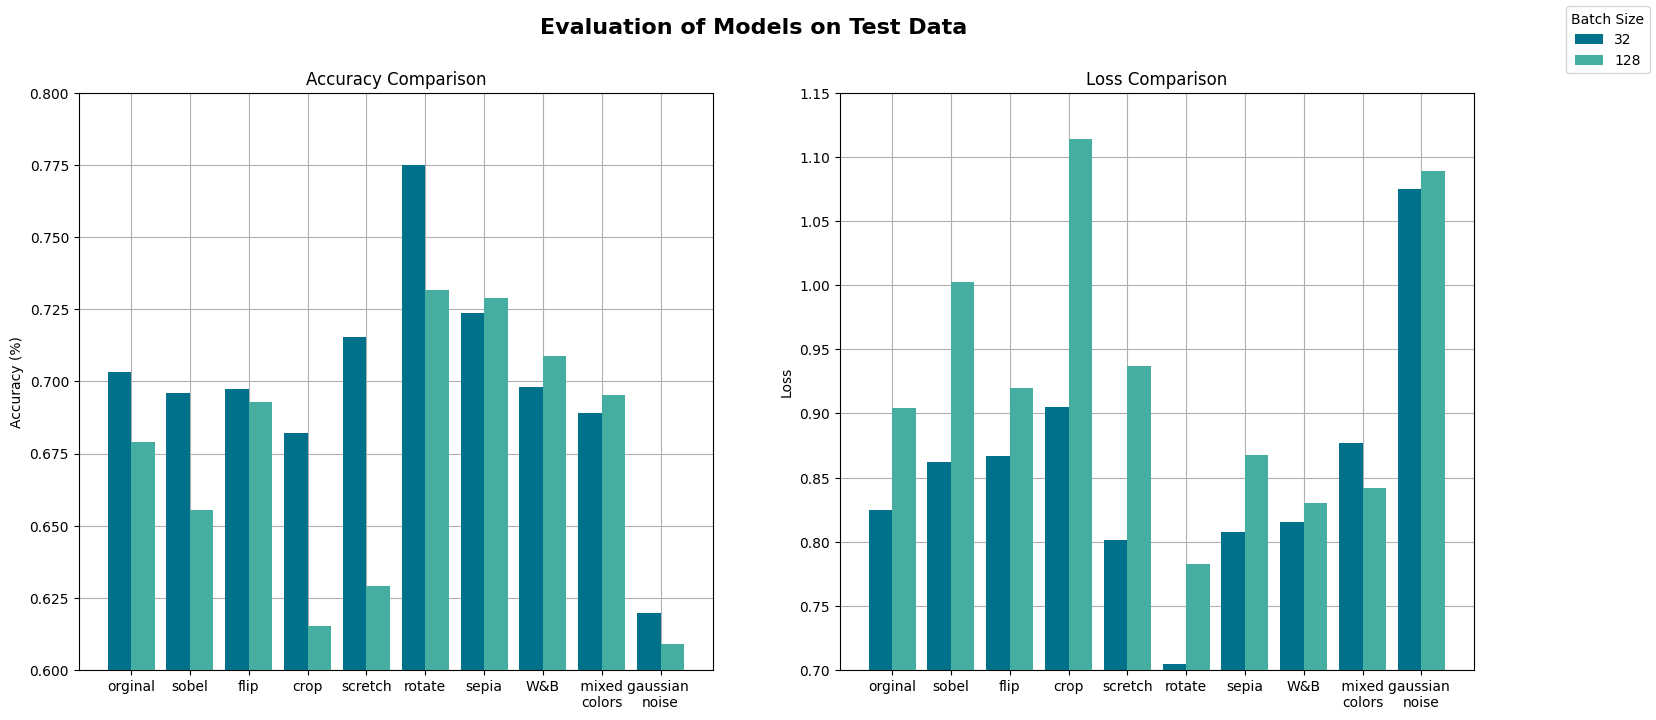

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Model names and their accuracies
batches = ["32", "128"]
model_names = ["orginal", "sobel", "flip", "crop", "scretch", "rotate", 'sepia', 'W&B', ' mixed \ncolors', "gaussian \nnoise"]

x = np.arange(len(model_names))  # X positions

fig, ax = plt.subplots(1, 2, figsize=(18, 7.5))

# Accuracy bar chart
ax[0].bar(x - 0.2, accuracies[:, 0], 0.4, label="32", color = '#00718B', zorder=3)
ax[0].bar(x + 0.2, accuracies[:, 1], 0.4, label="128", color = '#46AEA0', zorder=3)
ax[0].set_xticks(x)
ax[0].set_xticklabels(model_names)
ax[0].set_ylabel("Accuracy (%)")
ax[0].set_title("Accuracy Comparison")
ax[0].grid(True, zorder=0)
ax[0].set_ylim(0.6, 0.8)

# Loss bar chart
ax[1].bar(x - 0.2, losses[:, 0], 0.4, color = '#00718B', zorder = 3)
ax[1].bar(x + 0.2, losses[:, 1], 0.4, color = '#46AEA0', zorder = 3)
ax[1].set_xticks(x)
ax[1].set_xticklabels(model_names)
ax[1].set_ylabel("Loss")
ax[1].set_title("Loss Comparison")
ax[1].grid(True, zorder=0)
ax[1].set_ylim(0.7, 1.15)

fig.suptitle("Evaluation of Models on Test Data", fontsize=16, fontweight='bold')
fig.legend(title="Batch Size")


plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model = tf.keras.models.load_model("crop_128.h5") # crop 128
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator_full = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),
    batch_size=128,
    class_mode="sparse",
    shuffle=False
)
test_loss, test_acc = model.evaluate(test_generator_full, verbose=1)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

Found 90000 images belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


704/704 ━━━━━━━━━━━━━━━━━━━━ 101s 142ms/step - accuracy: 0.7287 - loss: 0.7678
Test accuracy: 0.6926
Test loss: 0.8674


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model = tf.keras.models.load_model("sobel_128.h5") # sobel 128
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator_full = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),
    batch_size=128,
    class_mode="sparse",
    shuffle=False
)
test_loss, test_acc = model.evaluate(test_generator_full, verbose=1)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

Found 90000 images belonging to 10 classes.
704/704 ━━━━━━━━━━━━━━━━━━━━ 84s 119ms/step - accuracy: 0.6291 - loss: 1.0289
Test accuracy: 0.6650
Test loss: 0.9368


### 9.3) Creating cat&dog model based on the best augmented methods

In [ ]:
def copy_files(src_dir, dst_dir):
    for root, _, files in os.walk(src_dir):
        for file in files:
            src_file = os.path.join(root, file)
            dst_file = os.path.join(dst_dir, os.path.relpath(src_file, src_dir))
            os.makedirs(os.path.dirname(dst_file), exist_ok=True)
            shutil.copy(src_file, dst_file)

# Łączenie zbiorów train_dir i valid_dir w jeden duzy
base_dir = os.path.dirname(path)
full_180k = os.path.join(base_dir, "full_180k")
train_144k = os.path.join(base_dir, "train_144k")
valid_36k = os.path.join(base_dir, "valid_36k")

# Create or reset directories
create_clean_dir(full_180k)
create_clean_dir(train_144k)
create_clean_dir(valid_36k)

copy_files(train_dir, full_180k)
copy_files(valid_dir, full_180k)

print("Path to source dataset files:", full_180k)
print_folder_structure_and_image_count("/root/.cache/kagglehub/datasets/mengcius/cinic10/versions/full_180k")

Path to source dataset files: /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/full_180k
full_180k/ - 0 images
  airplane/ - 18000 images
  automobile/ - 18000 images
  bird/ - 18000 images
  cat/ - 18000 images
  deer/ - 18000 images
  dog/ - 18000 images
  frog/ - 18000 images
  horse/ - 18000 images
  ship/ - 18000 images
  truck/ - 18000 images


In [ ]:
train_ratio = 0.8  # 80% dla training144k
valid_ratio = 0.2  # 20% dla valid36k

for class_name in os.listdir(full_180k):
    class_dir = os.path.join(full_180k, class_name)
    if not os.path.isdir(class_dir):
        continue

    # Utwórz katalogi dla klasy w nowych zbiorach
    training_class_dir = os.path.join(train_144k, class_name)
    valid_class_dir = os.path.join(valid_36k, class_name)
    os.makedirs(training_class_dir, exist_ok=True)
    os.makedirs(valid_class_dir, exist_ok=True)
    files = os.listdir(class_dir)
    random.shuffle(files)  # Wymieszaj pliki, aby podział był losowy - dobra nie jestem pewien czy nie powoduje to duplikatow w zbiorze train i valid

    # Oblicz liczbę plików dla każdego zbioru
    n_train = int(len(files) * train_ratio)
    n_valid = len(files) - n_train

    # Podziel pliki na dwa zbiory
    train_files = files[:n_train]
    valid_files = files[n_train:]

    # Skopiuj pliki do odpowiednich katalogów
    for file in train_files:
        src = os.path.join(class_dir, file)
        dst = os.path.join(training_class_dir, file)
        shutil.copy(src, dst)

    for file in valid_files:
        src = os.path.join(class_dir, file)
        dst = os.path.join(valid_class_dir, file)
        shutil.copy(src, dst)

    print(f"Class {class_name}: {len(train_files)} files -> training144k, {len(valid_files)} files -> valid36k")

print("\n___________________________ Train 144k jak wygląda:")
print("\nNowe podzbiory i ilość obrazów:")
print_folder_structure_and_image_count(train_144k)

Class frog: 14400 files -> training144k, 3600 files -> valid36k
Class automobile: 14400 files -> training144k, 3600 files -> valid36k
Class truck: 14400 files -> training144k, 3600 files -> valid36k
Class dog: 14400 files -> training144k, 3600 files -> valid36k
Class bird: 14400 files -> training144k, 3600 files -> valid36k
Class ship: 14400 files -> training144k, 3600 files -> valid36k
Class airplane: 14400 files -> training144k, 3600 files -> valid36k
Class deer: 14400 files -> training144k, 3600 files -> valid36k
Class horse: 14400 files -> training144k, 3600 files -> valid36k
Class cat: 14400 files -> training144k, 3600 files -> valid36k

___________________________ Train 144k jak wygląda:

Nowe podzbiory i ilość obrazów:
train_144k/ - 0 images
  airplane/ - 14400 images
  automobile/ - 14400 images
  bird/ - 14400 images
  cat/ - 14400 images
  deer/ - 14400 images
  dog/ - 14400 images
  frog/ - 14400 images
  horse/ - 14400 images
  ship/ - 14400 images
  truck/ - 14400 images


In [ ]:
import cv2
import numpy as np

def stretch_image(image, stretch_factor=None, interpolation=cv2.INTER_LINEAR):
    h, w = image.shape[:2]

    # Ustalanie współczynnika rozciągania
    if stretch_factor is None:
        stretch_factor = np.random.uniform(0.8, 1.2)  # Bezpieczny zakres
    elif isinstance(stretch_factor, (list, tuple)):
        stretch_factor = np.random.uniform(stretch_factor[0], stretch_factor[1])

    # Rozciąganie szerokości i wysokości niezależnie
    new_w = int(w * stretch_factor)
    new_h = int(h * (1 / stretch_factor))  # Odwrócony współczynnik dla wysokości

    # Rozciąganie obrazu
    stretched = cv2.resize(image, (new_w, new_h), interpolation=interpolation)

    # Jeśli rozciągnięcie wykracza poza rozmiar, przycinamy
    if new_w > w:
        x_start = (new_w - w) // 2
        stretched = stretched[:, x_start:x_start + w]
    if new_h > h:
        y_start = (new_h - h) // 2
        stretched = stretched[y_start:y_start + h, :]

    # Skalowanie powrotne do oryginalnych wymiarów
    return cv2.resize(stretched, (w, h), interpolation=interpolation)


In [ ]:
os.listdir(valid_36k)

['frog',
 'automobile',
 'truck',
 'dog',
 'bird',
 'ship',
 'airplane',
 'deer',
 'horse',
 'cat']

In [ ]:
os.path.dirname(os.path.join(train_144k, 'dog'))

'/root/.cache/kagglehub/datasets/mengcius/cinic10/versions/train_144k'

In [ ]:
import os
import cv2
import numpy as np

dataset_path3 = test_dir
save_path3 = test_cd  # Root directory for saving

classes_to_stretch = ["cat", "dog"]  # Only modify these classes

# Loop through "cat" and "dog" images
for category in classes_to_stretch:
    class_path = os.path.join(dataset_path3, category)  # Original images
    save_path = os.path.join(save_path3, f"{category}")  # New directory

    # Create save directory if it doesn't exist
    os.makedirs(save_path, exist_ok=True)

    for filename in os.listdir(class_path):
        img_path = os.path.join(class_path, filename)

        # Read image
        image = cv2.imread(img_path)
        if image is None:
            continue  # Skip if image is unreadable

        # Apply stretching
        stretched_image = image

        # Save in new folder with same filename
        new_img_path = os.path.join(save_path, filename)
        cv2.imwrite(new_img_path, stretched_image)

print("Stretching complete! 🚀 Stretched images saved in 'cat_stretch' and 'dog_stretch' folders.")


Stretching complete! 🚀 Stretched images saved in 'cat_stretch' and 'dog_stretch' folders.


In [ ]:
os.path.dirname(train_cd_stretched + "/cd_stretches")

'/root/.cache/kagglehub/datasets/mengcius/cinic10/versions/train_144k/cd_stretches'

In [ ]:
print_folder_structure_and_image_count(test_cd)

cd/ - 0 images
  cat/ - 9000 images
  dog/ - 9000 images


In [ ]:
test_cd = os.path.join(test_dir + "/cd")

In [ ]:
valid_cd

'/root/.cache/kagglehub/datasets/mengcius/cinic10/versions/valid_36k/cd'

In [ ]:
train_cd

'/root/.cache/kagglehub/datasets/mengcius/cinic10/versions/train_144k/cd'

In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# Function to display original vs. stretched images
def compare_images(train_dir, save_root, num_images=5):
    categories = os.listdir(train_dir)  # Get categories

    # Loop over a few images
    for i in range(num_images):
        category = random.choice(categories)  # Pick a random category (cat or dog)
        category_path = os.path.join(train_dir, category)  # Path to category folder
        img_name = random.choice(os.listdir(category_path))  # Pick a random image
        original_path = os.path.join(category_path, img_name)  # Full original image path

        # Load original image
        original_image = cv2.imread(original_path)
        if original_image is None:
            continue  # Skip if image is unreadable

        # Apply stretching effect
        stretched_image = stretch_image(original_image)

        # Convert images from BGR to RGB for better display
        original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
        stretched_image_rgb = cv2.cvtColor(stretched_image, cv2.COLOR_BGR2RGB)

        # Plot original vs stretched side by side
        fig, ax = plt.subplots(1, 2, figsize=(8, 6))

        ax[0].imshow(original_image_rgb)
        ax[0].set_title(f"Original: {category}")
        ax[0].axis('off')

        ax[1].imshow(stretched_image_rgb)
        ax[1].set_title(f"Stretched: {category}")
        ax[1].axis('off')

        plt.show()


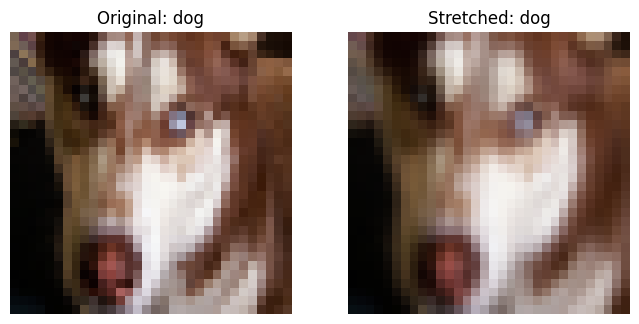

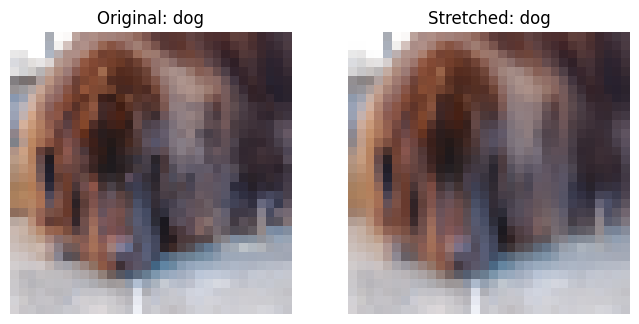

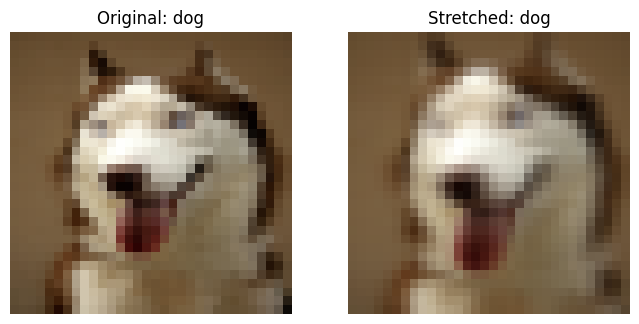

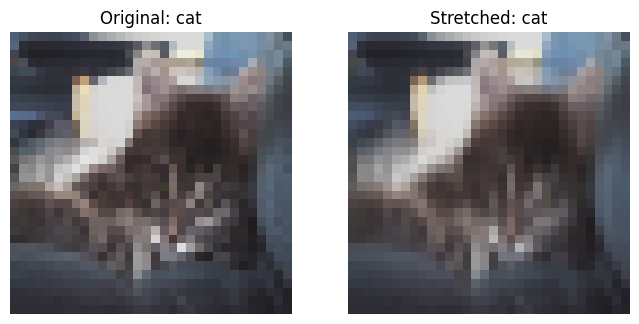

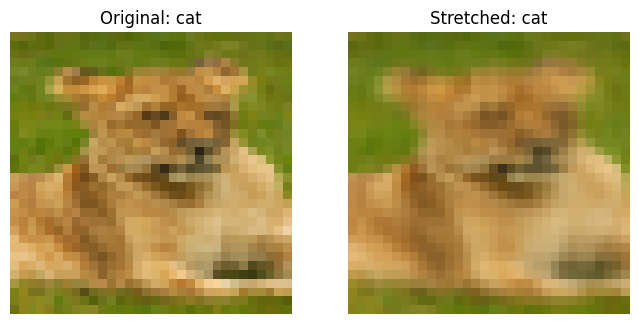

In [ ]:
compare_images(train_cd, train_cd_stretched)

In [ ]:
os.listdir(train_dir_cat_and_dog)

['dog', 'cat']

In [ ]:
import shutil


shutil.rmtree(train_cd_stretched)  # Deletes folder and all its files

print(f"✅ Folder '{folder_path}' and all its contents have been deleted!")


✅ Folder '/root/.cache/kagglehub/datasets/mengcius/cinic10/versions/train_144k/cat_and_dog' and all its contents have been deleted!


In [ ]:
test_dir_cat_and_dog = os.path.join(test_dir, 'cat_and_dog')

In [ ]:
os.listdir(train_dir_cat_and_dog)

['dog', 'cat']

In [ ]:
train_dir_cat_and_dog = (os.path.join(train_144k, 'cat_and_dog'))

In [ ]:
valid_cat_and_dog = os.path.join(valid_36k, 'cat_and_dog')

In [ ]:
 # Create a generator that combines both generators

train_generator = ImageDataGenerator(rescale=1.0/255).flow_from_directory(
    train_cd,
    target_size=(32, 32),
    batch_size=32,  # Larger batches
    class_mode="sparse",
    shuffle=True
)
# mixed augmentation methods
augmented_generator = ImageDataGenerator(rescale=1.0/255).flow_from_directory(
    train_cd_stretched,
    target_size=(32, 32),
    batch_size=32,  # Larger batches
    class_mode="sparse",
    shuffle=True
)
valid_generator = ImageDataGenerator(rescale=1.0/255).flow_from_directory(
    valid_cd,
    target_size=(32, 32),
    batch_size=32,  # Larger batches
    class_mode="sparse",
    shuffle=True
)

def combined_generator(gen1, gen2):
    while True:
        # Combine batches from both generators
        x1, y1 = next(gen1)
        x2, y2 = next(gen2)

        # Concatenate the images and labels
        yield (np.concatenate([x1, x2]), np.concatenate([y1, y2]))

# Use combined generator
train_generator_50_50_all = combined_generator(train_generator, augmented_generator)
# Calculate the number of samples in the original and sepia generators
train_samples = train_generator.samples
stretch_samples = augmented_generator.samples

# Total number of samples in the combined generator (since we're combining both)
total_samples = train_samples + stretch_samples

print(f"Train set: {total_samples} images")
print(f"Validation set: {valid_generator.samples} images")

Found 28800 images belonging to 2 classes.
Found 28800 images belonging to 2 classes.
Found 7200 images belonging to 2 classes.
Train set: 57600 images
Validation set: 7200 images


In [ ]:
EPOCHS = 20 # malo narazie
# Define steps per epoch
steps_per_epoch = total_samples // 32  # Ensure batch_size=32
validation_steps = valid_generator.samples // 32

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(0.001, decay_steps=10000, decay_rate=0.9) # troche opoznienia w uczeniu
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
armata.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = armata.fit(
    train_generator_50_50_all,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=validation_steps,
    epochs=EPOCHS
)

Epoch 1/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 51s 24ms/step - accuracy: 0.8461 - loss: 0.3439 - val_accuracy: 0.7524 - val_loss: 0.5683
Epoch 2/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 0.8525 - loss: 0.3313 - val_accuracy: 0.7460 - val_loss: 0.5685
Epoch 3/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 0.8628 - loss: 0.3156 - val_accuracy: 0.7304 - val_loss: 0.5915
Epoch 4/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 0.8668 - loss: 0.3072 - val_accuracy: 0.7496 - val_loss: 0.5585
Epoch 5/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.8772 - loss: 0.2843 - val_accuracy: 0.7458 - val_loss: 0.6019
Epoch 6/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 0.8807 - loss: 0.2760 - val_accuracy: 0.7475 - val_loss: 0.5844
Epoch 7/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 0.8891 - loss: 0.2631 - val_accuracy: 0.7474 - val_loss: 0.5995
Epoch 8/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 0.8916 -

#### 9.3.1) Results of the cat&dog model on the test data using Deep CNN

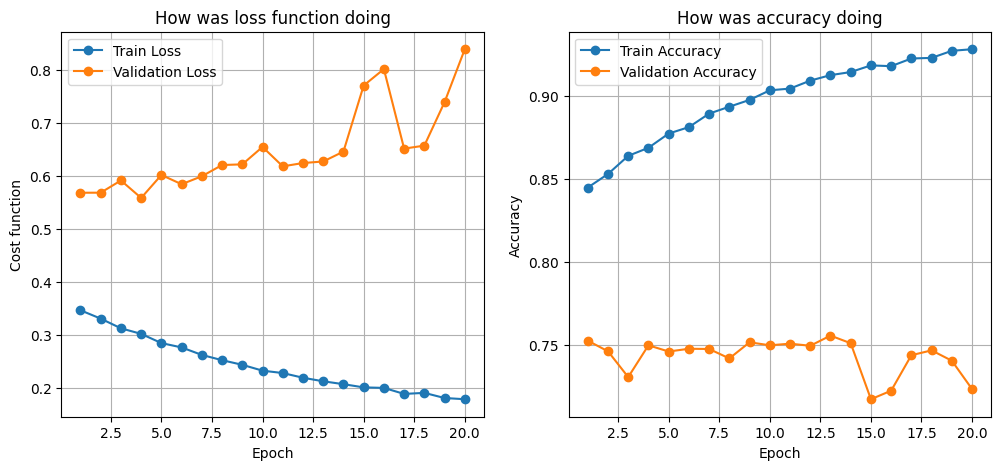

Found 18000 images belonging to 2 classes.
 10/563 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7189 - loss: 0.7363

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


563/563 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7848 - loss: 0.6075
Test Loss: 0.8439
Test Accuracy: 0.7204
563/563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step


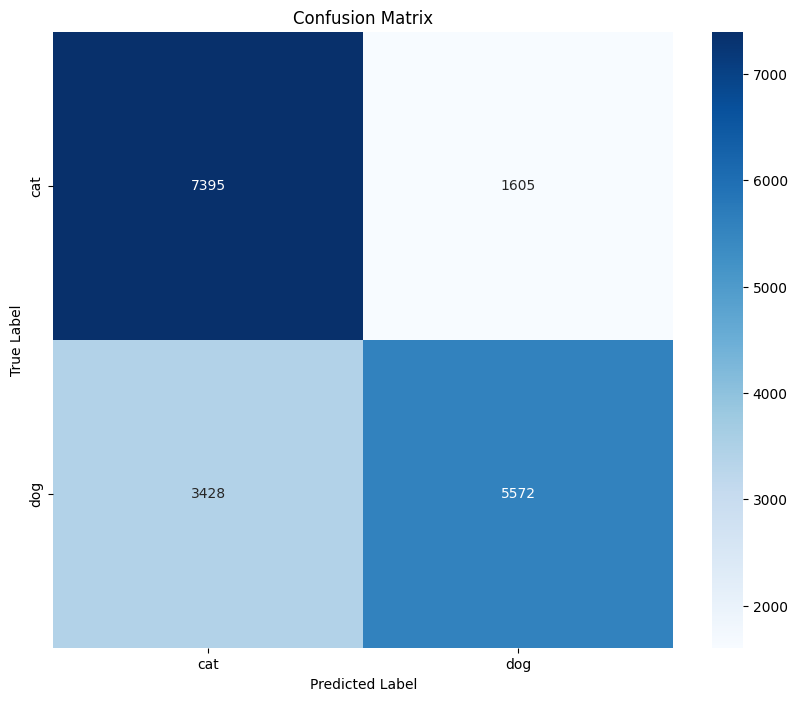

Classification Report:
              precision    recall  f1-score   support

         cat       0.68      0.82      0.75      9000
         dog       0.78      0.62      0.69      9000

    accuracy                           0.72     18000
   macro avg       0.73      0.72      0.72     18000
weighted avg       0.73      0.72      0.72     18000



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Pobranie historii uczenia
loss = history.history["loss"]
val_loss = history.history["val_loss"]
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
epochs_range = range(1, len(loss) + 1)

# Wykres funkcji kosztu
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, label="Train Loss", marker="o")
plt.plot(epochs_range, val_loss, label="Validation Loss", marker="o")
plt.xlabel("Epoch")
plt.ylabel("Cost function")
plt.title("How was loss function doing")
plt.legend()
plt.grid(True)

# Wykres dokładności
plt.subplot(1, 2, 2)
plt.plot(epochs_range, accuracy, label="Train Accuracy", marker="o")
plt.plot(epochs_range, val_accuracy, label="Validation Accuracy", marker="o")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("How was accuracy doing")
plt.legend()
plt.grid(True)
plt.show()

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator_full = test_datagen.flow_from_directory(
    test_dir_cat_and_dog,
    target_size=(32,32),
    batch_size=32,
    class_mode="sparse",
    shuffle=False  # Ustawiamy shuffle=False, aby kolejność etykiet była poprawna
)
test_loss, test_accuracy = armata.evaluate(test_generator_full)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generowanie predykcji
predictions = armata.predict(test_generator_full)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator_full.classes
class_labels = list(test_generator_full.class_indices.keys())

# Macierz pomyłek (Confusion Matrix)
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Klasyfikacyjny raport
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

#### 9.3.2) Results of the cat&dog model on the test data using VGG

In [ ]:
from tensorflow.keras import layers, regularizers
vgg = models.Sequential([

          # Blok 1: 32 filtrów -> 16x16 map cech
          layers.Conv2D(32, (3, 3), padding='same', use_bias=False,
                        kernel_regularizer=regularizers.l2(0.0001), input_shape=(32, 32, 3)),
          layers.BatchNormalization(),
          layers.Activation('relu'),
          layers.Conv2D(32, (3, 3), padding='same', use_bias=False,
                        kernel_regularizer=regularizers.l2(0.0001)),
          layers.BatchNormalization(),
          layers.Activation('relu'),
          layers.MaxPooling2D((2, 2)),  # Redukcja do 16x16
          layers.Dropout(0.2),           # Dropout 20% w pierwszym bloku

          # Blok 2: 64 filtrów -> 8x8 map cech
          layers.Conv2D(64, (3, 3), padding='same', use_bias=False,
                        kernel_regularizer=regularizers.l2(0.0001)),
          layers.BatchNormalization(),
          layers.Activation('relu'),
          layers.Conv2D(64, (3, 3), padding='same', use_bias=False,
                        kernel_regularizer=regularizers.l2(0.0001)),
          layers.BatchNormalization(),
          layers.Activation('relu'),
          layers.MaxPooling2D((2, 2)),  # Redukcja do 8x8
          layers.Dropout(0.3),           # Dropout 30% w drugim bloku

          # Blok 3: 128 filtrów -> 4x4 map cech
          layers.Conv2D(128, (3, 3), padding='same', use_bias=False,
                        kernel_regularizer=regularizers.l2(0.0001)),
          layers.BatchNormalization(),
          layers.Activation('relu'),
          layers.Conv2D(128, (3, 3), padding='same', use_bias=False,
                        kernel_regularizer=regularizers.l2(0.0001)),
          layers.BatchNormalization(),
          layers.Activation('relu'),
          layers.MaxPooling2D((2, 2)),  # Redukcja do 4x4
          layers.Dropout(0.4),           # Dropout 40% w trzecim bloku

          # Blok 4: 256 filtrów -> 2x2 map cech
          layers.Conv2D(256, (3, 3), padding='same', use_bias=False,
                        kernel_regularizer=regularizers.l2(0.0001)),
          layers.BatchNormalization(),
          layers.Activation('relu'),
          layers.Conv2D(256, (3, 3), padding='same', use_bias=False,
                        kernel_regularizer=regularizers.l2(0.0001)),
          layers.BatchNormalization(),
          layers.Activation('relu'),
          layers.MaxPooling2D((2, 2)),  # Redukcja do 2x2

          # Warstwy końcowe: Flatten -> Dense -> Dropout -> Output
          layers.Flatten(),                                  # spłaszczenie do 1024 cech
          layers.Dense(256, activation='relu',
                      kernel_regularizer=regularizers.l2(0.0001)),
          layers.Dropout(0.5),                                # Dropout 50% przed wyjściem
          layers.Dense(10, activation='softmax')              # wyjście softmax (10 klas)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
vgg.save('vgg30.h5')

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Zapis modelu z najlepszą walidacyjną stratą (val_loss)
checkpoint_loss = ModelCheckpoint("best_model_loss.h5", monitor="val_loss", save_best_only=True, mode="min")

# Zapis modelu z najlepszą walidacyjną dokładnością (val_accuracy)
checkpoint_acc = ModelCheckpoint("best_model_acc.h5", monitor="val_accuracy", save_best_only=True, mode="max")

EPOCHS = 30 # malo narazie
# Define steps per epoch
steps_per_epoch = total_samples // 32  # Ensure batch_size=32
validation_steps = valid_generator.samples // 32

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(0.001, decay_steps=10000, decay_rate=0.9) # troche opoznienia w uczeniu
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
vgg.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = vgg.fit(
    train_generator_50_50_all,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=validation_steps,
    epochs=EPOCHS,
    callbacks=[checkpoint_loss, checkpoint_acc]
)

Epoch 1/30
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 0s 739ms/step - accuracy: 0.6022 - loss: 0.8152

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1800/1800 ━━━━━━━━━━━━━━━━━━━━ 1361s 752ms/step - accuracy: 0.6022 - loss: 0.8151 - val_accuracy: 0.6214 - val_loss: 0.7463
Epoch 2/30
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 0s 734ms/step - accuracy: 0.7168 - loss: 0.6224

1800/1800 ━━━━━━━━━━━━━━━━━━━━ 1343s 746ms/step - accuracy: 0.7168 - loss: 0.6223 - val_accuracy: 0.6971 - val_loss: 0.6527
Epoch 3/30
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 0s 729ms/step - accuracy: 0.7466 - loss: 0.5669

1800/1800 ━━━━━━━━━━━━━━━━━━━━ 1332s 740ms/step - accuracy: 0.7466 - loss: 0.5669 - val_accuracy: 0.7676 - val_loss: 0.5366
Epoch 4/30
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 1334s 741ms/step - accuracy: 0.7622 - loss: 0.5418 - val_accuracy: 0.7272 - val_loss: 0.6243
Epoch 5/30
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 0s 730ms/step - accuracy: 0.7776 - loss: 0.5239

1800/1800 ━━━━━━━━━━━━━━━━━━━━ 1335s 742ms/step - accuracy: 0.7776 - loss: 0.5239 - val_accuracy: 0.7660 - val_loss: 0.5353
Epoch 6/30
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 0s 731ms/step - accuracy: 0.7926 - loss: 0.5027

1800/1800 ━━━━━━━━━━━━━━━━━━━━ 1336s 742ms/step - accuracy: 0.7926 - loss: 0.5027 - val_accuracy: 0.7828 - val_loss: 0.5124
Epoch 7/30
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 1329s 738ms/step - accuracy: 0.8083 - loss: 0.4824 - val_accuracy: 0.7650 - val_loss: 0.5829
Epoch 8/30
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 1322s 735ms/step - accuracy: 0.8170 - loss: 0.4679 - val_accuracy: 0.7758 - val_loss: 0.5292
Epoch 9/30
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 0s 726ms/step - accuracy: 0.8287 - loss: 0.4531

1800/1800 ━━━━━━━━━━━━━━━━━━━━ 1329s 738ms/step - accuracy: 0.8287 - loss: 0.4531 - val_accuracy: 0.7918 - val_loss: 0.5251
Epoch 10/30
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 1317s 732ms/step - accuracy: 0.8368 - loss: 0.4410 - val_accuracy: 0.7682 - val_loss: 0.6049
Epoch 11/30
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 1326s 737ms/step - accuracy: 0.8460 - loss: 0.4309 - val_accuracy: 0.7844 - val_loss: 0.5493
Epoch 12/30
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 1320s 733ms/step - accuracy: 0.8506 - loss: 0.4210 - val_accuracy: 0.7917 - val_loss: 0.5421
Epoch 13/30
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 1324s 736ms/step - accuracy: 0.8585 - loss: 0.4108 - val_accuracy: 0.7751 - val_loss: 0.6064
Epoch 14/30
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 1328s 738ms/step - accuracy: 0.8660 - loss: 0.4034 - val_accuracy: 0.7907 - val_loss: 0.5547
Epoch 15/30
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 1331s 740ms/step - accuracy: 0.8680 - loss: 0.3995 - val_accuracy: 0.7810 - val_loss: 0.6561
Epoch 16/30
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 1318s 732ms/step 

1800/1800 ━━━━━━━━━━━━━━━━━━━━ 1317s 732ms/step - accuracy: 0.8828 - loss: 0.3795 - val_accuracy: 0.7950 - val_loss: 0.6322
Epoch 18/30
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 1319s 733ms/step - accuracy: 0.8854 - loss: 0.3763 - val_accuracy: 0.7876 - val_loss: 0.6145
Epoch 19/30
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 1319s 733ms/step - accuracy: 0.8884 - loss: 0.3721 - val_accuracy: 0.7903 - val_loss: 0.6407
Epoch 20/30
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 1323s 735ms/step - accuracy: 0.8927 - loss: 0.3680 - val_accuracy: 0.7906 - val_loss: 0.6162
Epoch 21/30
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 1322s 734ms/step - accuracy: 0.8968 - loss: 0.3628 - val_accuracy: 0.7764 - val_loss: 0.6336
Epoch 22/30
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 1330s 739ms/step - accuracy: 0.8998 - loss: 0.3571 - val_accuracy: 0.7940 - val_loss: 0.6215
Epoch 23/30
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 1328s 738ms/step - accuracy: 0.9003 - loss: 0.3579 - val_accuracy: 0.7776 - val_loss: 0.6747
Epoch 24/30
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 1322s 735ms/step 

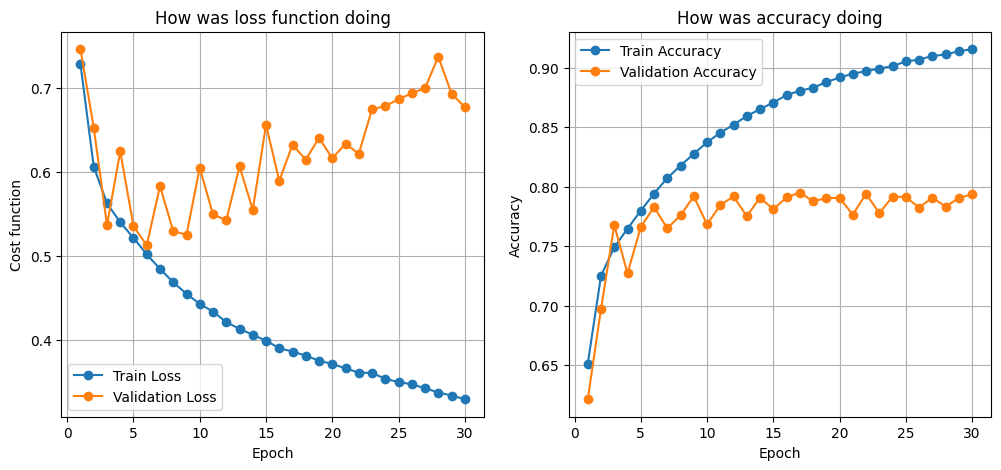

Found 18000 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


563/563 ━━━━━━━━━━━━━━━━━━━━ 87s 155ms/step - accuracy: 0.8128 - loss: 0.5973
Test Loss: 0.6855
Test Accuracy: 0.7897
563/563 ━━━━━━━━━━━━━━━━━━━━ 55s 96ms/step


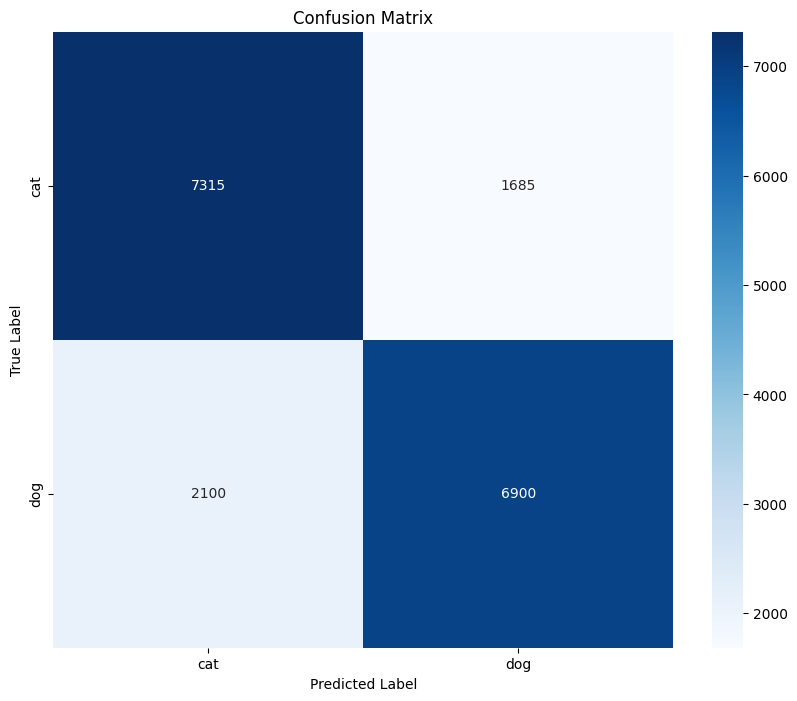

Classification Report:
              precision    recall  f1-score   support

         cat       0.78      0.81      0.79      9000
         dog       0.80      0.77      0.78      9000

    accuracy                           0.79     18000
   macro avg       0.79      0.79      0.79     18000
weighted avg       0.79      0.79      0.79     18000



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Pobranie historii uczenia
loss = history.history["loss"]
val_loss = history.history["val_loss"]
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
epochs_range = range(1, len(loss) + 1)

# Wykres funkcji kosztu
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, label="Train Loss", marker="o")
plt.plot(epochs_range, val_loss, label="Validation Loss", marker="o")
plt.xlabel("Epoch")
plt.ylabel("Cost function")
plt.title("How was loss function doing")
plt.legend()
plt.grid(True)

# Wykres dokładności
plt.subplot(1, 2, 2)
plt.plot(epochs_range, accuracy, label="Train Accuracy", marker="o")
plt.plot(epochs_range, val_accuracy, label="Validation Accuracy", marker="o")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("How was accuracy doing")
plt.legend()
plt.grid(True)
plt.show()

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator_full = test_datagen.flow_from_directory(
    test_cd,
    target_size=(32,32),
    batch_size=32,
    class_mode="sparse",
    shuffle=False  # Ustawiamy shuffle=False, aby kolejność etykiet była poprawna
)
test_loss, test_accuracy = vgg.evaluate(test_generator_full)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generowanie predykcji
predictions = vgg.predict(test_generator_full)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator_full.classes
class_labels = list(test_generator_full.class_indices.keys())

# Macierz pomyłek (Confusion Matrix)
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Klasyfikacyjny raport
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

In [ ]:
from tensorflow.keras.models import load_model


acc_vgg = load_model('best_model_acc.h5')
loss_vgg = load_model('best_model_loss.h5')

Found 18000 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


563/563 ━━━━━━━━━━━━━━━━━━━━ 74s 123ms/step - accuracy: 0.7703 - loss: 0.5277
Test Loss: 0.5192
Test Accuracy: 0.7762
563/563 ━━━━━━━━━━━━━━━━━━━━ 53s 93ms/step


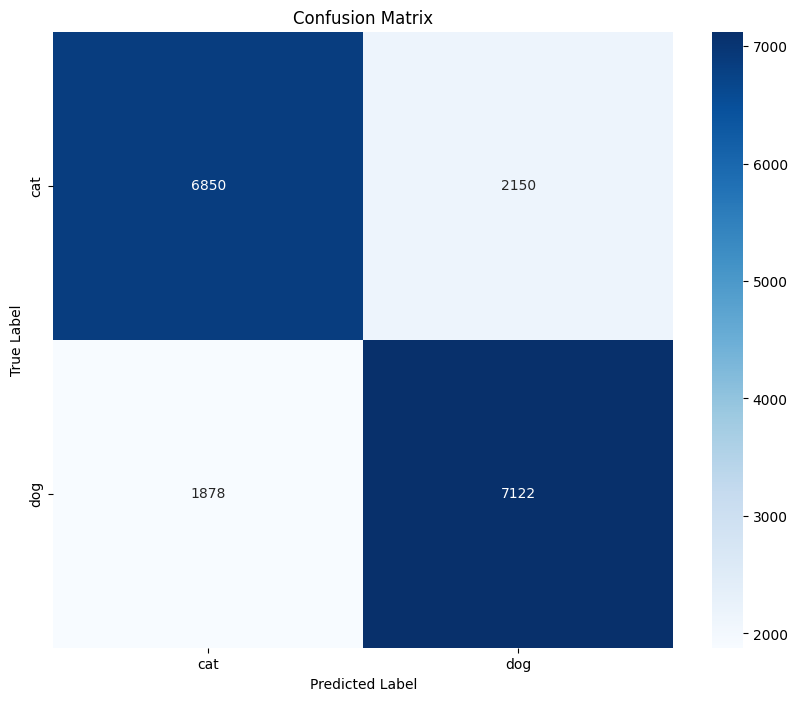

Classification Report:
              precision    recall  f1-score   support

         cat       0.78      0.76      0.77      9000
         dog       0.77      0.79      0.78      9000

    accuracy                           0.78     18000
   macro avg       0.78      0.78      0.78     18000
weighted avg       0.78      0.78      0.78     18000



In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator_full = test_datagen.flow_from_directory(
    test_cd,
    target_size=(32,32),
    batch_size=32,
    class_mode="sparse",
    shuffle=False  # Ustawiamy shuffle=False, aby kolejność etykiet była poprawna
)
test_loss, test_accuracy = loss_vgg.evaluate(test_generator_full)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generowanie predykcji
predictions = loss_vgg.predict(test_generator_full)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator_full.classes
class_labels = list(test_generator_full.class_indices.keys())

# Macierz pomyłek (Confusion Matrix)
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Klasyfikacyjny raport
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

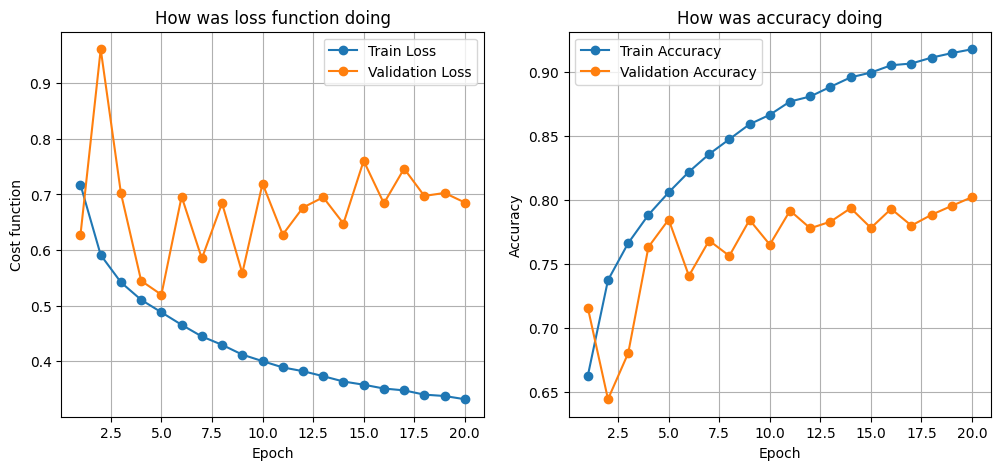

Found 18000 images belonging to 2 classes.
 11/563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7228 - loss: 0.7286

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


563/563 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7848 - loss: 0.6075
Test Loss: 0.8439
Test Accuracy: 0.7204
563/563 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step


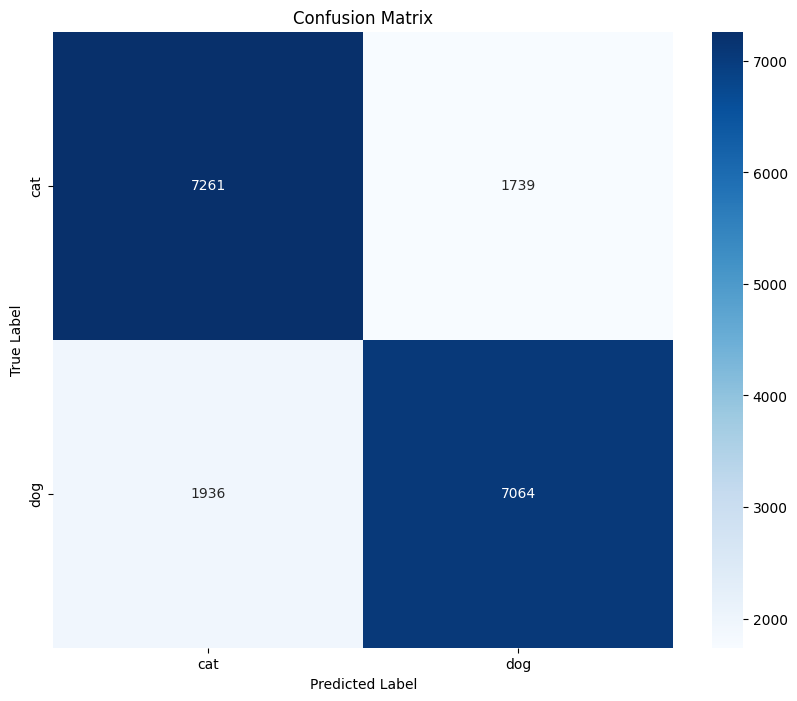

Classification Report:
              precision    recall  f1-score   support

         cat       0.79      0.81      0.80      9000
         dog       0.80      0.78      0.79      9000

    accuracy                           0.80     18000
   macro avg       0.80      0.80      0.80     18000
weighted avg       0.80      0.80      0.80     18000

<bound method TensorFlowTrainer.predict_step of <Sequential name=sequential_3, built=True>>


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Pobranie historii uczenia
loss = history.history["loss"]
val_loss = history.history["val_loss"]
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
epochs_range = range(1, len(loss) + 1)

# Wykres funkcji kosztu
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, label="Train Loss", marker="o")
plt.plot(epochs_range, val_loss, label="Validation Loss", marker="o")
plt.xlabel("Epoch")
plt.ylabel("Cost function")
plt.title("How was loss function doing")
plt.legend()
plt.grid(True)

# Wykres dokładności
plt.subplot(1, 2, 2)
plt.plot(epochs_range, accuracy, label="Train Accuracy", marker="o")
plt.plot(epochs_range, val_accuracy, label="Validation Accuracy", marker="o")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("How was accuracy doing")
plt.legend()
plt.grid(True)
plt.show()

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator_full = test_datagen.flow_from_directory(
    test_dir_cat_and_dog,
    target_size=(32,32),
    batch_size=32,
    class_mode="sparse",
    shuffle=False  # Ustawiamy shuffle=False, aby kolejność etykiet była poprawna
)
test_loss, test_accuracy = armata.evaluate(test_generator_full)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generowanie predykcji
predictions = vgg.predict(test_generator_full)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator_full.classes
class_labels = list(test_generator_full.class_indices.keys())

# Macierz pomyłek (Confusion Matrix)
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Klasyfikacyjny raport
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))
print(vgg.predict_step)

In [ ]:
model.save("armata.keras")


### 9.4) Creating ship&airplane model based on the best augmented methods

In [ ]:
import os
def copy_files(src_dir, dst_dir):
    for root, _, files in os.walk(src_dir):
        for file in files:
            src_file = os.path.join(root, file)
            dst_file = os.path.join(dst_dir, os.path.relpath(src_file, src_dir))
            os.makedirs(os.path.dirname(dst_file), exist_ok=True)
            shutil.copy(src_file, dst_file)

# Łączenie zbiorów train_dir i valid_dir w jeden duzy
base_dir = os.path.dirname(path)
full_180k = os.path.join(base_dir, "full_180k")
train_144k = os.path.join(base_dir, "train_144k")
valid_36k = os.path.join(base_dir, "valid_36k")

# Create or reset directories
create_clean_dir(full_180k)
create_clean_dir(train_144k)
create_clean_dir(valid_36k)

copy_files(train_dir, full_180k)
copy_files(valid_dir, full_180k)

print("Path to source dataset files:", full_180k)
print_folder_structure_and_image_count("/root/.cache/kagglehub/datasets/mengcius/cinic10/versions/full_180k")

Path to source dataset files: /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/full_180k
full_180k/ - 0 images
  airplane/ - 18000 images
  automobile/ - 18000 images
  bird/ - 18000 images
  cat/ - 18000 images
  deer/ - 18000 images
  dog/ - 18000 images
  frog/ - 18000 images
  horse/ - 18000 images
  ship/ - 18000 images
  truck/ - 18000 images


In [ ]:
import os
import shutil
import cv2
import numpy as np

# Ścieżki źródłowe i docelowe
source_path = "/root/.cache/kagglehub/datasets/mengcius/cinic10/versions/full_180k"
target_path = "/content/airplane_ship"
train_path = os.path.join(target_path, "train")
valid_path = os.path.join(target_path, "valid")

# Tworzenie struktury katalogów
os.makedirs(train_path, exist_ok=True)
os.makedirs(valid_path, exist_ok=True)
os.makedirs(os.path.join(train_path, "airplane"), exist_ok=True)
os.makedirs(os.path.join(train_path, "ship"), exist_ok=True)
os.makedirs(os.path.join(valid_path, "airplane"), exist_ok=True)
os.makedirs(os.path.join(valid_path, "ship"), exist_ok=True)

# Funkcja augmentacji stretch
def stretch_image(image, stretch_factor=None):
    h, w = image.shape[:2]
    stretch_factor = np.random.uniform(0.8, 1.2) if stretch_factor is None else stretch_factor

    new_w = int(w * stretch_factor)
    new_h = int(h * (1 / stretch_factor))

    stretched = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_LINEAR)

    if new_w > w:
        x_start = (new_w - w) // 2
        stretched = stretched[:, x_start:x_start+w]
    if new_h > h:
        y_start = (new_h - h) // 2
        stretched = stretched[y_start:y_start+h, :]

    return cv2.resize(stretched, (w, h), interpolation=cv2.INTER_LINEAR)

# Przetwarzanie każdej klasy osobno
for class_name in ["airplane", "ship"]:
    class_path = os.path.join(source_path, class_name)
    images = os.listdir(class_path)

    # Podział na train/valid (po 9000/9000)
    train_images = images[:9000]
    valid_images = images[9000:18000]

    # Kopiowanie obrazów walidacyjnych
    for img in valid_images:
        src = os.path.join(class_path, img)
        dst = os.path.join(valid_path, class_name, img)
        shutil.copy(src, dst)

    # Przetwarzanie treningowe + augmentacja
    for img in train_images:
        src = os.path.join(class_path, img)

        # Oryginalny obraz
        dst_original = os.path.join(train_path, class_name, img)
        shutil.copy(src, dst_original)

        # Augmentowana kopia
        image = cv2.imread(src)
        augmented = stretch_image(image)
        dst_augmented = os.path.join(train_path, class_name, f"aug_{img}")
        cv2.imwrite(dst_augmented, augmented)

# Weryfikacja
print("Train automobile:", len(os.listdir(os.path.join(train_path, "airplane"))))
print("Train truck:", len(os.listdir(os.path.join(train_path, "ship"))))
print("Valid automobile:", len(os.listdir(os.path.join(valid_path, "airplane"))))
print("Valid truck:", len(os.listdir(os.path.join(valid_path, "ship"))))

Train automobile: 18000
Train truck: 18000
Valid automobile: 9000
Valid truck: 9000


In [ ]:
print_folder_structure_and_image_count(f"{train_path}")

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(32, 32),
    batch_size=32,
    class_mode='binary')

valid_generator = valid_datagen.flow_from_directory(
    valid_path,
    target_size=(32, 32),
    batch_size=32,
    class_mode='binary')

train/ - 0 images
  airplane/ - 18000 images
  ship/ - 18000 images
Found 36000 images belonging to 2 classes.
Found 18000 images belonging to 2 classes.


#### 9.3.1) Results of the cat&dog model on the test data using VGG

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

# Ustawienia
EPOCHS = 10
BATCH_SIZE = 32
IMG_SIZE = (32, 32)

steps_per_epoch = train_generator.samples // BATCH_SIZE
validation_steps = valid_generator.samples // BATCH_SIZE

# Ustawienie harmonogramu uczenia i optymalizatora
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Kompilacja modelu
vgg.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Trenowanie
history = vgg.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=validation_steps,
    epochs=EPOCHS
)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1125/1125 ━━━━━━━━━━━━━━━━━━━━ 507s 444ms/step - accuracy: 0.6358 - loss: 0.8431 - val_accuracy: 0.7308 - val_loss: 0.7153
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 569s 504ms/step - accuracy: 0.8032 - loss: 0.5272 - val_accuracy: 0.7753 - val_loss: 0.5655
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 509s 452ms/step - accuracy: 0.8438 - loss: 0.4420 - val_accuracy: 0.8533 - val_loss: 0.4033
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 559s 449ms/step - accuracy: 0.8660 - loss: 0.3954 - val_accuracy: 0.8620 - val_loss: 0.3834
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 502s 447ms/step - accuracy: 0.8760 - loss: 0.3776 - val_accuracy: 0.8701 - val_loss: 0.3854
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 622s 500ms/step - accuracy: 0.8855 - loss: 0.3594 - val_accuracy: 0.8432 - val_loss: 0.4843
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 562s 499ms/step - accuracy: 0.8915 - loss: 0.3459 - val_accuracy: 0.8699 - val_loss: 0.3974
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 563s 500ms/step - accuracy: 0.9

In [ ]:
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ścieżki źródłowe i docelowe
source_test_dir = test_dir
target_test_dir = "/content/airplane_ship_test"  # Nowy katalog tylko z pojazdami

# Tworzenie struktury katalogów docelowych
os.makedirs(target_test_dir, exist_ok=True)

# Klasy do wybrania
selected_classes = ['airplane', 'ship']

# Kopiowanie wybranych klas
for class_name in selected_classes:
    # Ścieżka źródłowa
    src_class_path = os.path.join(source_test_dir, class_name)

    # Ścieżka docelowa
    dst_class_path = os.path.join(target_test_dir, class_name)
    os.makedirs(dst_class_path, exist_ok=True)

    # Kopiowanie wszystkich obrazów
    for img_name in os.listdir(src_class_path):  # Dodano [::2] aby wybierać co drugi obraz
        src = os.path.join(src_class_path, img_name)
        dst = os.path.join(dst_class_path, img_name)
        shutil.copy(src, dst)

# Tworzenie test_generatora tylko dla pojazdów
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    target_test_dir,
    target_size=(32, 32),  # Dostosuj do swojego rozmiaru obrazów
    batch_size=32,
    class_mode='binary',  # Tylko 2 klasy - można użyć 'binary'
    shuffle=False
)

print("\nPodsumowanie test_generator dla samolot i statek:")
print(f"Liczba obrazów testowych: {test_generator.samples}")
print(f"Wykryte klasy: {test_generator.class_indices}")

print(f"{print_folder_structure_and_image_count(target_test_dir)}")

Found 18000 images belonging to 2 classes.

Podsumowanie test_generator dla samolot i statek:
Liczba obrazów testowych: 18000
Wykryte klasy: {'airplane': 0, 'ship': 1}
airplane_ship_test/ - 0 images
  airplane/ - 9000 images
  ship/ - 9000 images
None


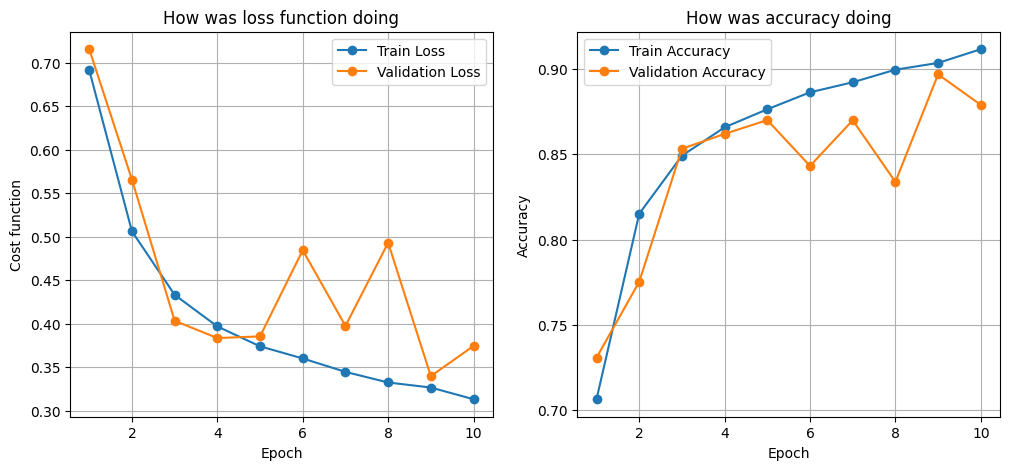

Found 18000 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


563/563 ━━━━━━━━━━━━━━━━━━━━ 96s 171ms/step - accuracy: 0.8900 - loss: 0.3469
Test Loss: 0.3811
Test Accuracy: 0.8756
563/563 ━━━━━━━━━━━━━━━━━━━━ 60s 107ms/step


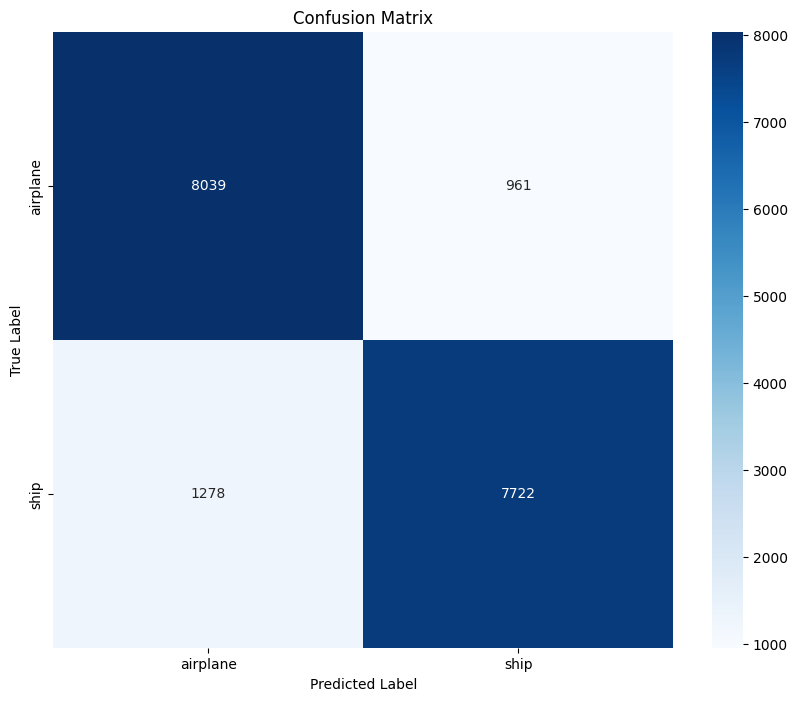

Classification Report:
              precision    recall  f1-score   support

    airplane       0.86      0.89      0.88      9000
        ship       0.89      0.86      0.87      9000

    accuracy                           0.88     18000
   macro avg       0.88      0.88      0.88     18000
weighted avg       0.88      0.88      0.88     18000

<bound method TensorFlowTrainer.predict_step of <Sequential name=sequential, built=True>>


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Pobranie historii uczenia
loss = history.history["loss"]
val_loss = history.history["val_loss"]
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
epochs_range = range(1, len(loss) + 1)

# Wykres funkcji kosztu
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, label="Train Loss", marker="o")
plt.plot(epochs_range, val_loss, label="Validation Loss", marker="o")
plt.xlabel("Epoch")
plt.ylabel("Cost function")
plt.title("How was loss function doing")
plt.legend()
plt.grid(True)

# Wykres dokładności
plt.subplot(1, 2, 2)
plt.plot(epochs_range, accuracy, label="Train Accuracy", marker="o")
plt.plot(epochs_range, val_accuracy, label="Validation Accuracy", marker="o")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("How was accuracy doing")
plt.legend()
plt.grid(True)
plt.show()

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator_full = test_datagen.flow_from_directory(
    target_test_dir,
    target_size=(32,32),
    batch_size=32,
    class_mode="sparse",
    shuffle=False  # Ustawiamy shuffle=False, aby kolejność etykiet była poprawna
)
test_loss, test_accuracy = vgg.evaluate(test_generator_full)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generowanie predykcji
predictions = vgg.predict(test_generator_full)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator_full.classes
class_labels = list(test_generator_full.class_indices.keys())

# Macierz pomyłek (Confusion Matrix)
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Klasyfikacyjny raport
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))
print(vgg.predict_step)

In [ ]:
vgg.save("ship_airplane.h5")

## 10) Creation of the Conclusive Model based on the all augmented methods' evaluation an the previous Ensemble models's results


In [ ]:
from tensorflow.keras.models import load_model

stretch_armata = load_model('armata_cat_and_dog20.keras')
vgg = load_model('best_model_loss.h5')

In [ ]:
flip = load_model('flip_32.h5')
sepia = load_model('armata_model_with_sepia1.h5')
resnet = load_model('resnet.h5')

In [ ]:
print(train_generator.class_indices)  # train_generator = obiekt ImageDataGenerator

{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}


In [ ]:
import os
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import img_to_array, load_img

def load_images_from_directory(directory, target_size=(32, 32)):
    images = []
    labels = []
    class_names = sorted(os.listdir(directory))  # Pobiera nazwy klas
    class_indices = {class_name: idx for idx, class_name in enumerate(class_names)}

    for class_name in class_names:
        class_path = os.path.join(directory, class_name)
        if not os.path.isdir(class_path):
            continue
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            image = load_img(img_path, target_size=target_size)
            image = img_to_array(image) / 255.0  # Normalizacja
            images.append(image)
            labels.append(class_indices[class_name])

    return np.array(images), np.array(labels)

# Załaduj zbiór testowy
X_test, y_test = load_images_from_directory(test_dir)
X_valid, y_valid = load_images_from_directory(valid_dir)

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

models_16class = [flip, sepia, resnet]
models_catdog = [stretch_armata, vgg]
# Example: Assuming `model_16class1`, `model_16class2`... are your 16-class models
# and `model_catdog1` and `model_catdog2` are your cat/dog models.

def ensemble_predict(models_16class, models_catdog, X_test, weight_1, weight_2):
    # Get predictions from 16-class models
    prob_16class = [model.predict(X_test) for model in models_16class]

    # Average probabilities for 16 classes (Soft Voting)
    avg_prob_16class = np.mean(prob_16class, axis=0)  # (N, 16)

    # Get predictions from cat/dog models (only for cat/dog classes, assume class 0=cat, 1=dog)
    prob_catdog1 = models_catdog[0].predict(X_test)  # (N, 16) but only relevant for cat/dog
    prob_catdog2 = models_catdog[1].predict(X_test)

    # Weighted average of cat/dog predictions

    weight_model1 = weight_1
    weight_model2 = weight_2
    prob_catdog_combined = weight_model1 * prob_catdog1[:, [0, 1]] + weight_model2 * prob_catdog2[:, [0, 1]]

    # Now for each image:
    final_predictions = []

    for i in range(len(X_test)):
        # Find the predicted class based on 16-class models (most likely class)
        predicted_class = np.argmax(avg_prob_16class[i])

        # If the predicted class is cat or dog (class 0 or 1), use the cat/dog models to get better prediction
        if predicted_class == 3 or predicted_class == 5:  # Cat or Dog
            final_pred = np.argmax(prob_catdog_combined[i])  # Get better prediction from cat/dog models
        else:
            final_pred = predicted_class  # Otherwise, trust the 16-class model

        final_predictions.append(final_pred)

    return np.array(final_predictions)


# Example usage
for weight1 in [0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]:
    weight2 = 1 - weight1

    y_pred = ensemble_predict(models_16class, models_catdog, X_valid, weight1, weight2)
    if y_pred.shape[-1] != len(np.unique(y_valid)):  # In case the model outputs logits
        y_pred = tf.nn.softmax(tf.cast(y_pred, dtype=tf.float32), axis=-1)
    accuracy = np.mean(y_pred == y_valid)  # Oblicz accuracy
    loss_fn = SparseCategoricalCrossentropy(from_logits=False)
    loss = loss_fn(y_valid, y_pred).numpy()
    print(f"Waga modelu 1: {weight1}, Waga modelu 2: {weight2}, Accuracy: {accuracy:.4%}")
    print(f"Test Loss: {loss:.4f}")
    cm = confusion_matrix(y_valid, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()



2813/2813 ━━━━━━━━━━━━━━━━━━━━ 76s 27ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 76s 27ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4001s 1s/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 32s 11ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 238s 84ms/step


InvalidArgumentError: Value for attr 'T' of int64 is not in the list of allowed values: half, bfloat16, float, double
	; NodeDef: {{node Softmax}}; Op<name=Softmax; signature=logits:T -> softmax:T; attr=T:type,allowed=[DT_HALF, DT_BFLOAT16, DT_FLOAT, DT_DOUBLE]> [Op:Softmax] name: 